In [1]:
# @title Set up magic commands
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [99]:
import re

import torch
import gym
import numpy as np
import matplotlib.pyplot as plt

import render


RENDER_RGB = 'rgb_array'
RENDER_HUMAN = 'human'
RENDER_ANSI = 'ansi'

RENDER_MODE = {
  'CartPole-v0': RENDER_RGB,
  'FrozenLake-v0': RENDER_ANSI,
}

ENV = 'FrozenLake-v0'

def examine_env():
  env = gym.make('FrozenLake-v0')
  env.reset()
  frame = env.render(mode='human')
  env.render(close=True)
  obs, reward, done, info = env.step(0)
  print(env.observation_space)
  #help(env.observation_space)
examine_env()


[2017-09-10 23:01:48,496] Making new env: FrozenLake-v0



SFFF
FHFH
FFFH
HFFG
Discrete(16)


[2017-09-10 23:06:58,521] Making new env: FrozenLake-v0


1000000
1000 smoothed: 0.07152632145371504
2000 smoothed: 0.5004442851641854
3000 smoothed: 0.5200257365952203
4000 smoothed: 0.4111342893702757
5000 smoothed: 0.3126314801892678
6000 smoothed: 0.45192971170496926
7000 smoothed: 0.43413383792968546
8000 smoothed: 0.42523989354248365
9000 smoothed: 0.4444043847975129
10000 smoothed: 0.48773129822250516
11000 smoothed: 0.5669681851836819
12000 smoothed: 0.4275039054368334
13000 smoothed: 0.371464611555525
14000 smoothed: 0.4078792787669416
15000 smoothed: 0.47806408835771375
16000 smoothed: 0.5153702847221661
17000 smoothed: 0.5349479351618546
18000 smoothed: 0.43327978827052416
19000 smoothed: 0.40693341673565836
20000 smoothed: 0.49724943931254556
21000 smoothed: 0.4199419037915405
22000 smoothed: 0.40530528386710246
23000 smoothed: 0.38055238365946975
24000 smoothed: 0.4494036943520456
25000 smoothed: 0.3883778422247134
26000 smoothed: 0.43824225535705075
27000 smoothed: 0.5172215862588215
28000 smoothed: 0.47028191834550864
29000 smo

[2017-09-10 23:07:50,323] Making new env: FrozenLake-v0


smoothed: 0.4797780523082451
defaultdict(<function TabularQAgent.__init__.<locals>.<lambda> at 0x7fcf3d394840>, {0: array([ 0.15446064,  0.11268728,  0.13242314,  0.11509862]), 1: array([ 0.07781075,  0.08610253,  0.07722543,  0.10274311]), 2: array([ 0.08868474,  0.0893818 ,  0.08891632,  0.08860886]), 3: array([ 0.07309802,  0.06494564,  0.03769384,  0.08246265]), 4: array([ 0.19670591,  0.12230894,  0.09453052,  0.06151569]), 6: array([ 0.08481591,  0.07048887,  0.06768567,  0.04215989]), 8: array([ 0.11121255,  0.164349  ,  0.1787141 ,  0.25402495]), 9: array([ 0.21741604,  0.29992406,  0.15638935,  0.15388234]), 10: array([ 0.16043622,  0.15901598,  0.14662636,  0.15075521]), 13: array([ 0.27361792,  0.25726404,  0.51723625,  0.25543484]), 14: array([ 0.43699359,  0.70324448,  0.53240166,  0.48587595])})



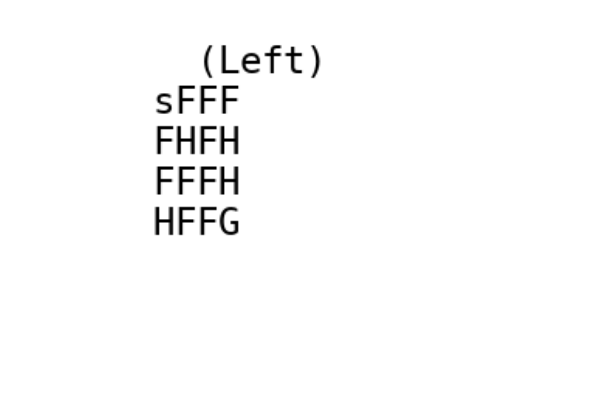
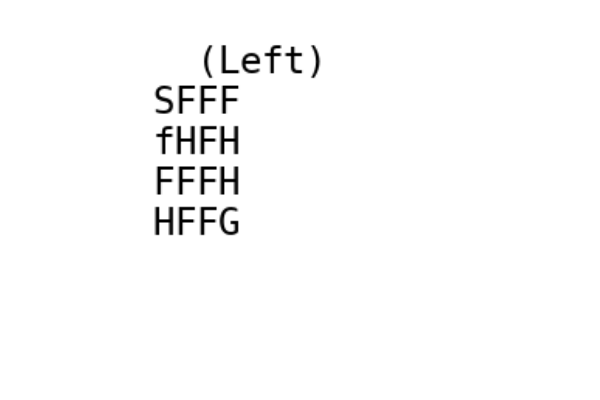
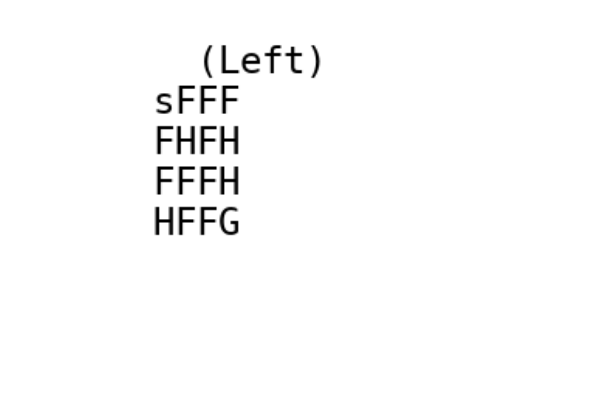
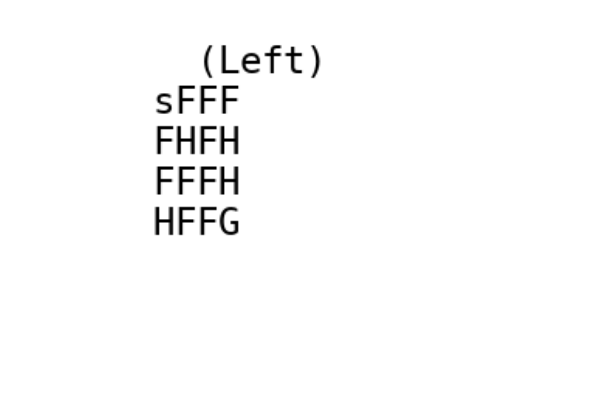
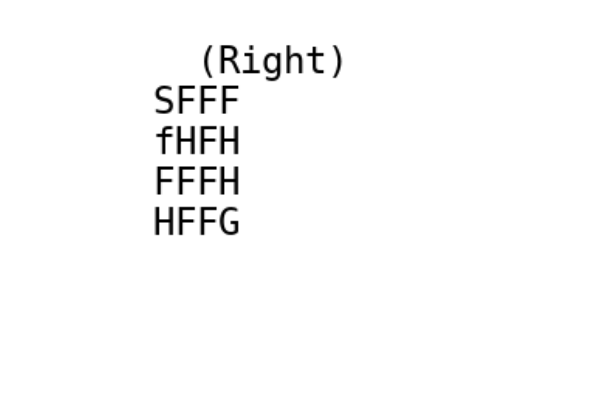
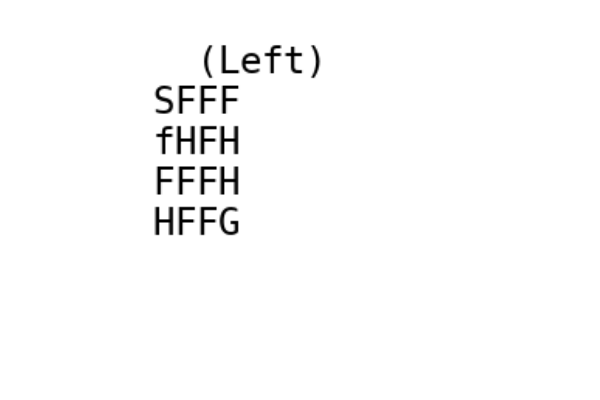
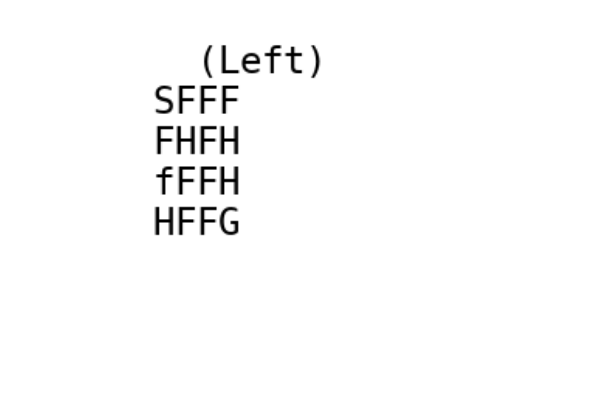
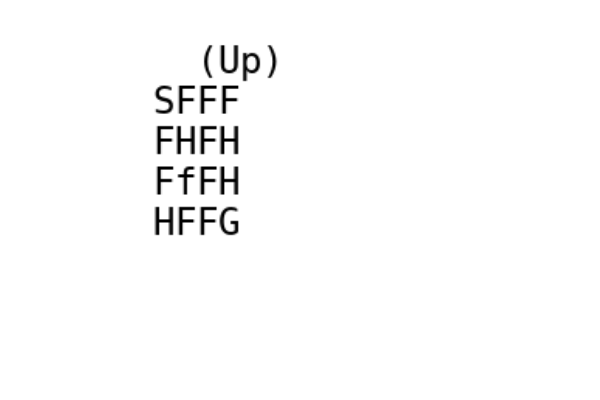
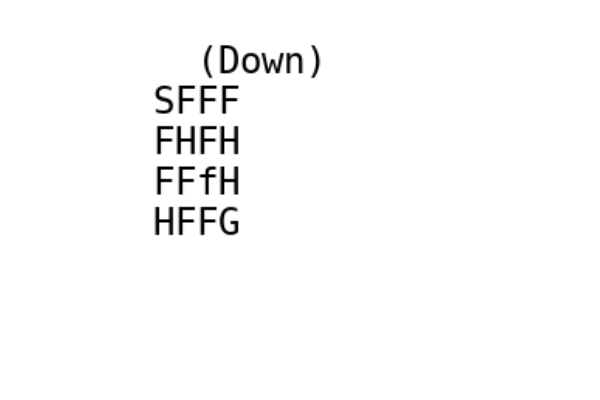
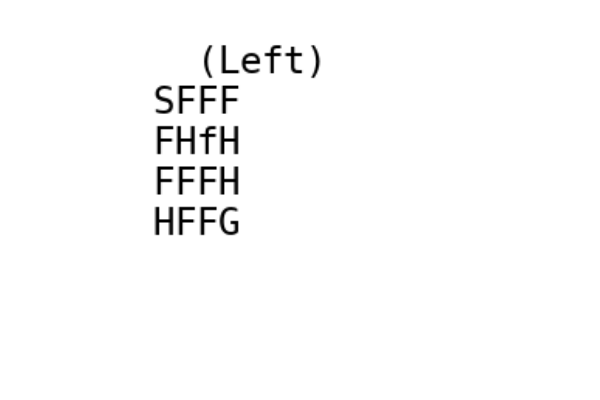
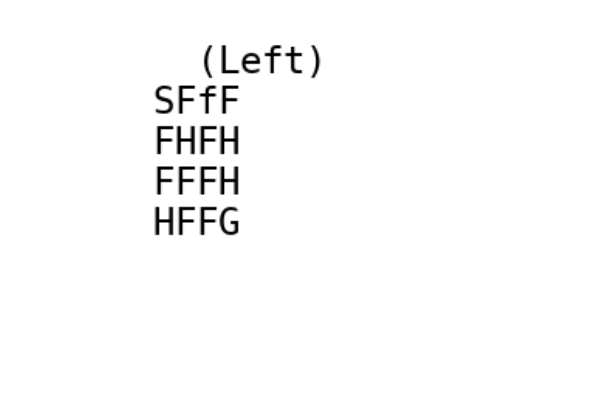
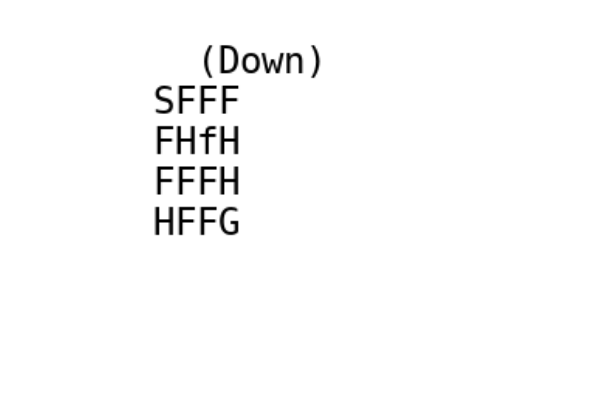
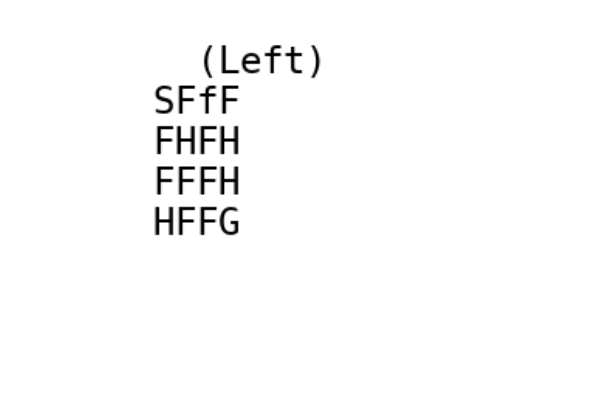
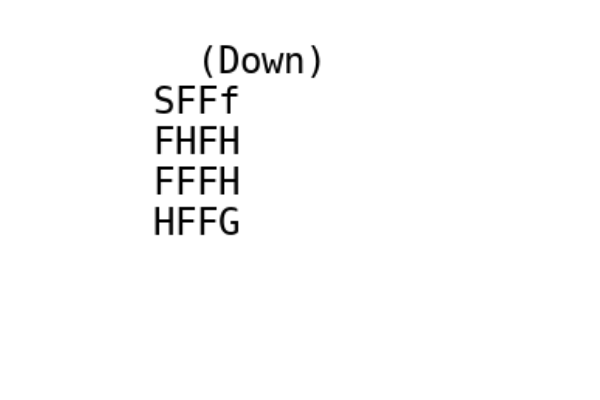
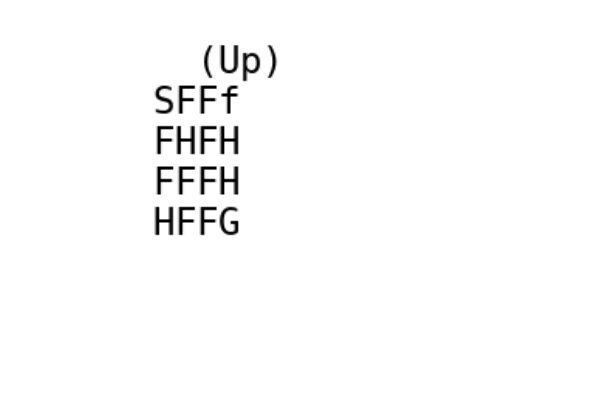
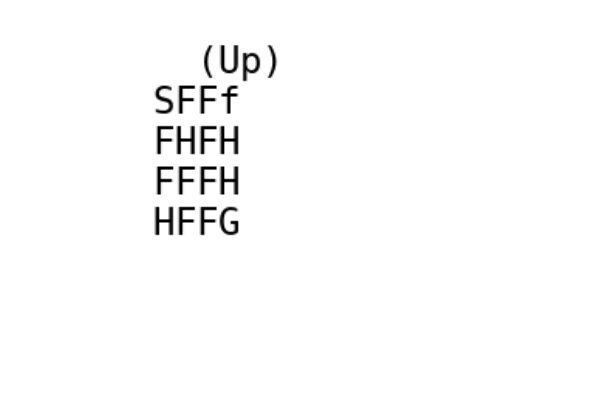
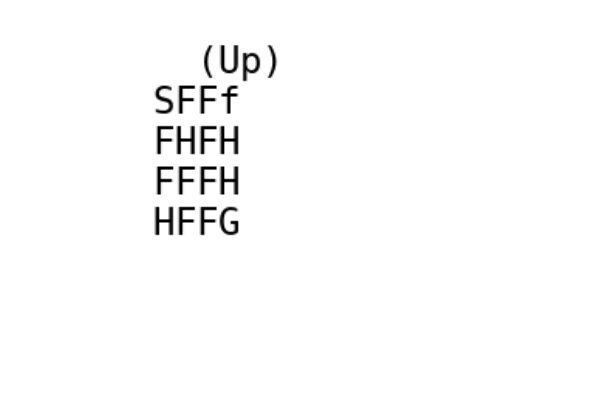
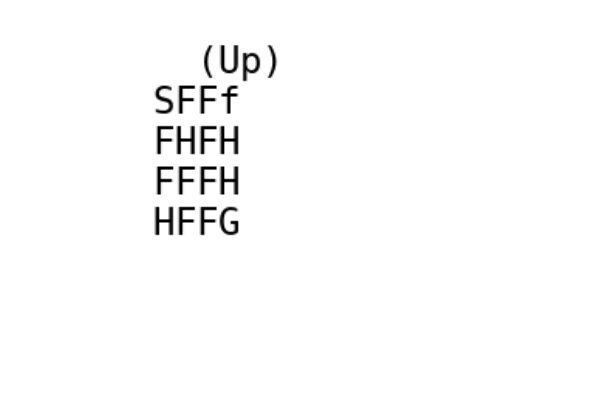
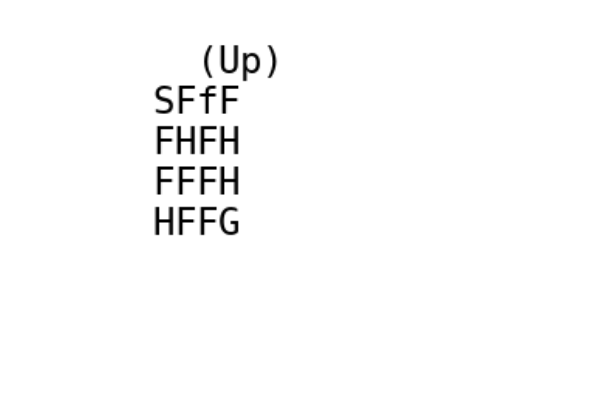
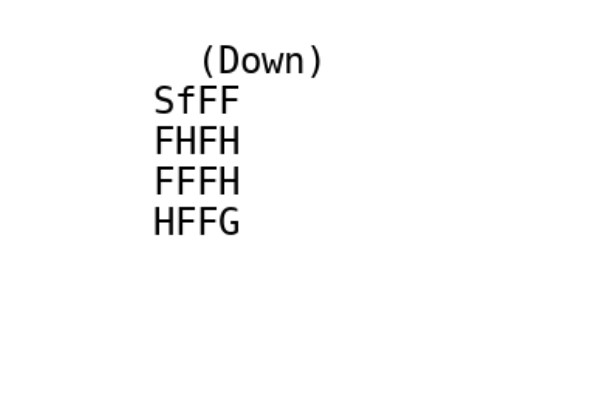
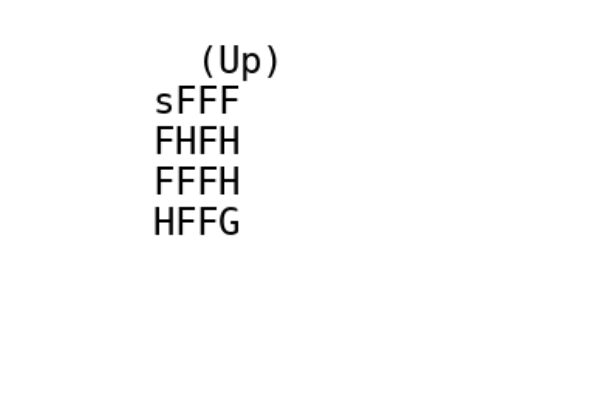
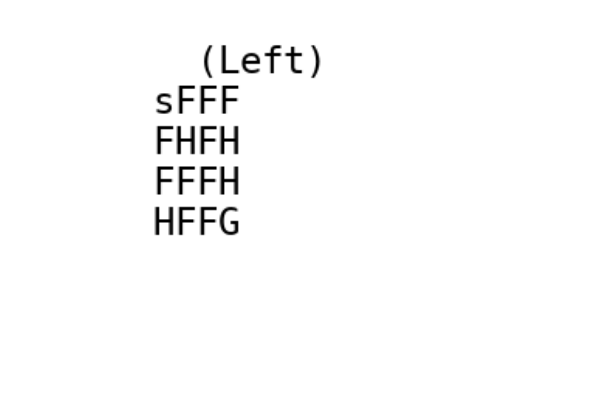
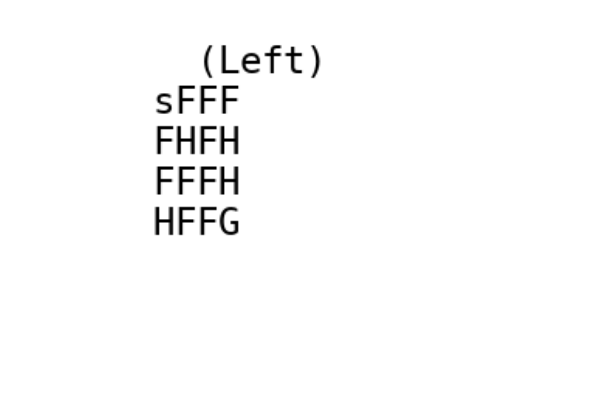
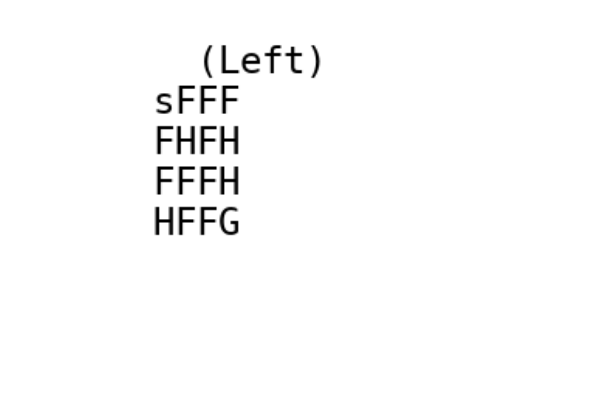
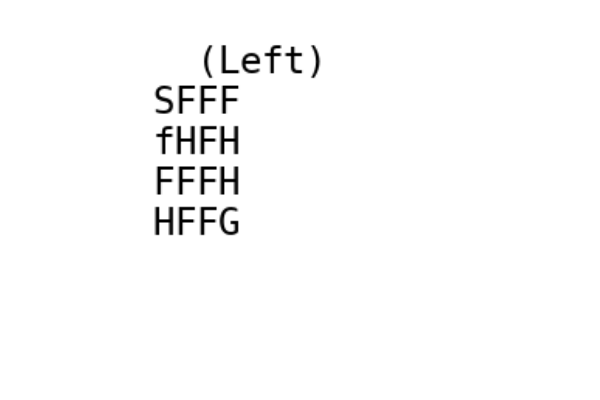
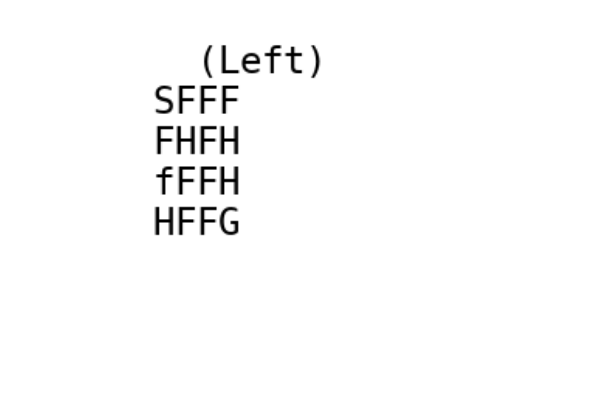
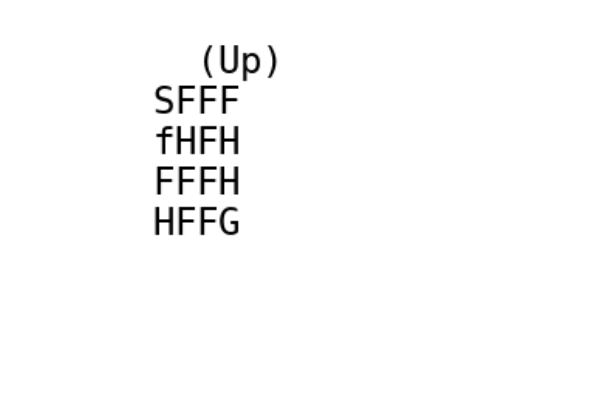
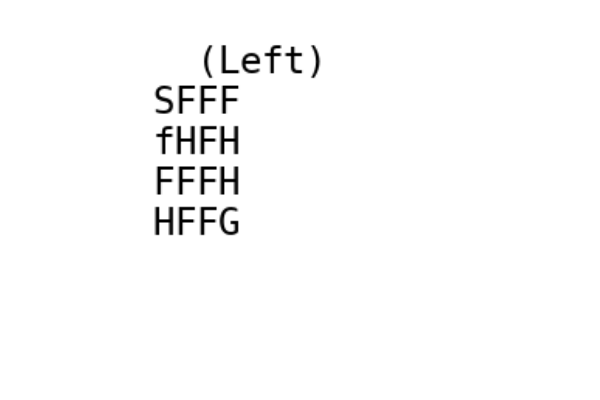
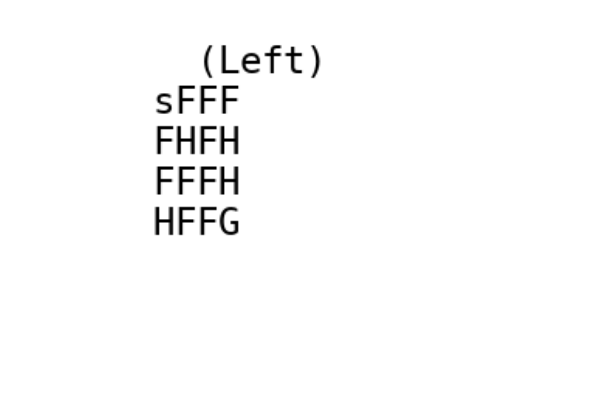
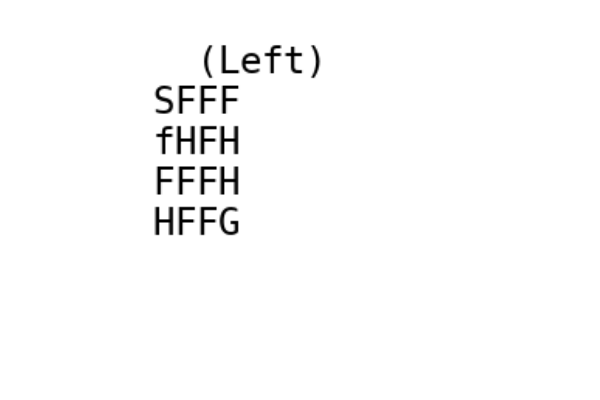
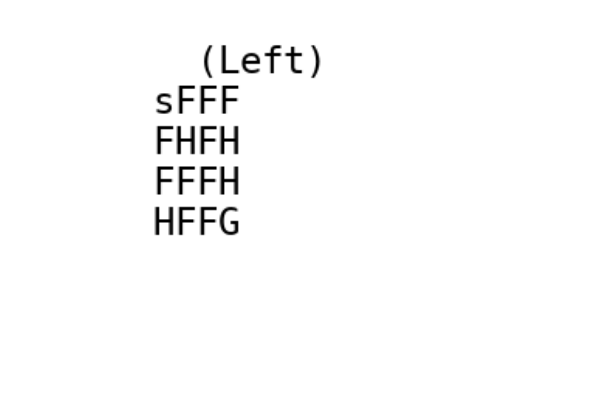
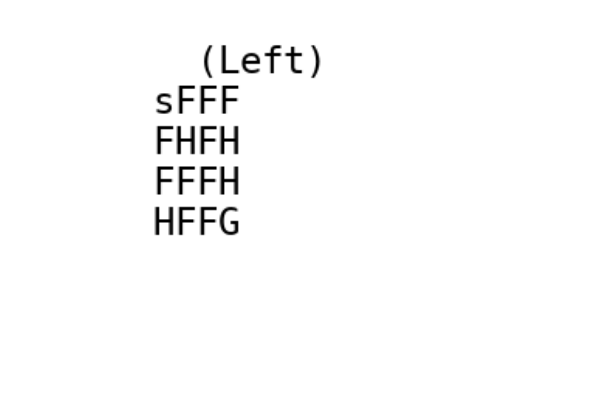
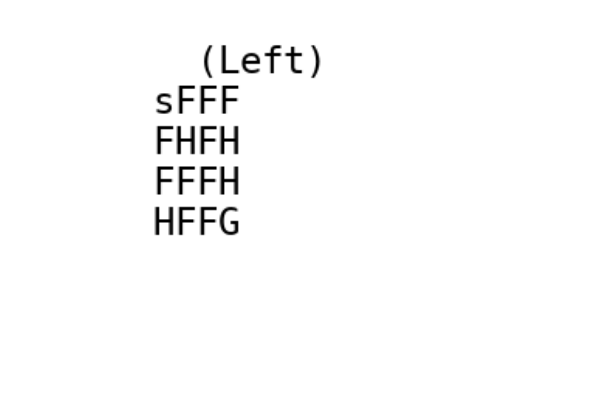
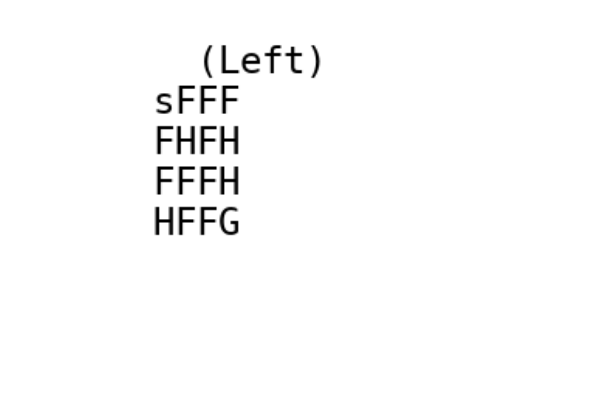
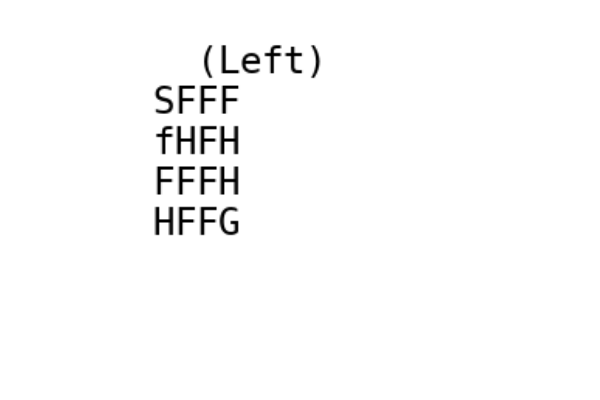
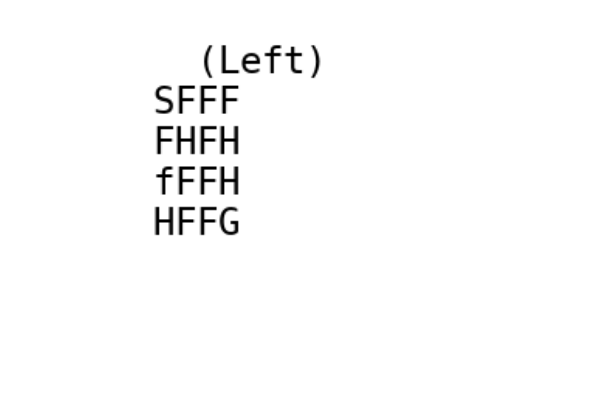
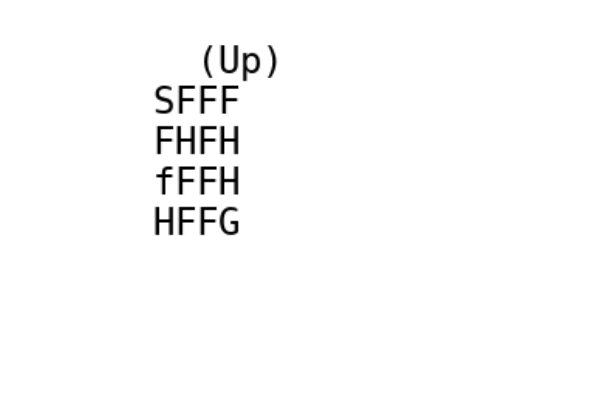
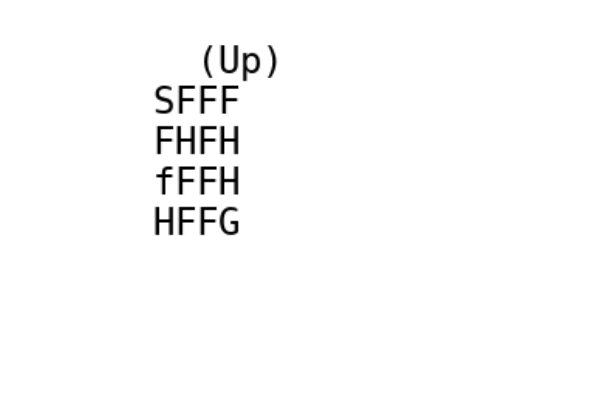
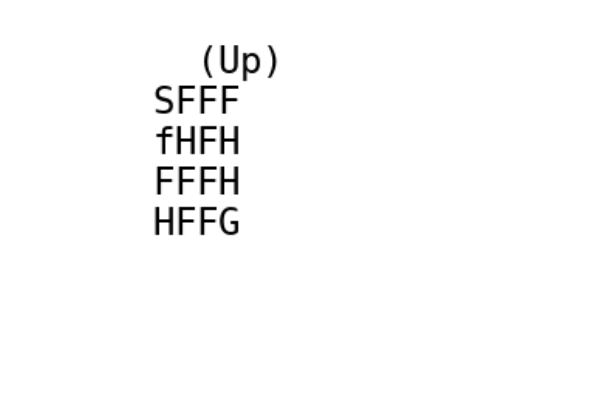
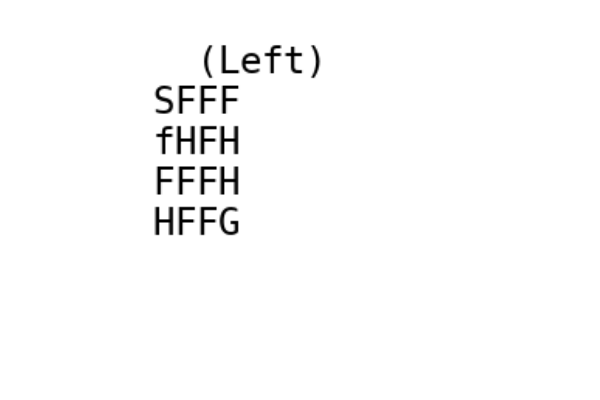
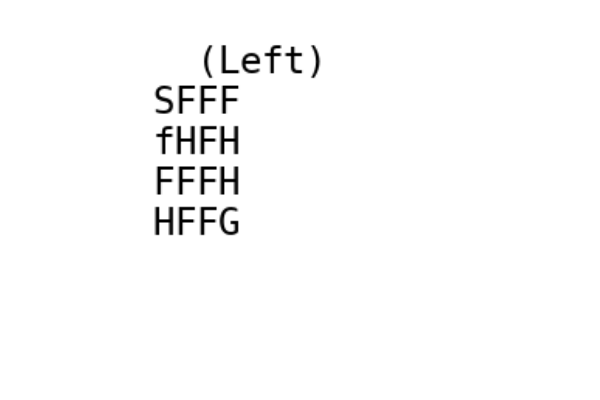
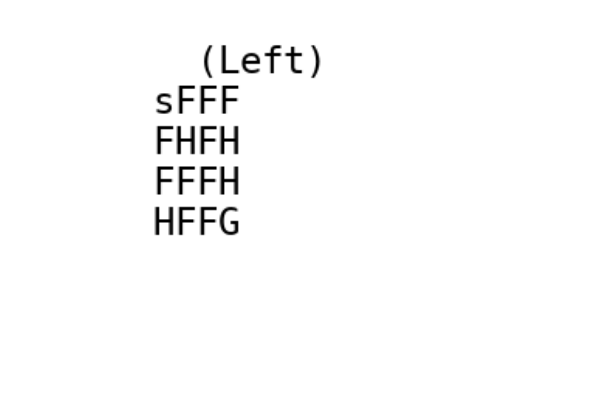
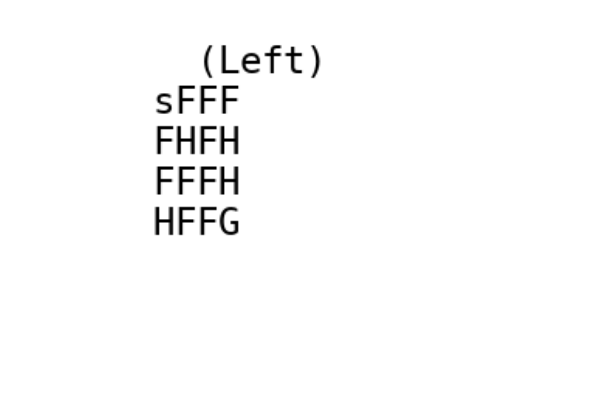
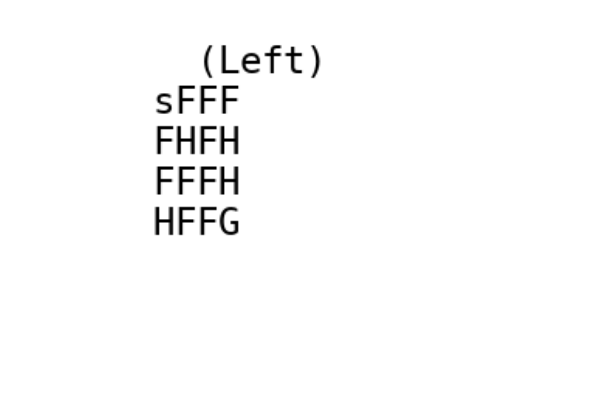
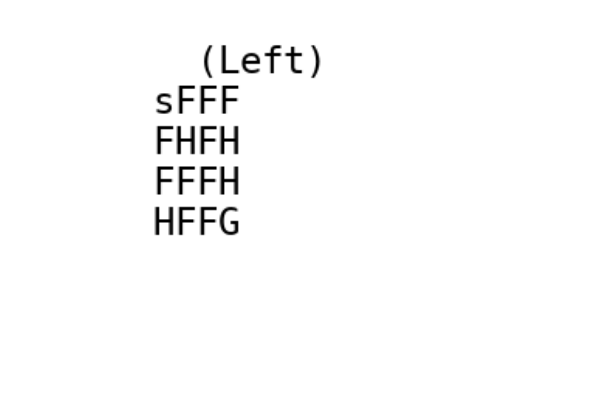
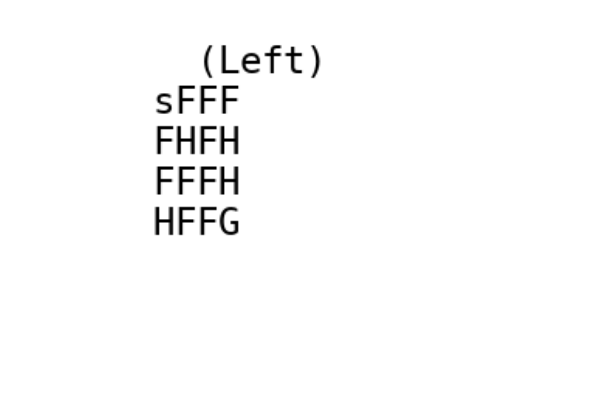
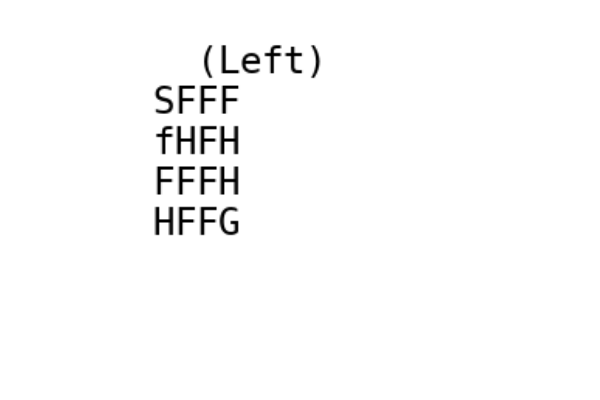
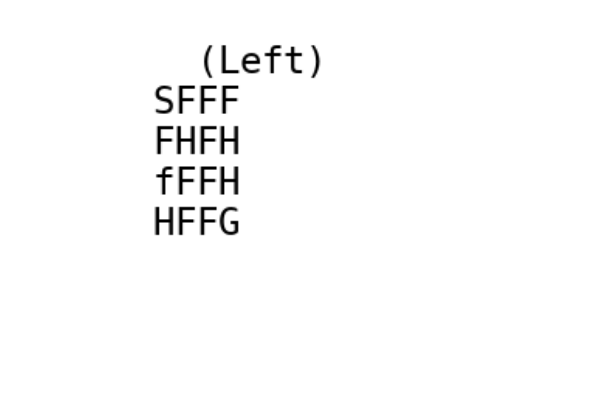
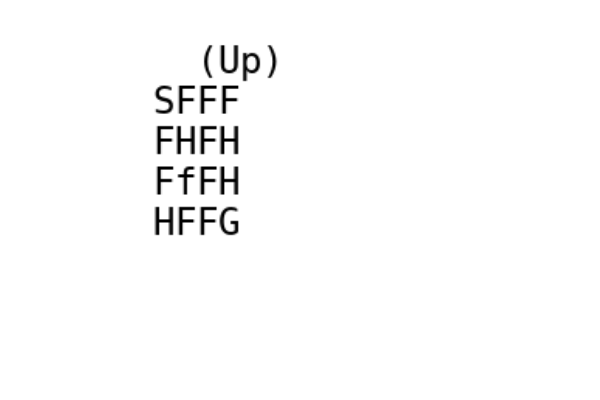
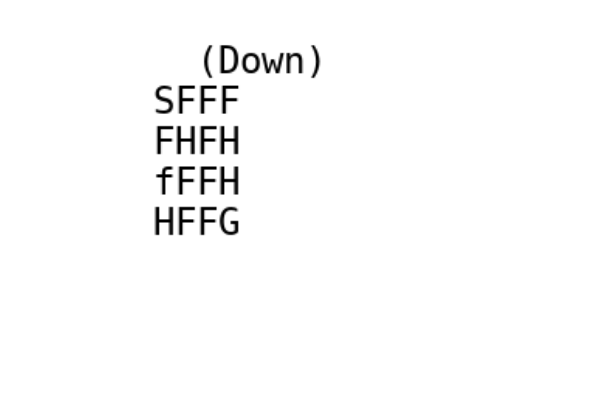
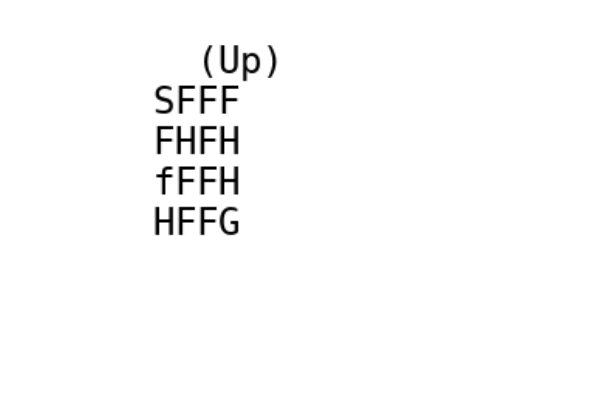
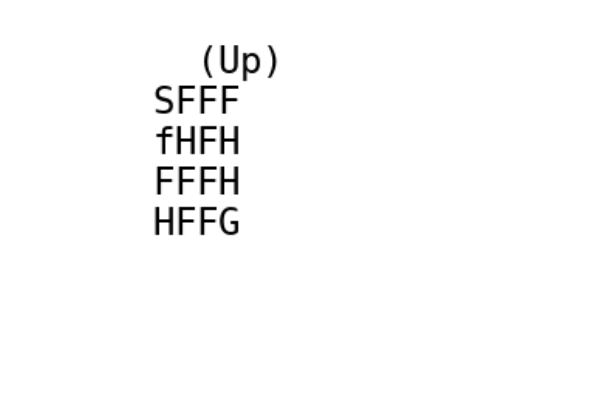
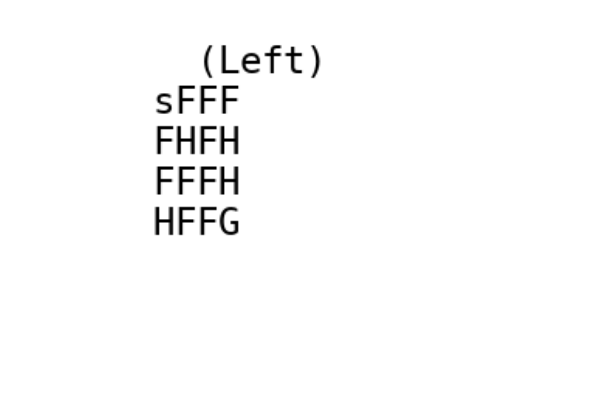
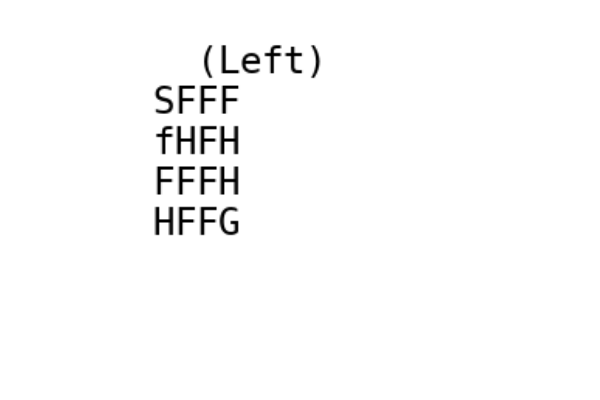
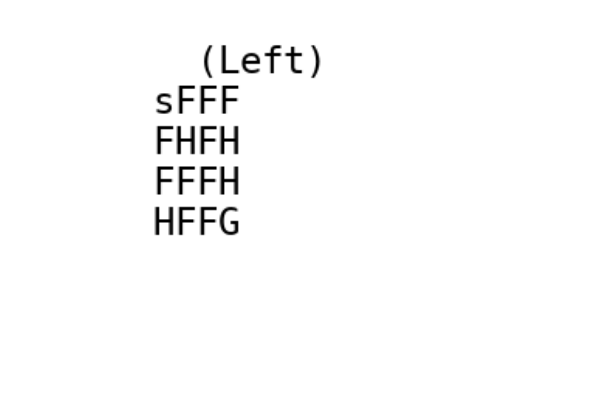
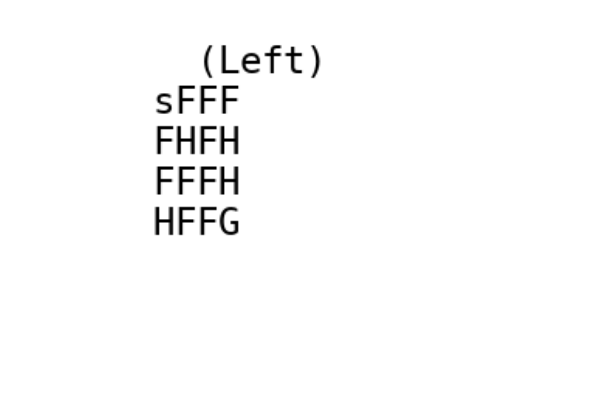
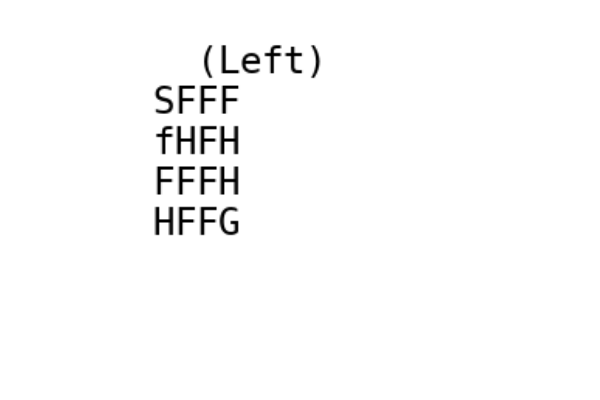
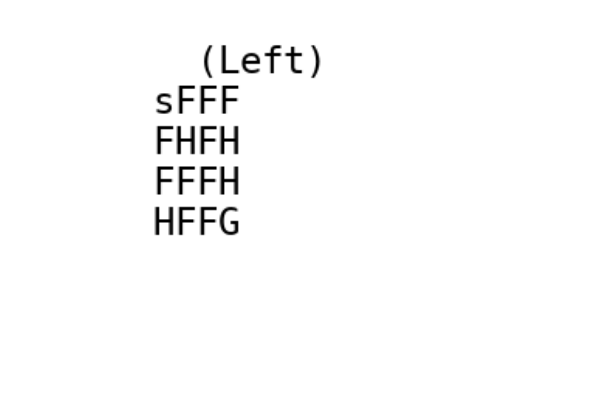
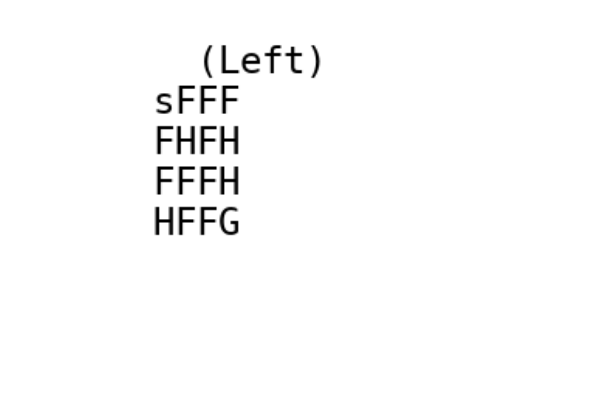
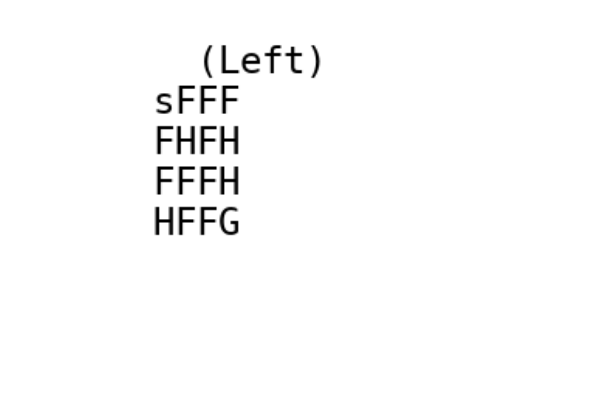
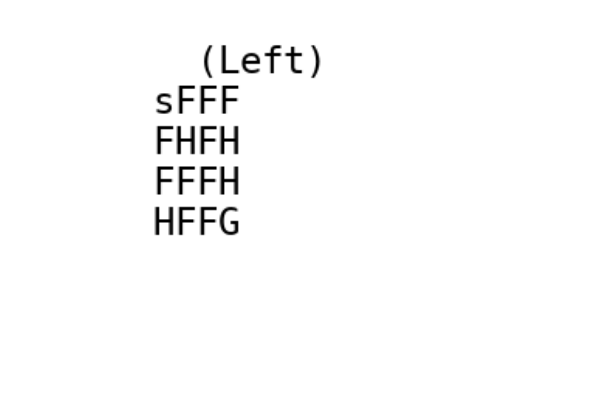
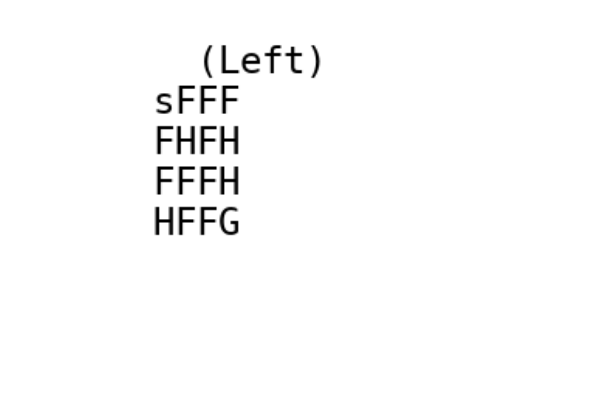
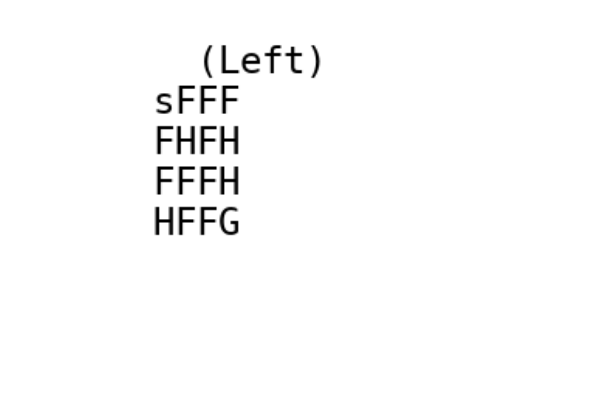
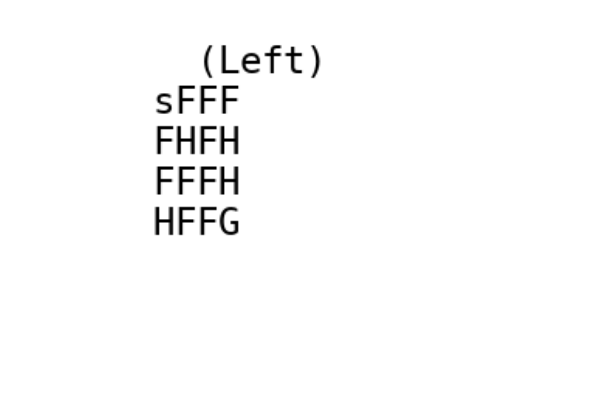
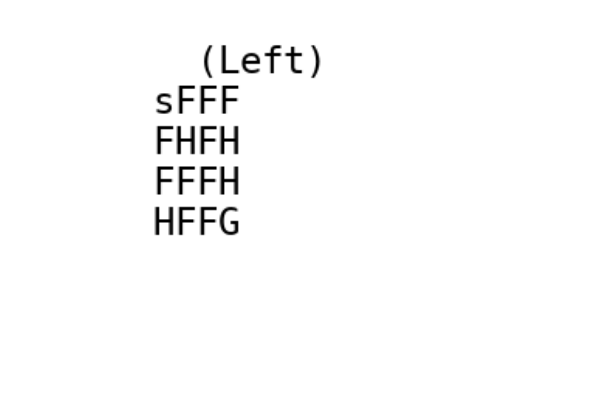
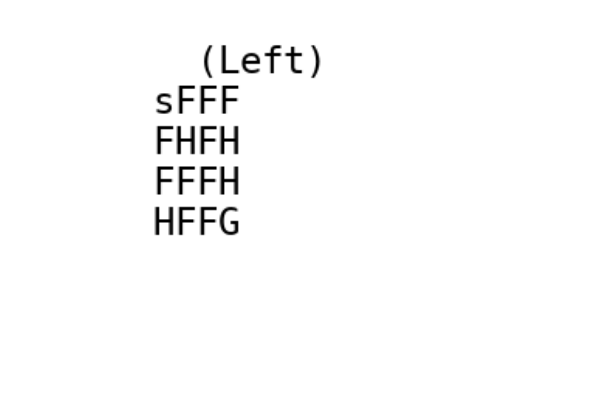
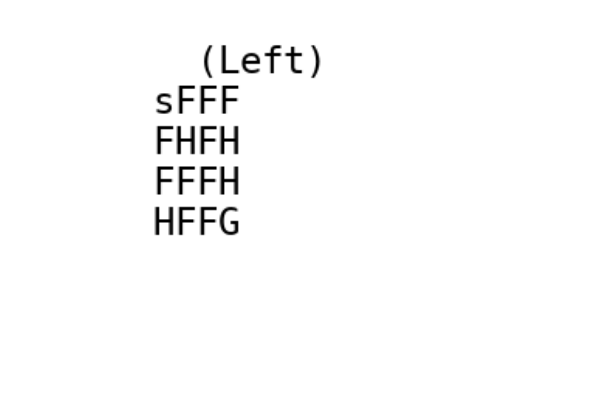
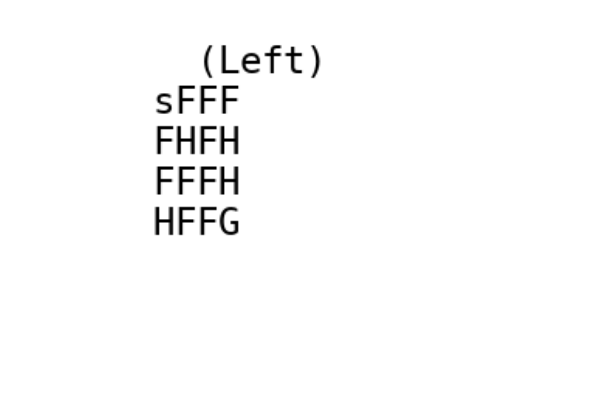
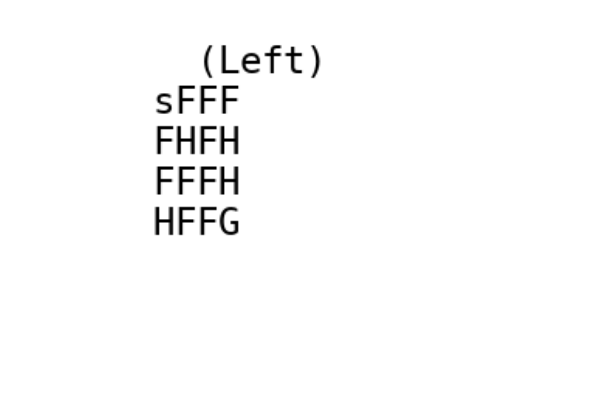
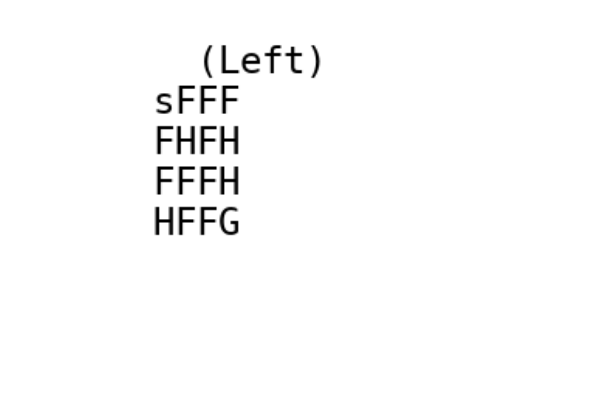
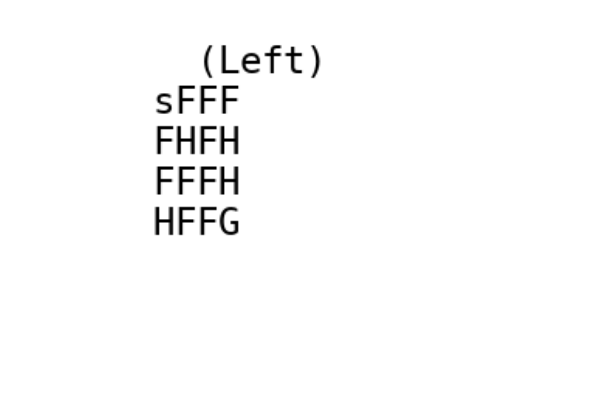
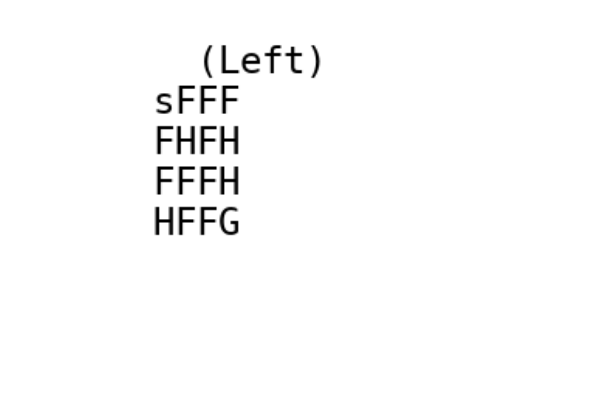
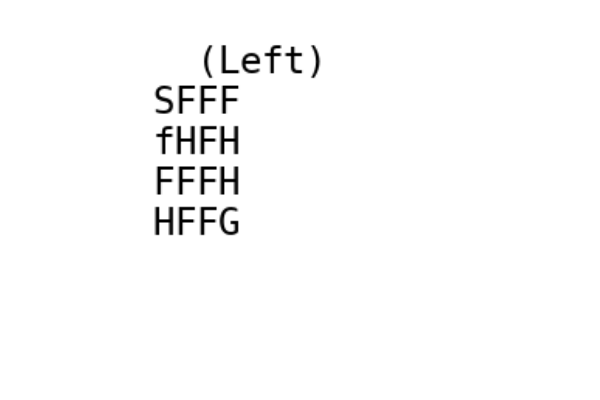
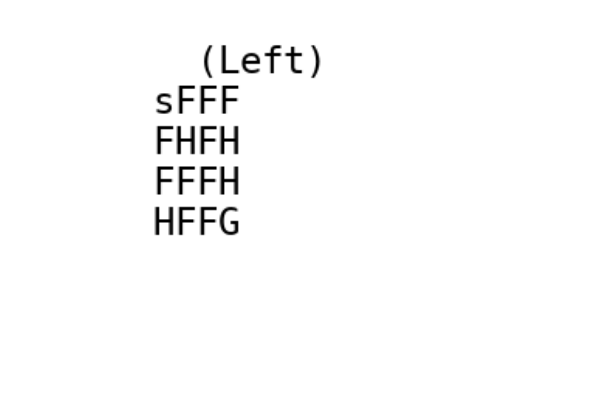
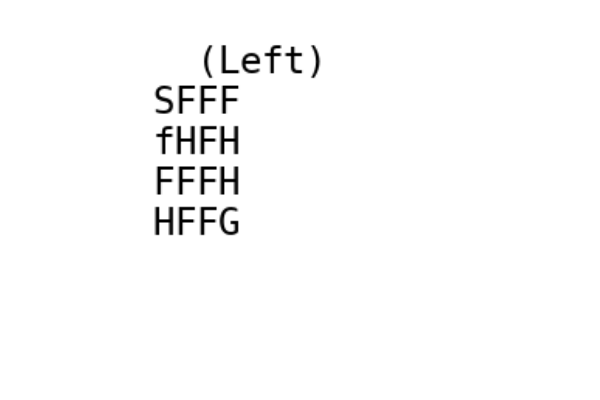
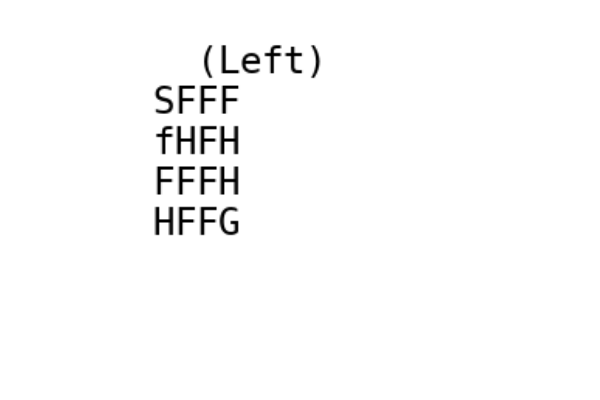
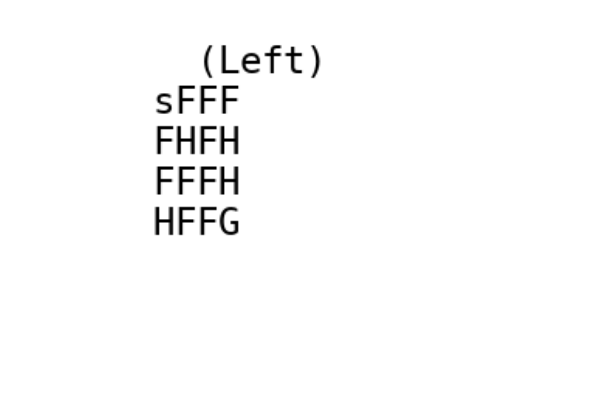
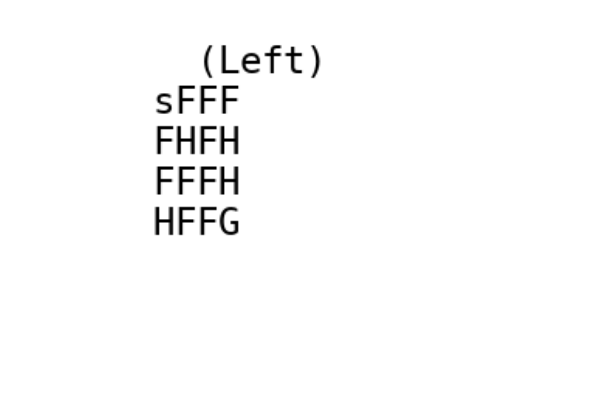
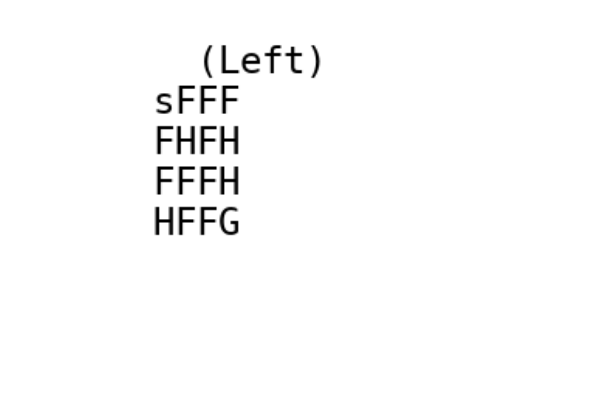
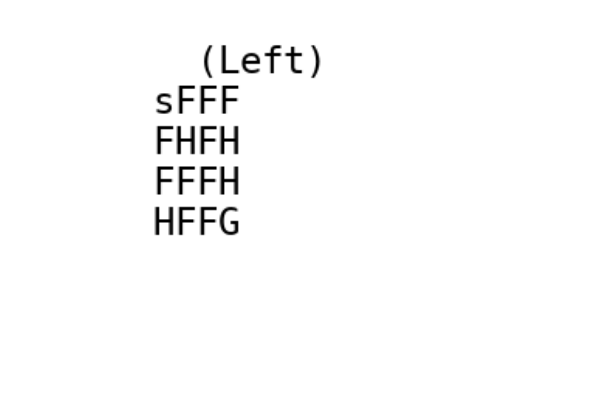
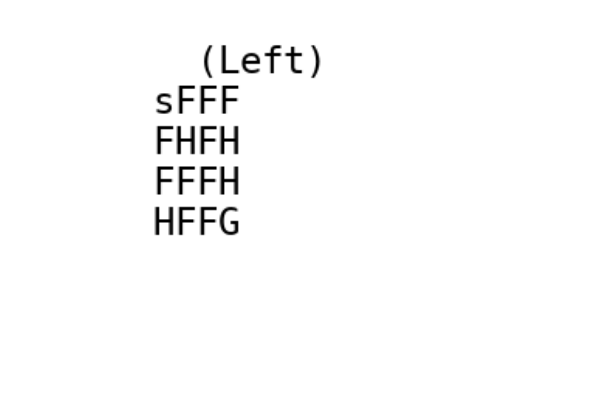
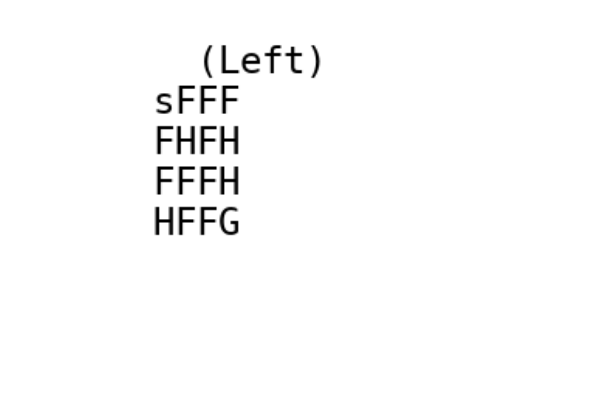
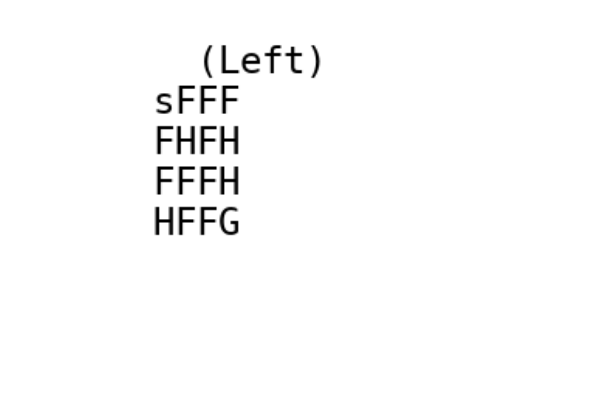
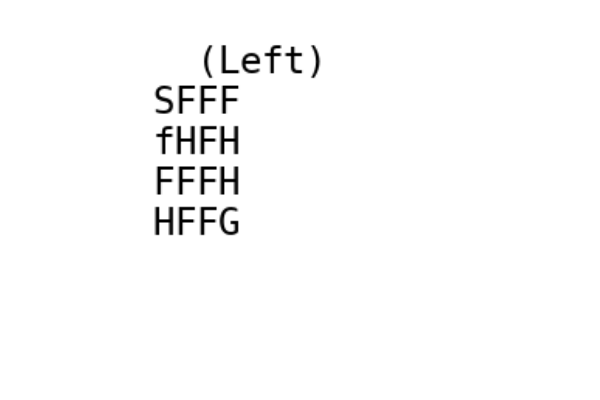
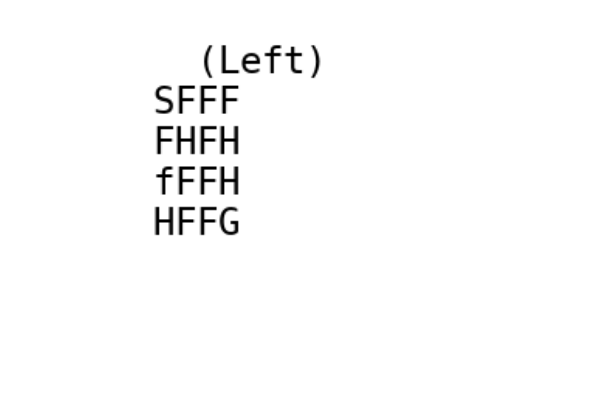
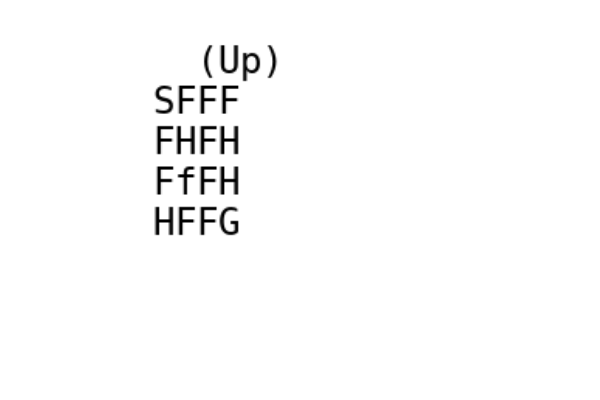
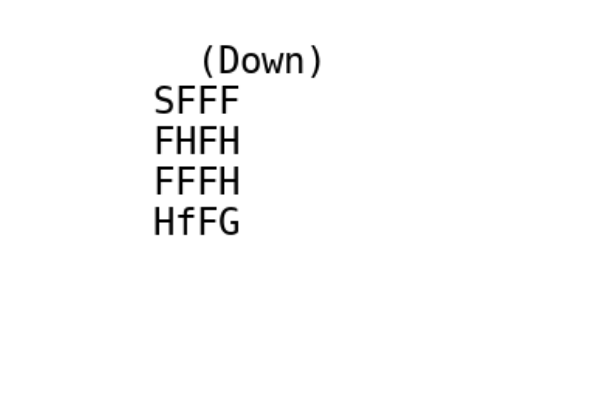
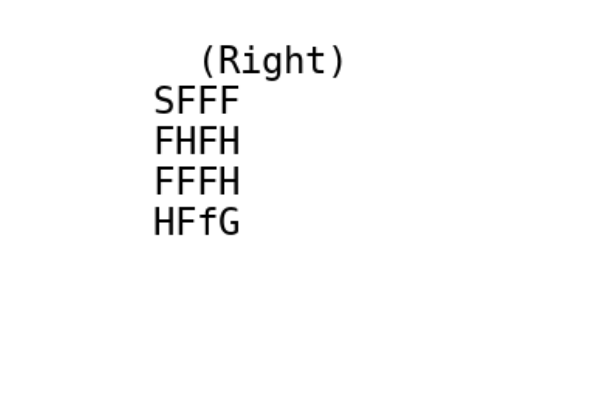
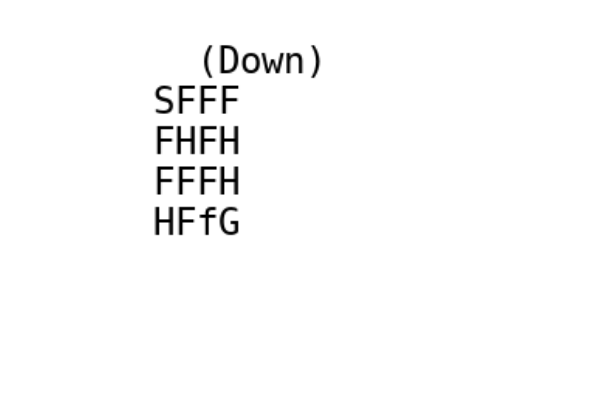
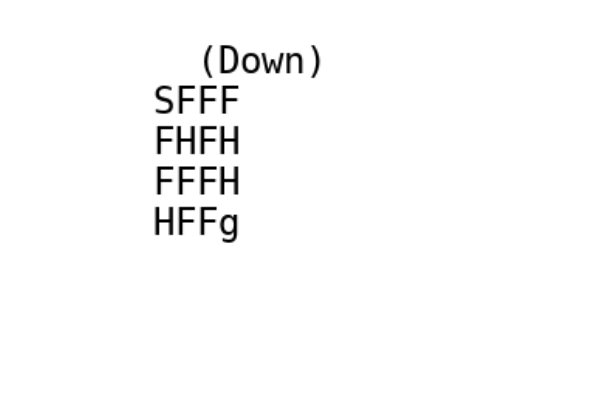
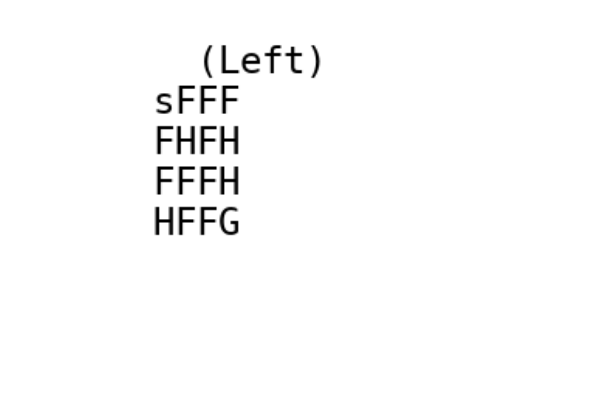
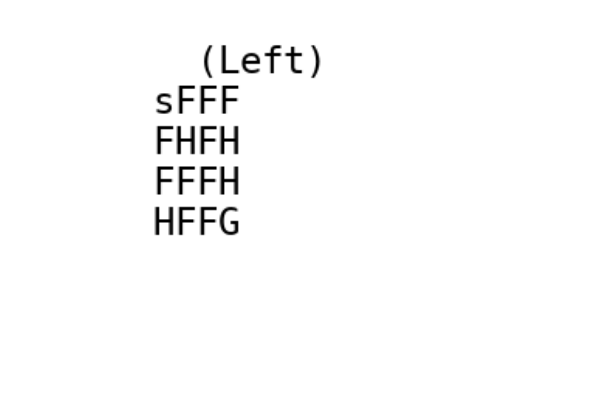
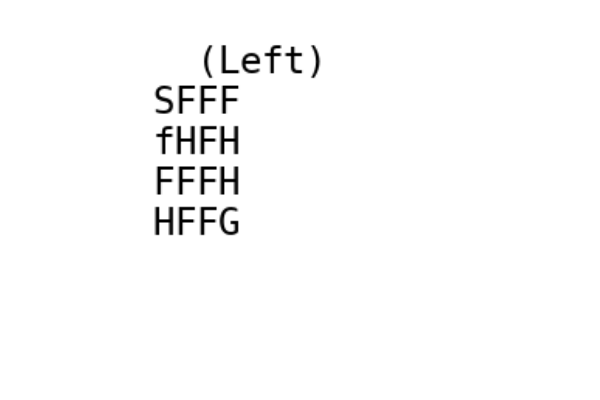
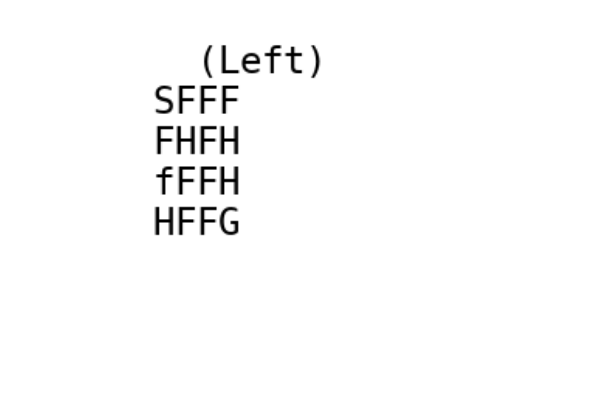
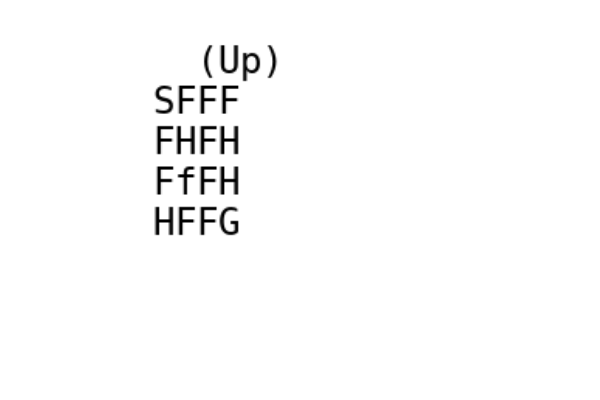
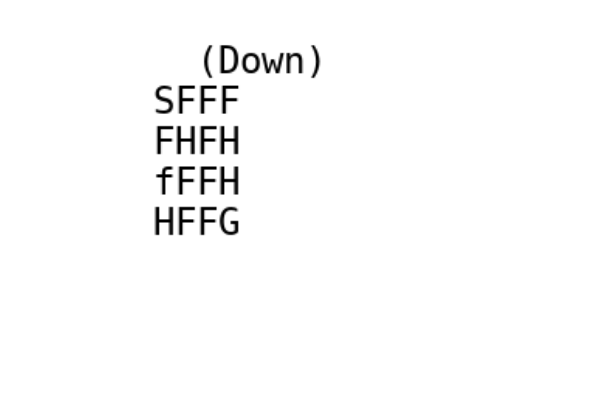
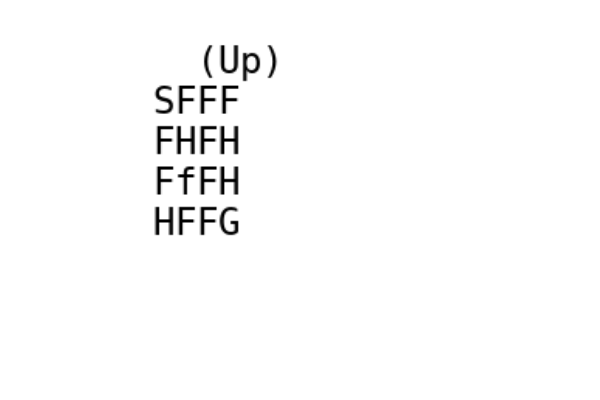
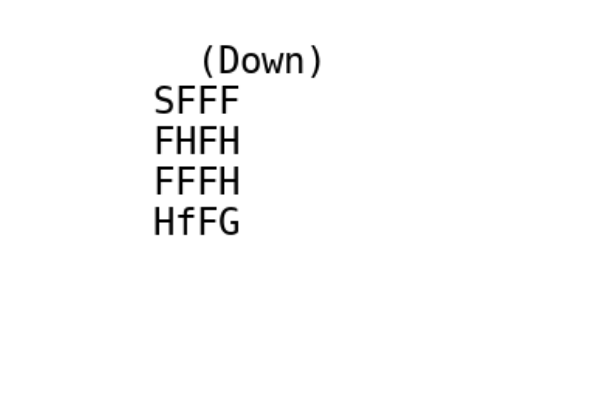
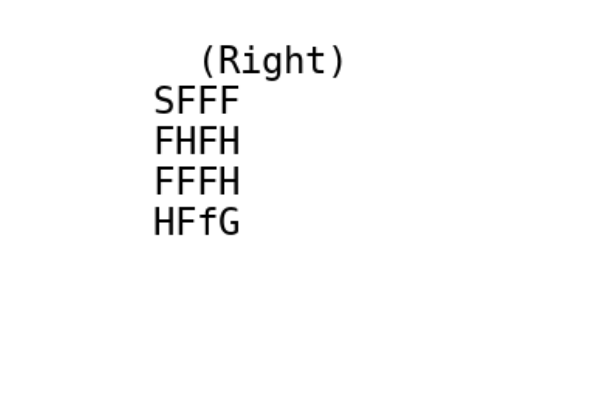
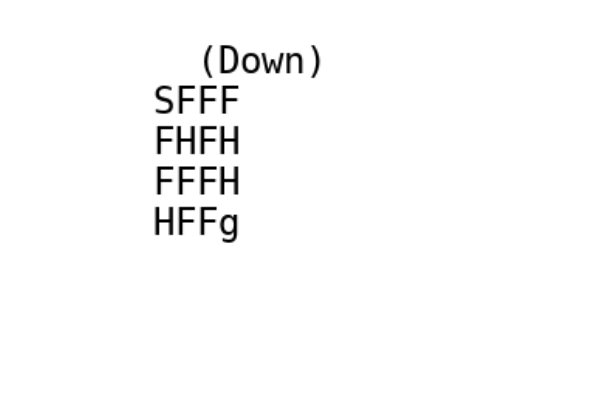
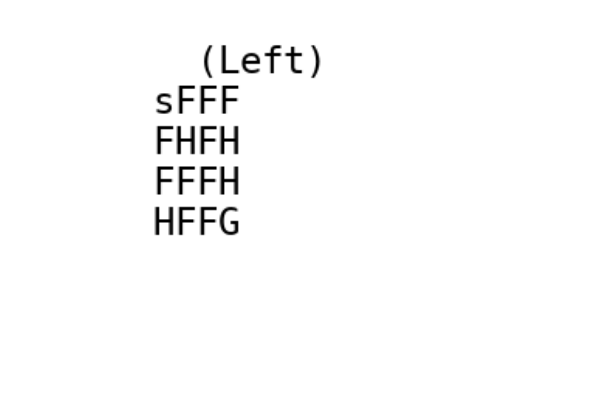
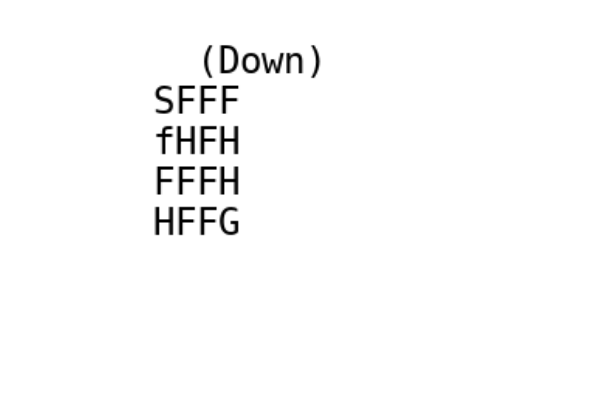
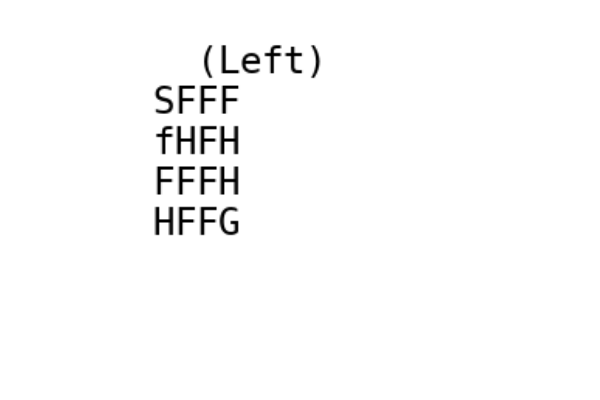
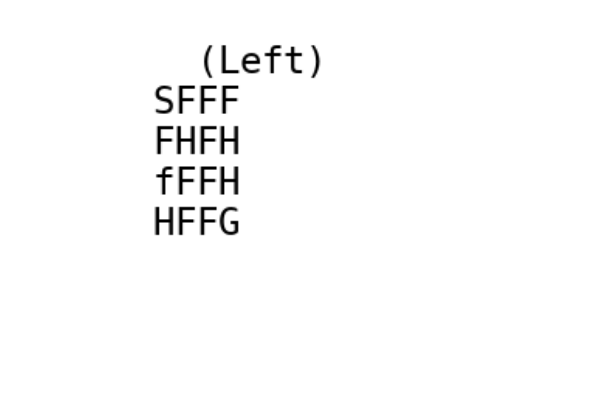
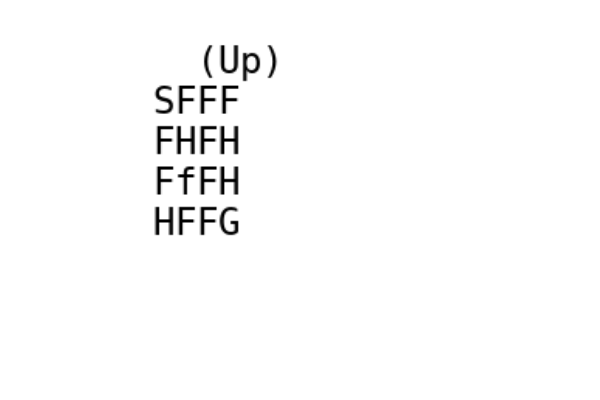
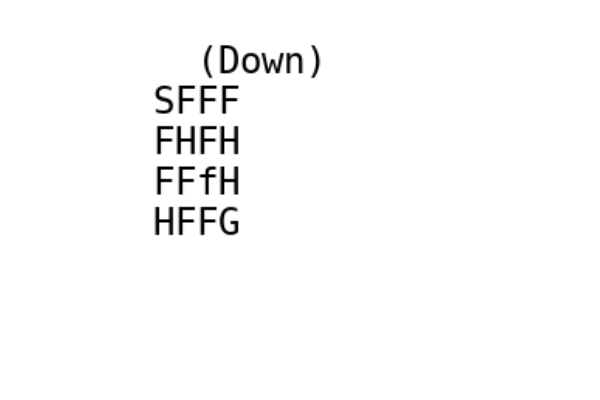
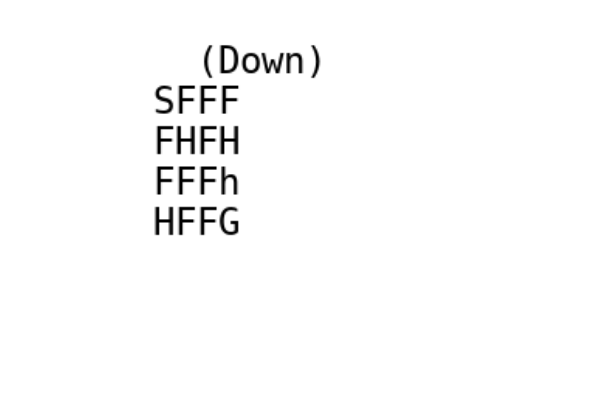
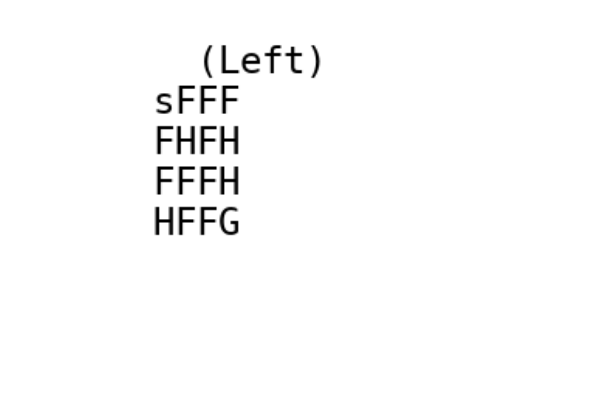
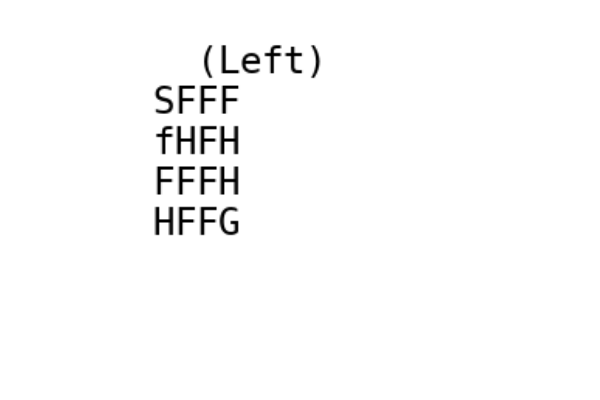
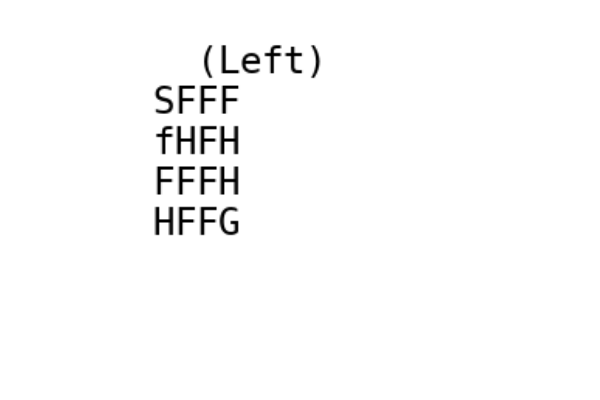
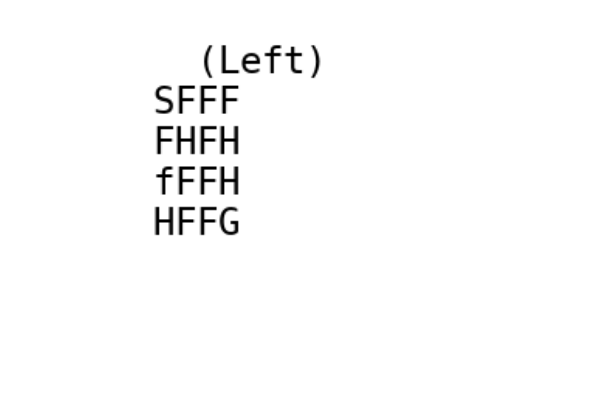
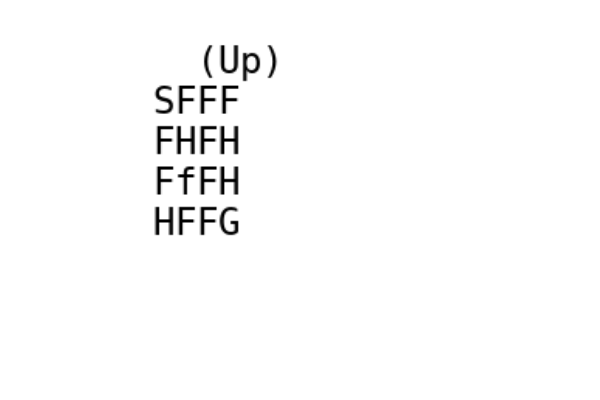
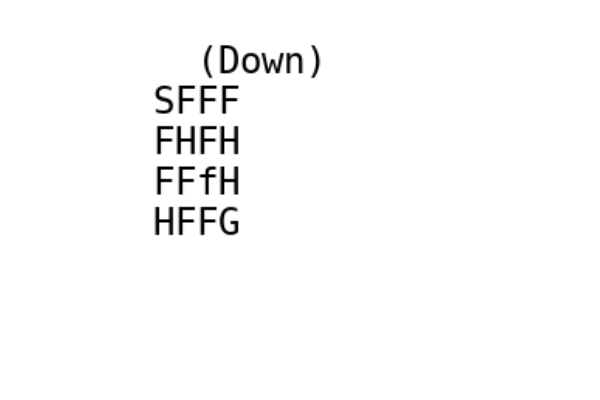
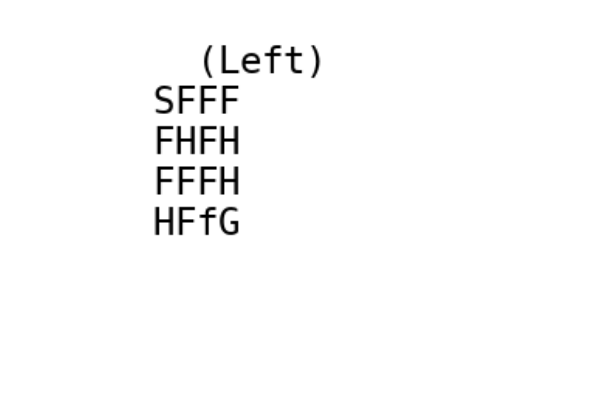
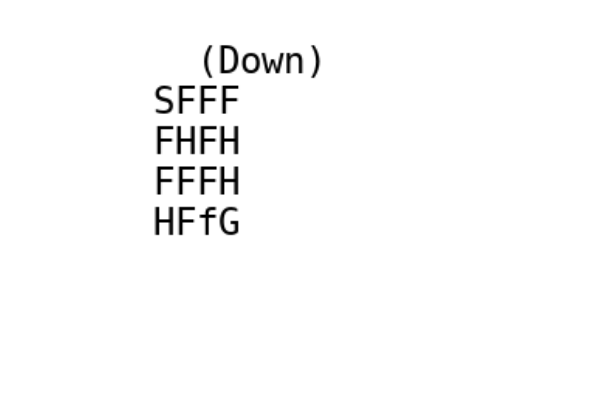
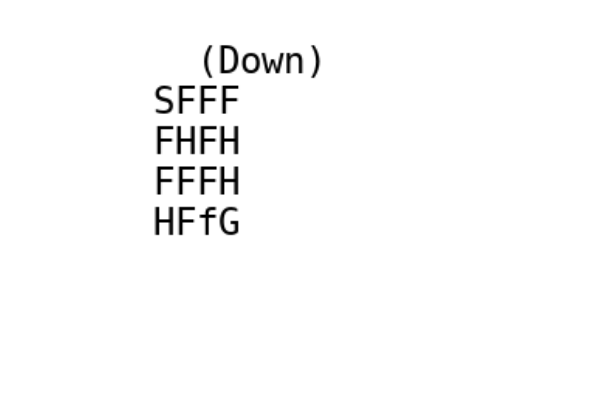
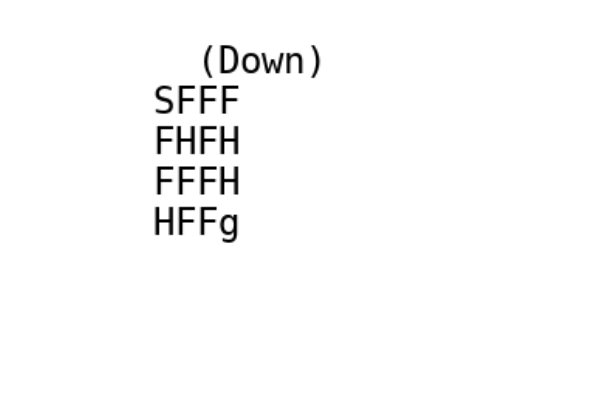
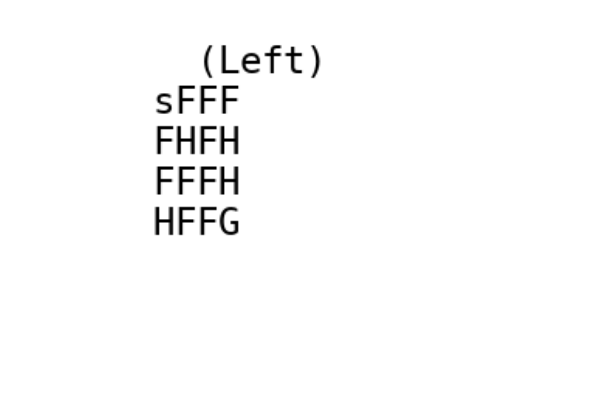
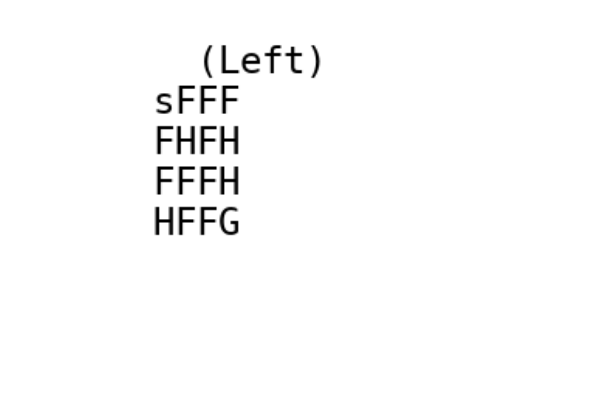
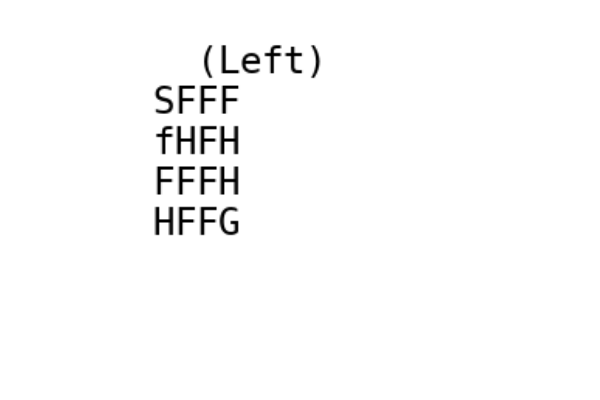
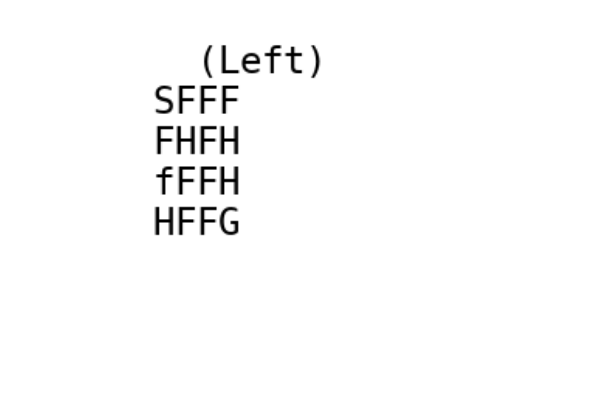
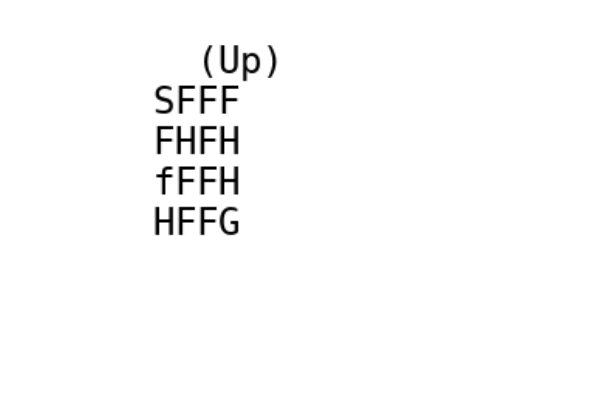
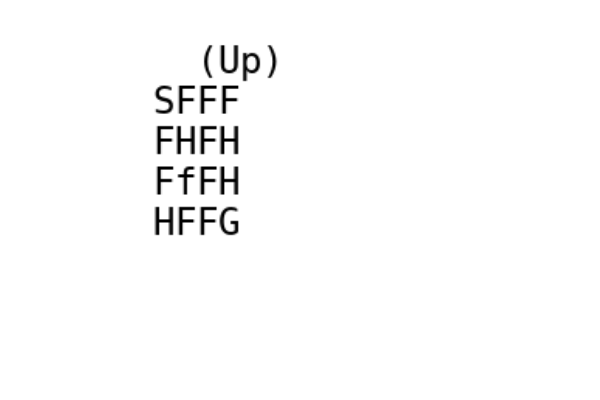
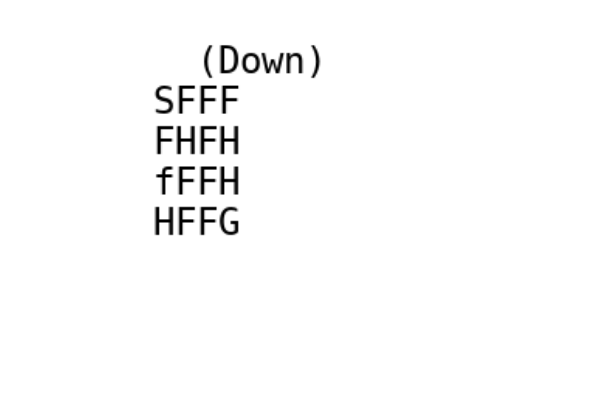
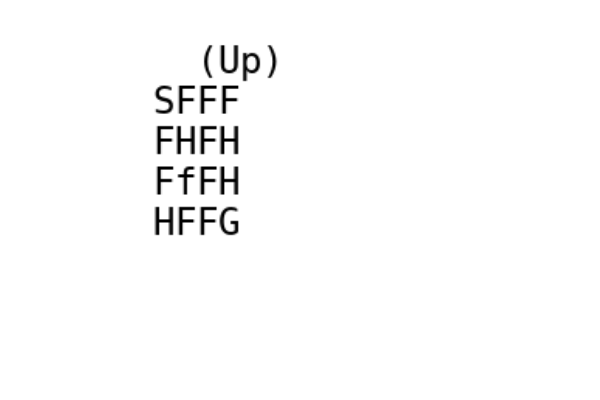
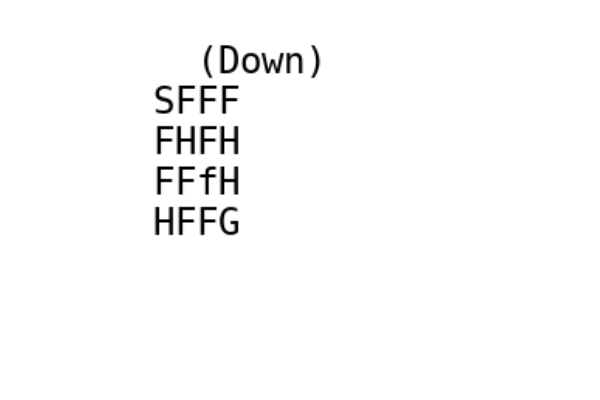
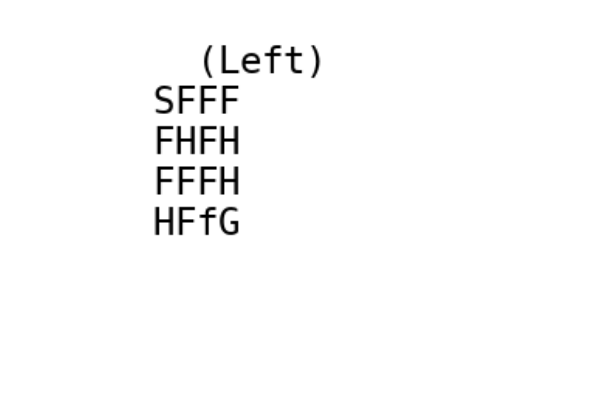
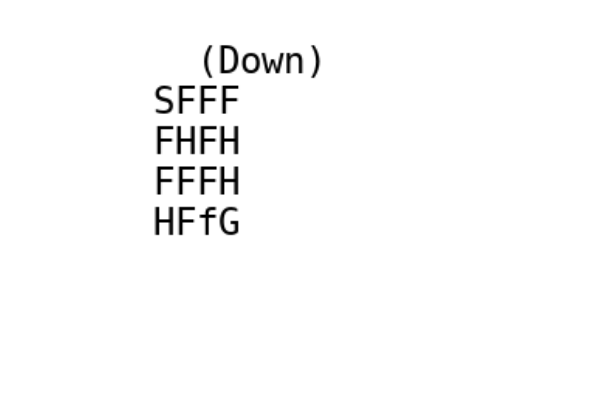
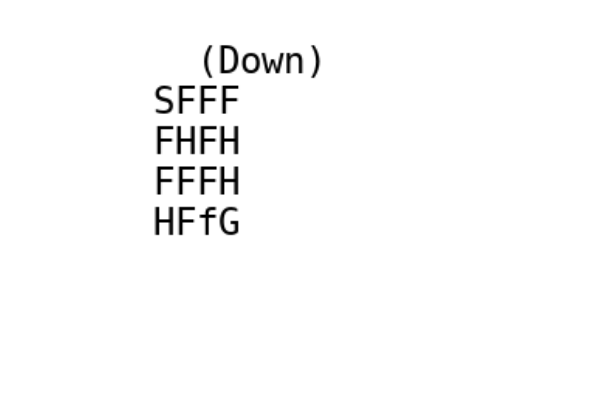
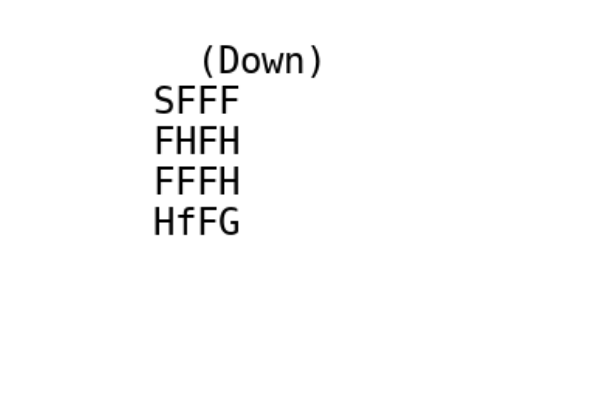
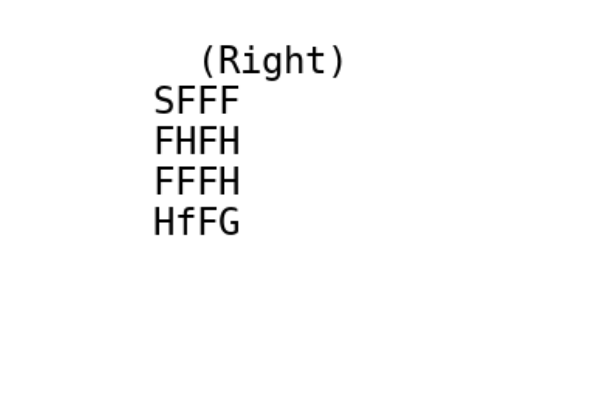
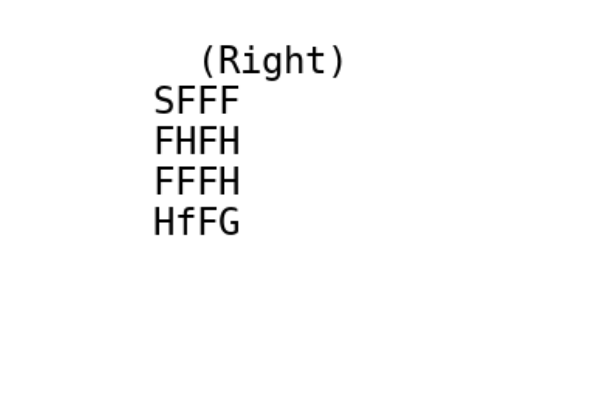
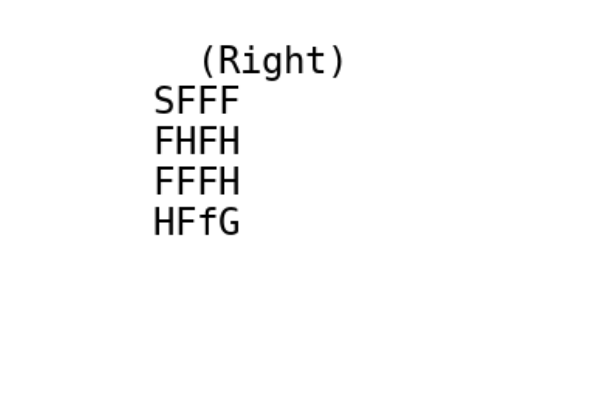
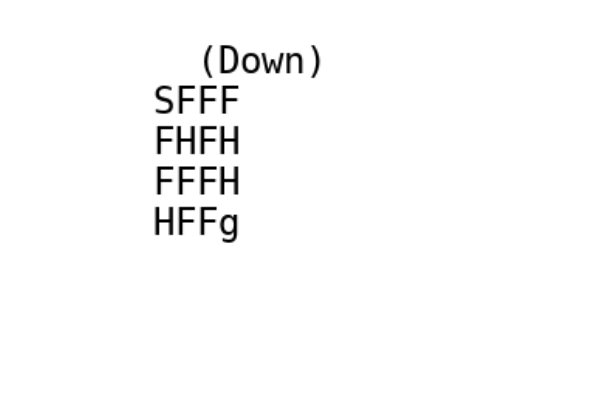
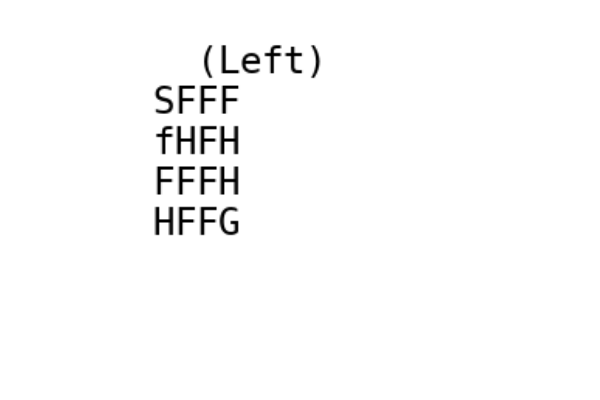
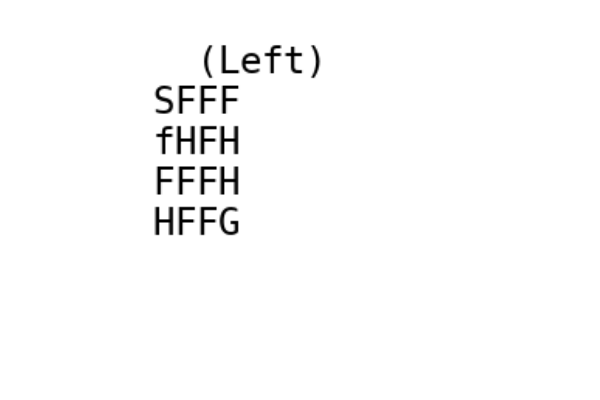
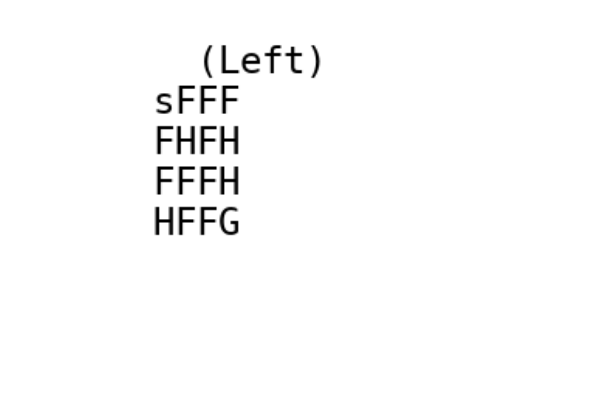
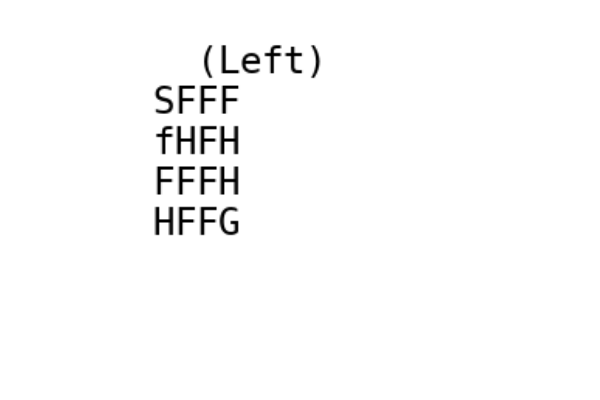
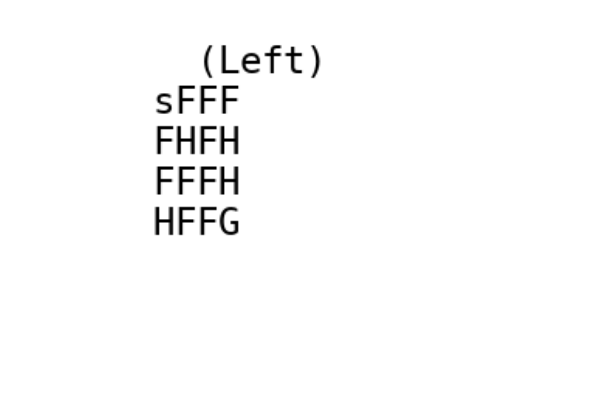
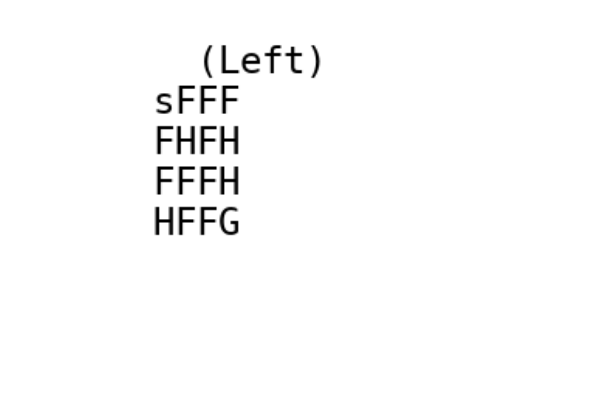
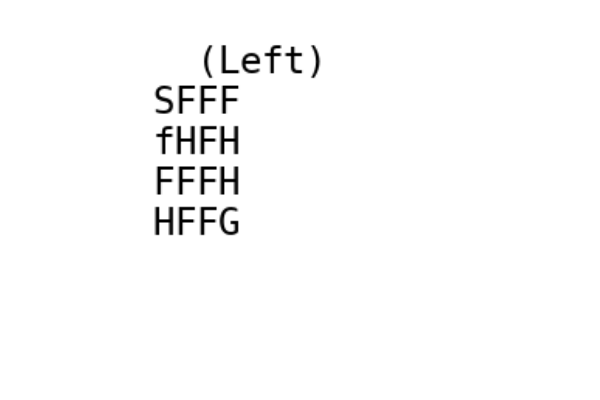
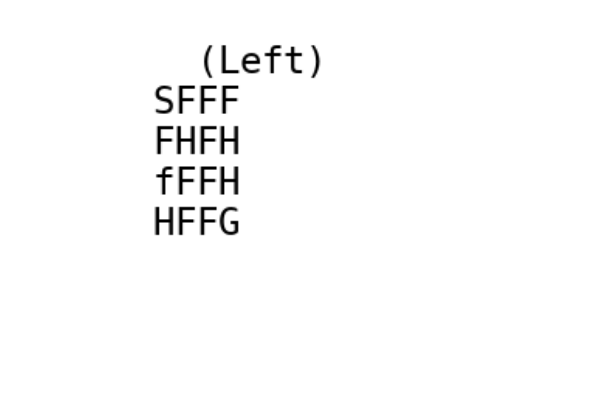
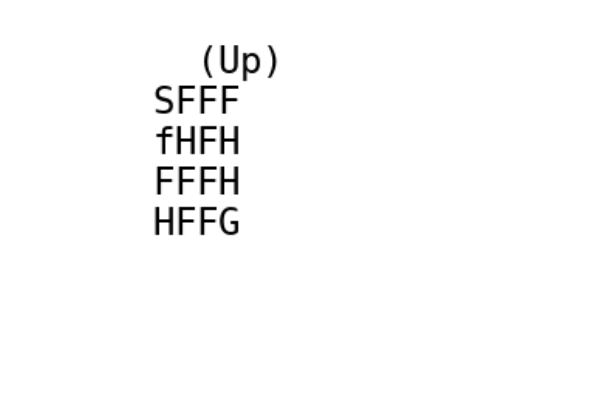
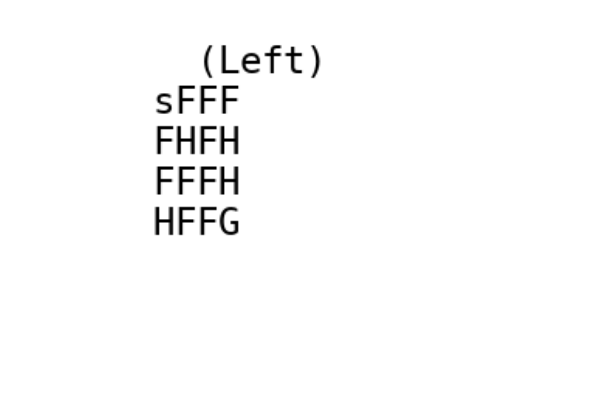
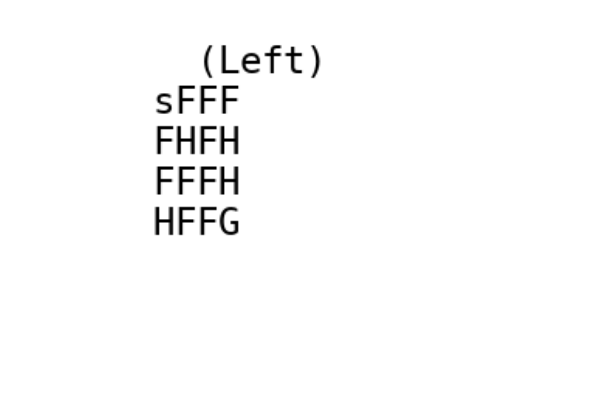
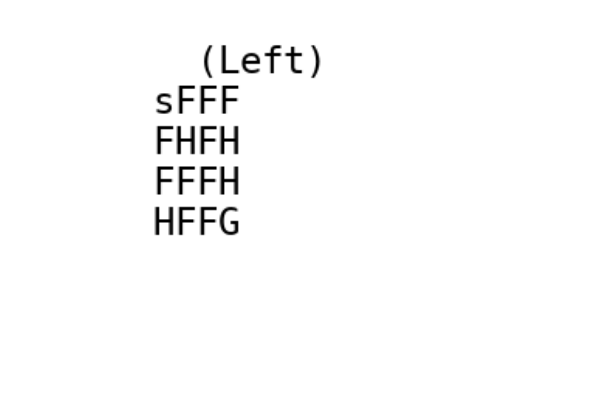
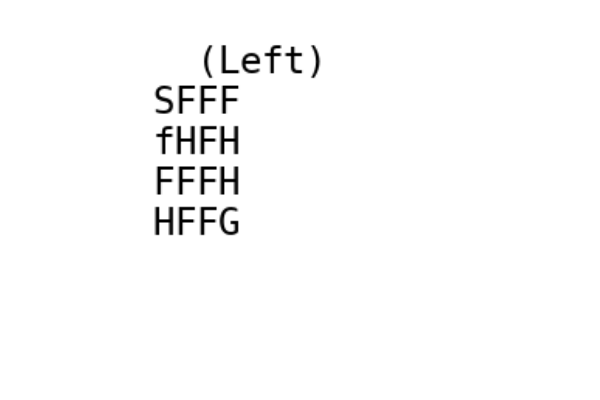
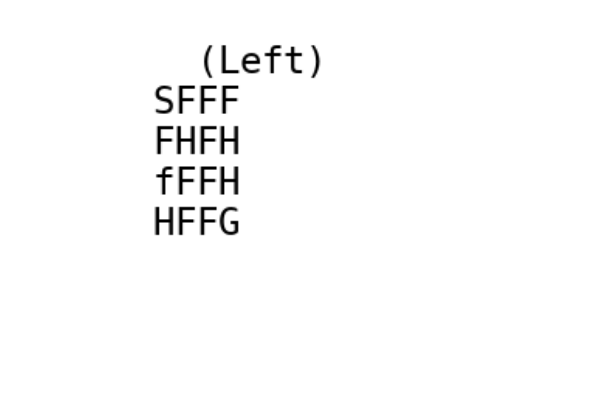
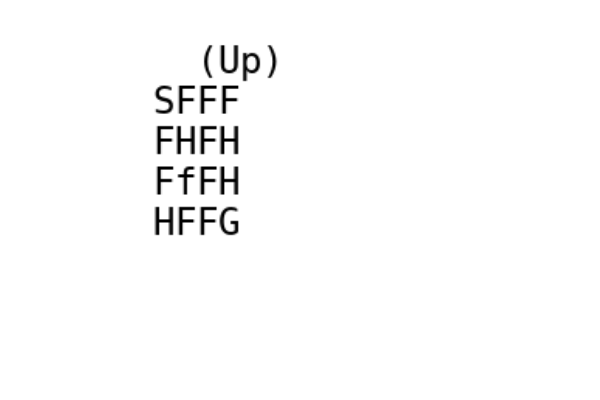
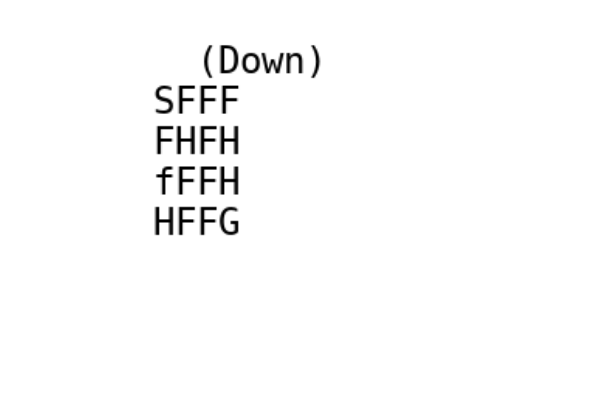
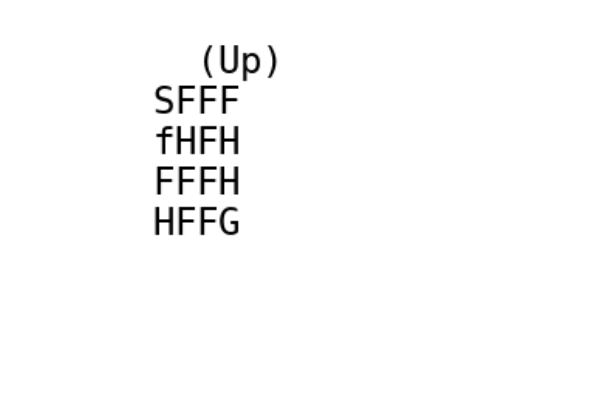
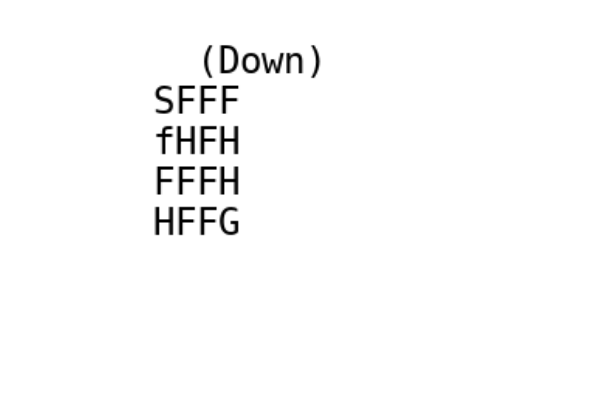
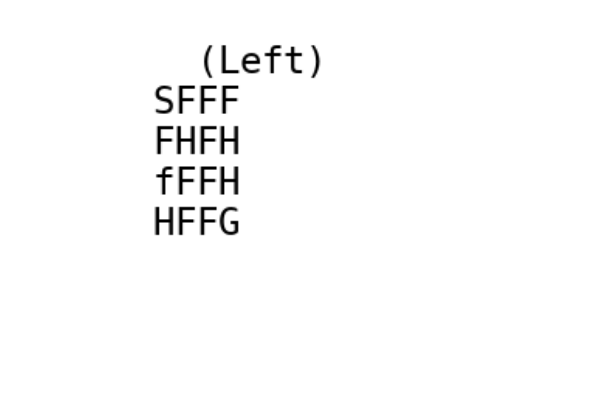
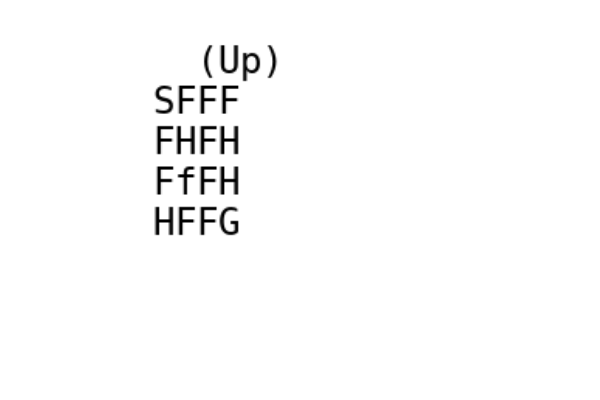
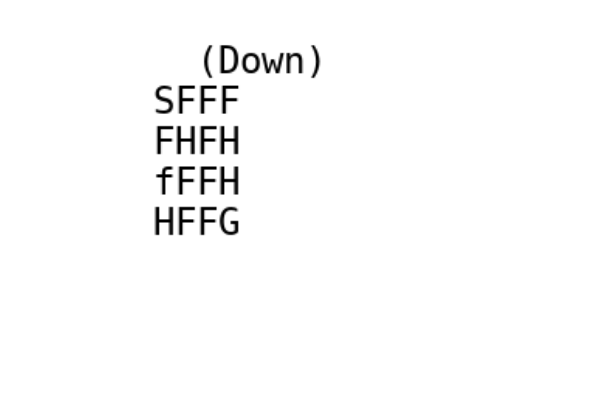
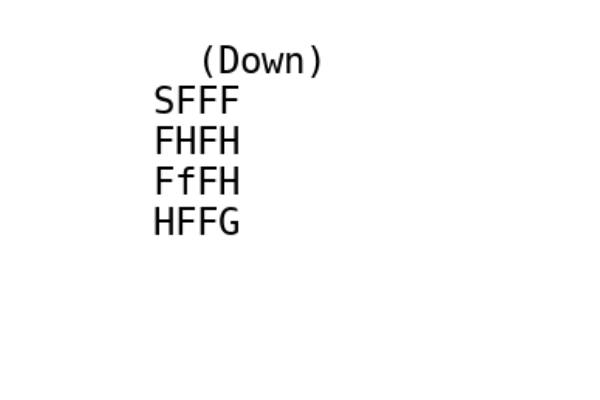
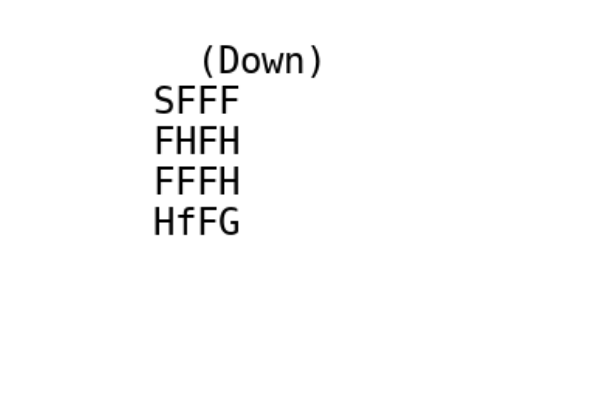
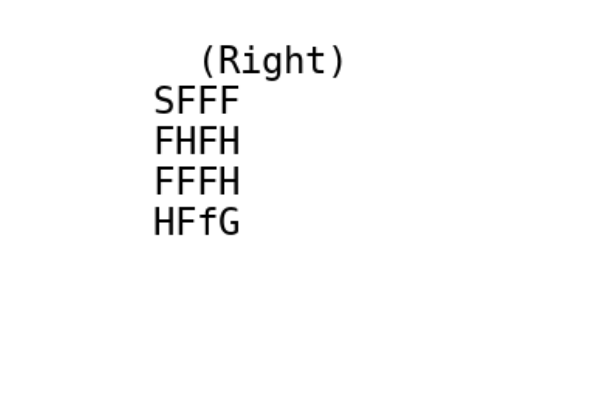
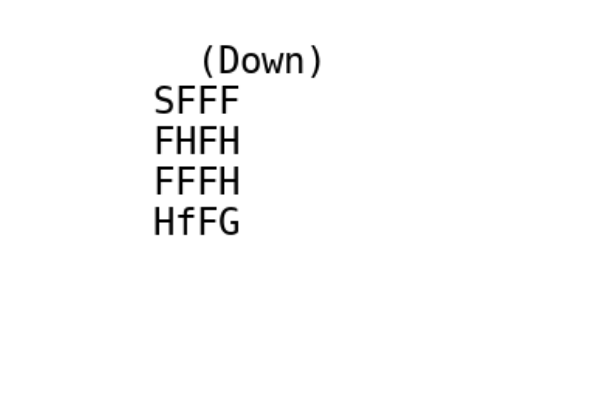
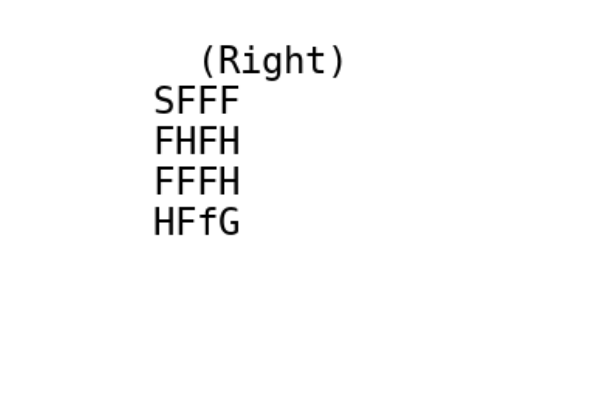
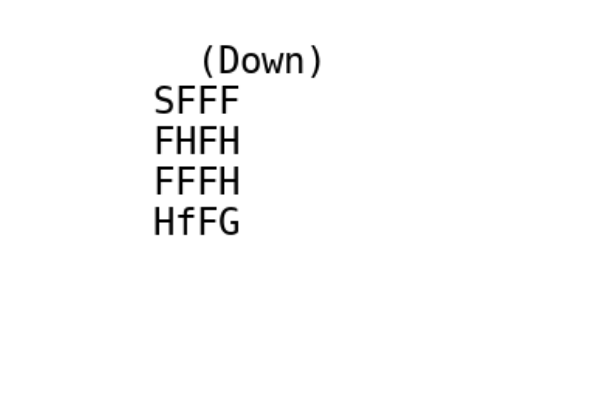
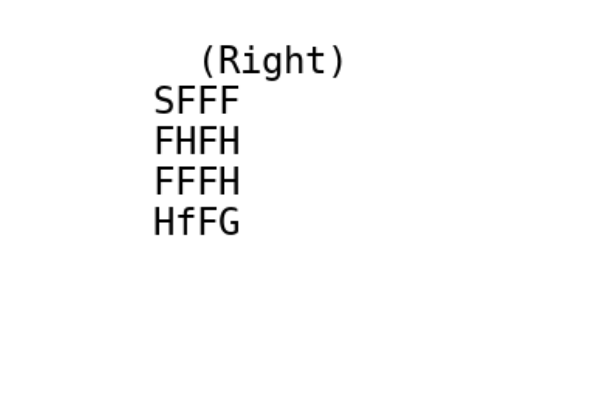
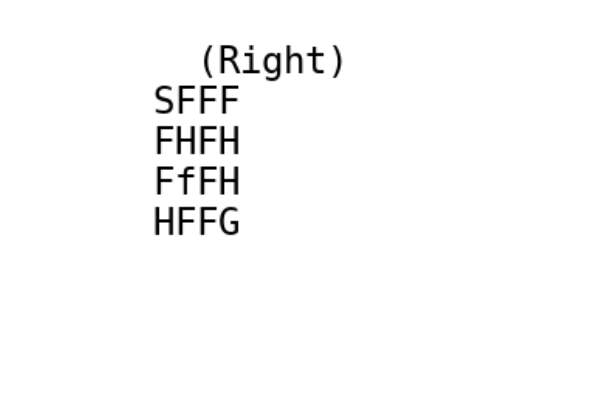
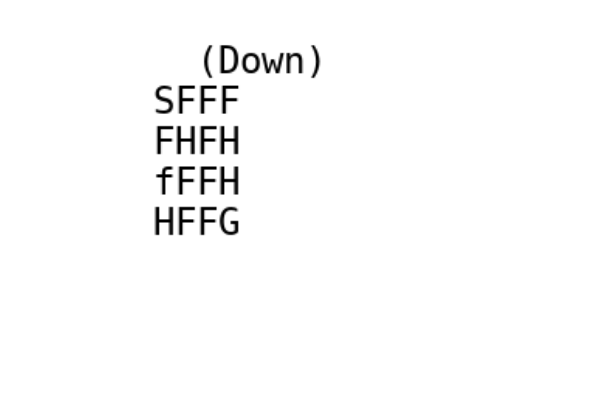
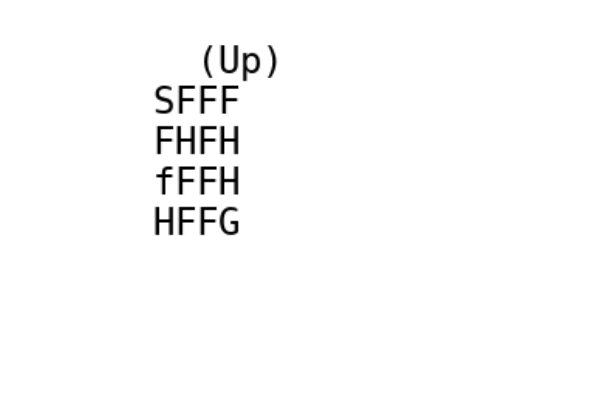
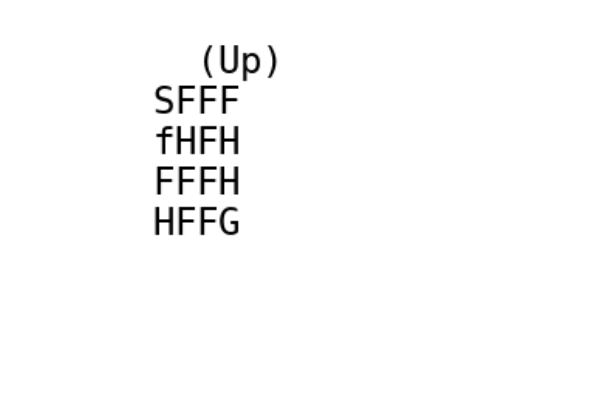
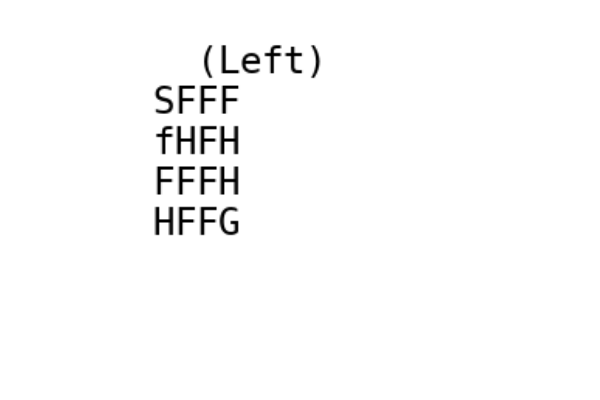
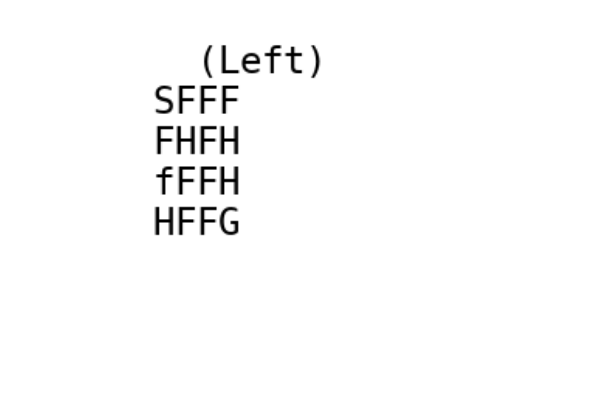
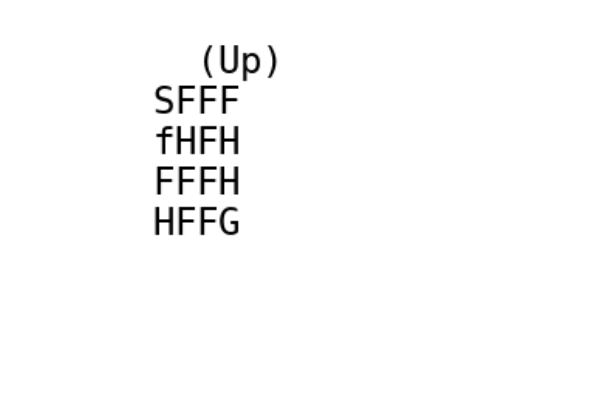
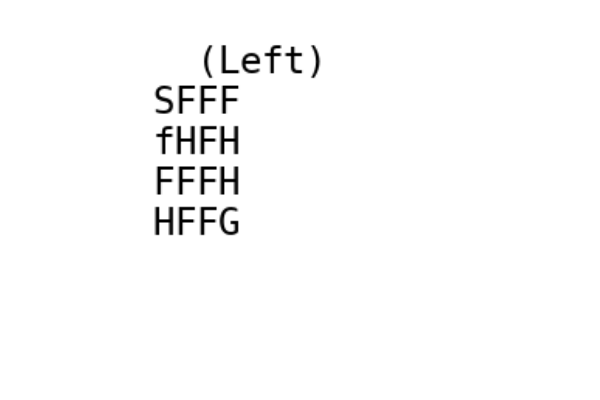
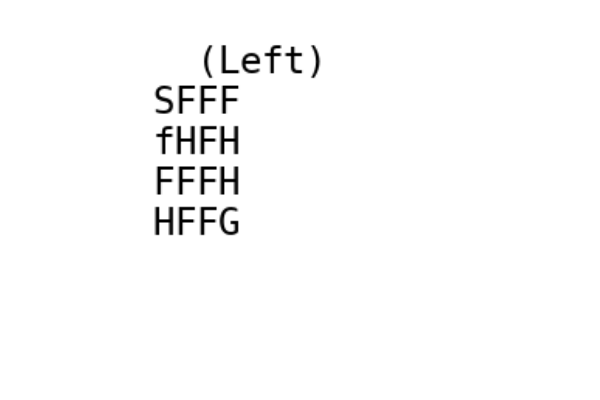
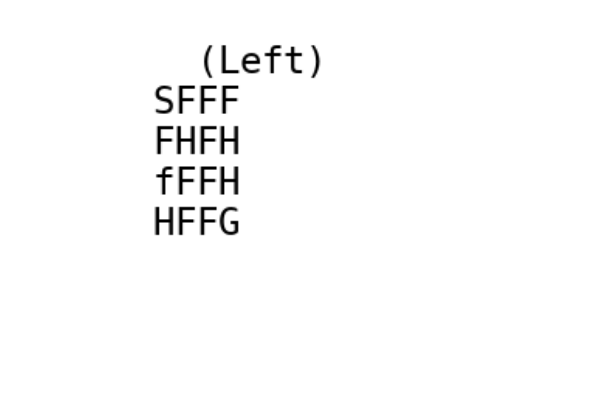
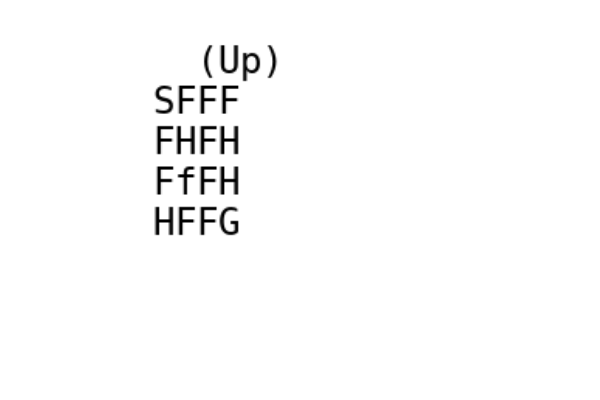
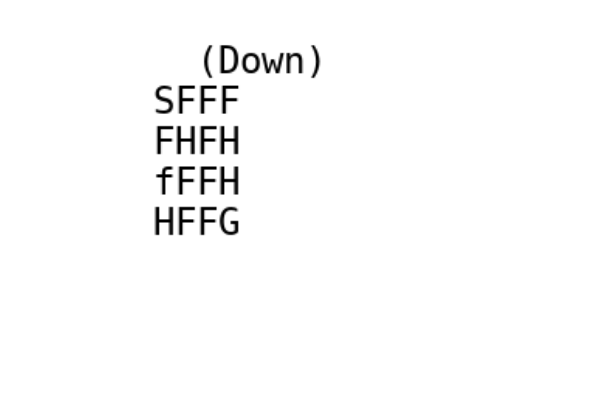
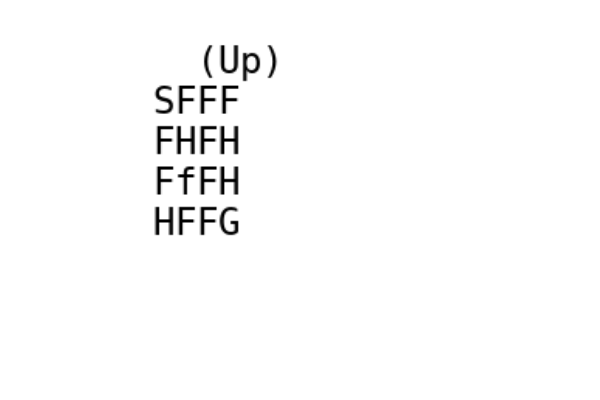
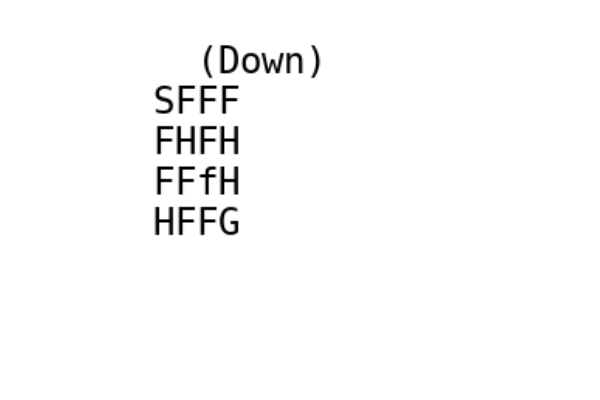
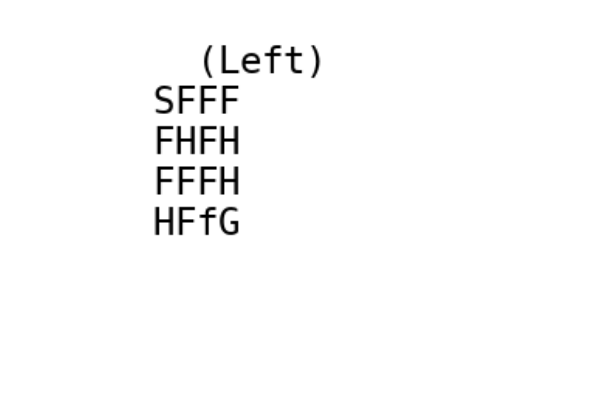
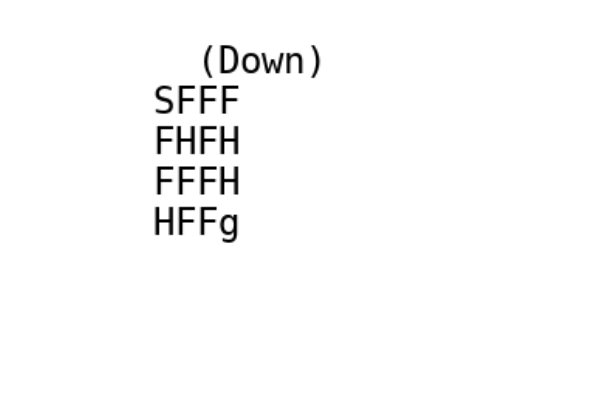
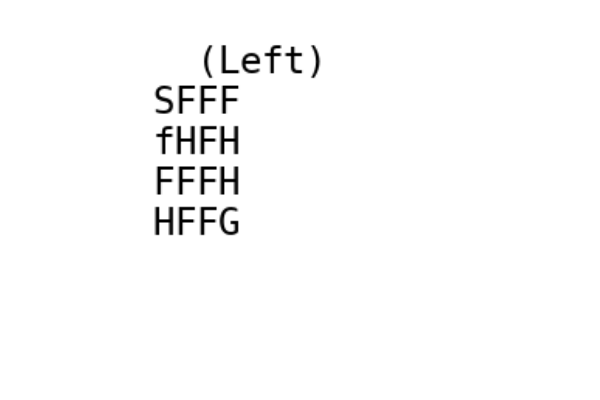
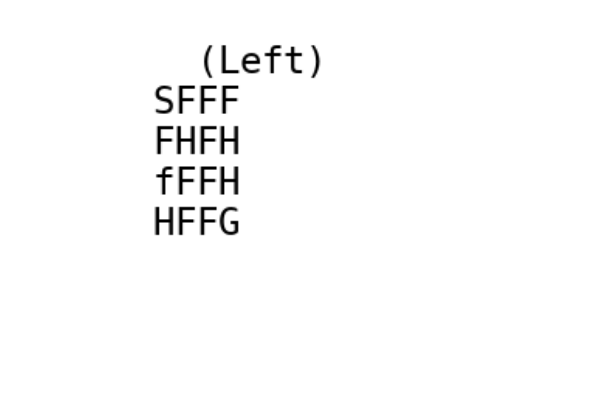
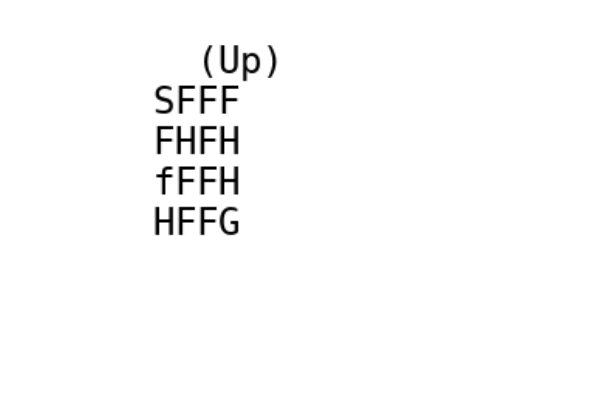
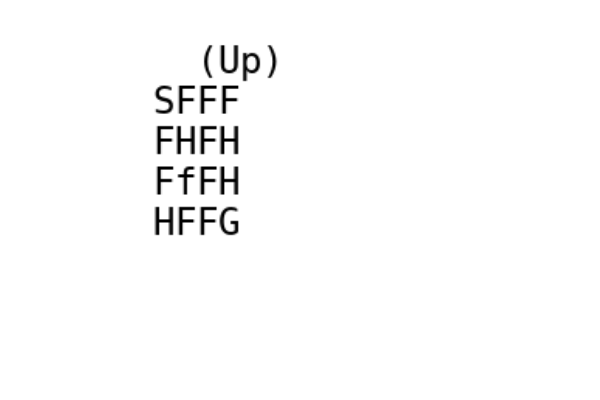
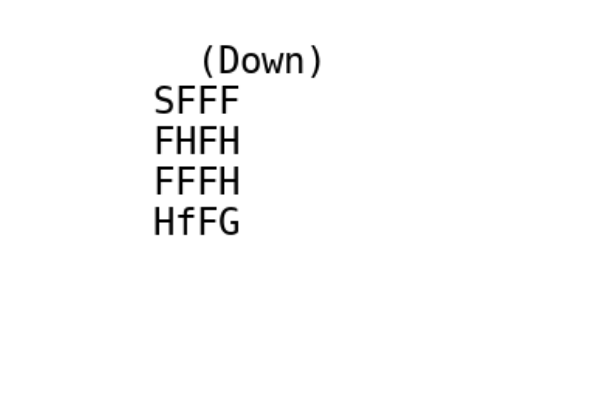
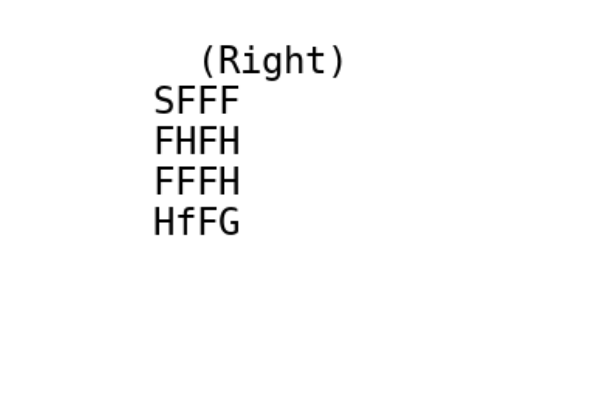
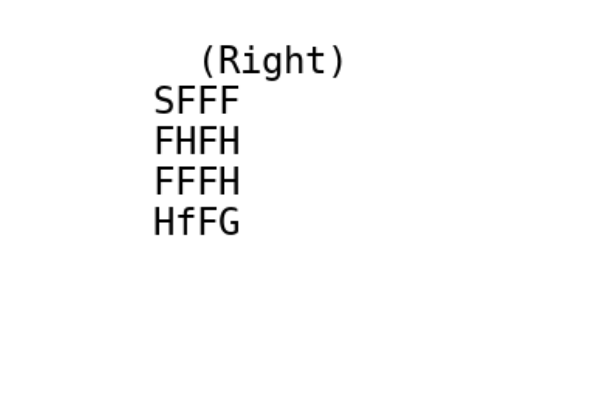
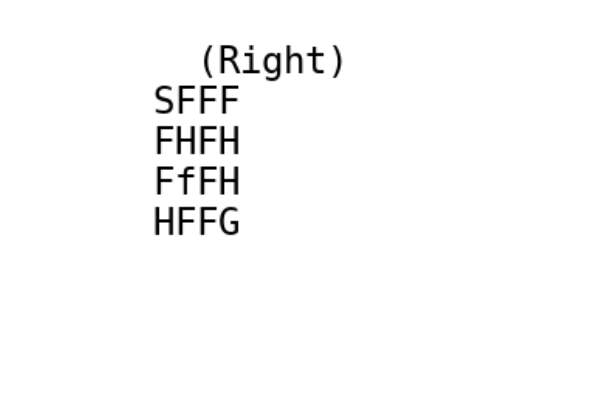
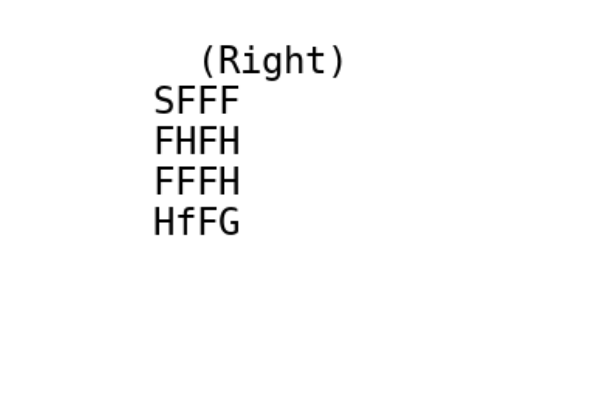
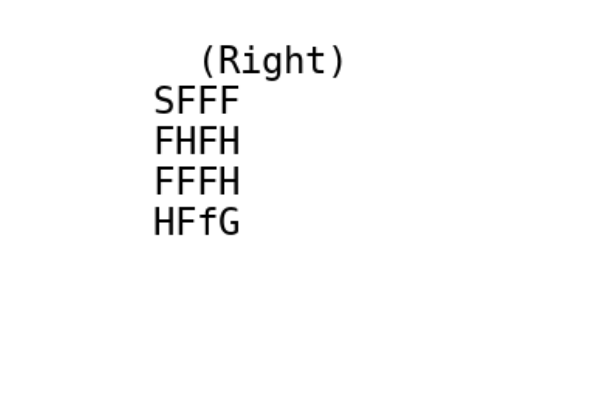
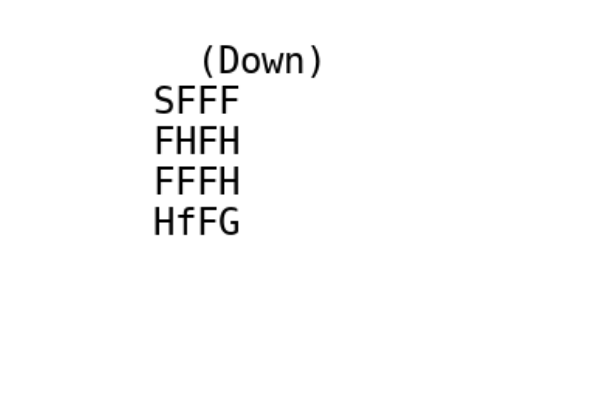
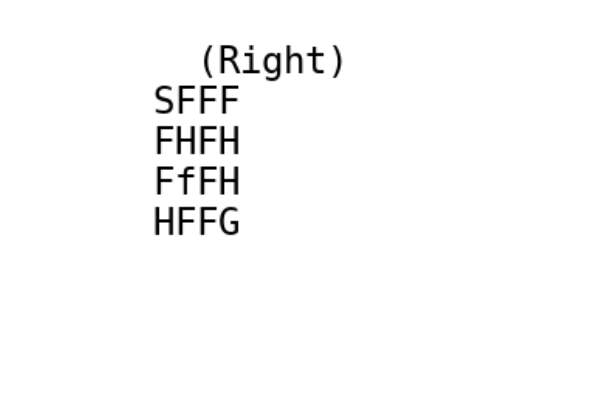
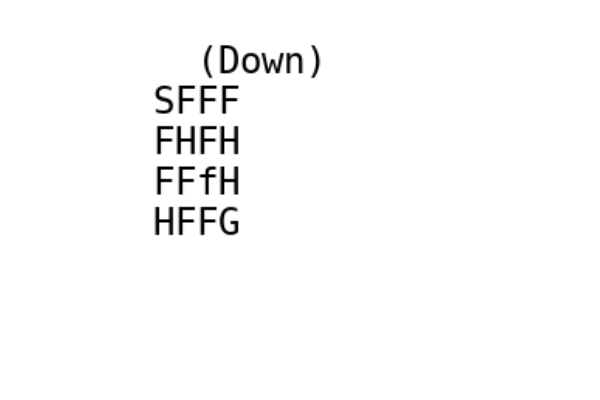
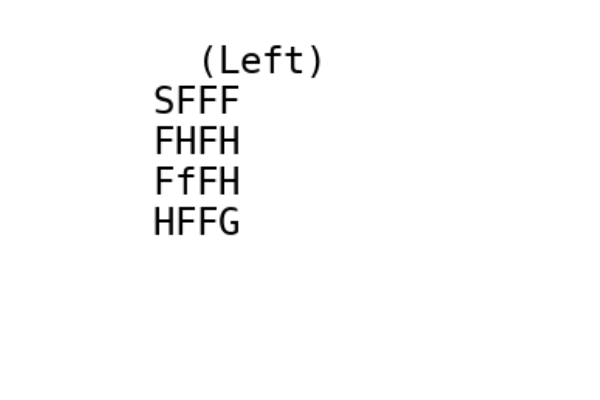
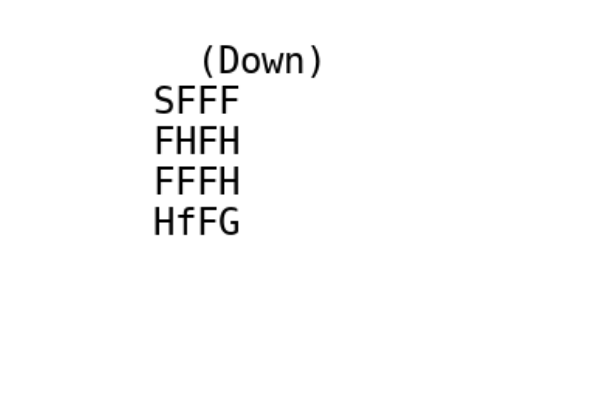
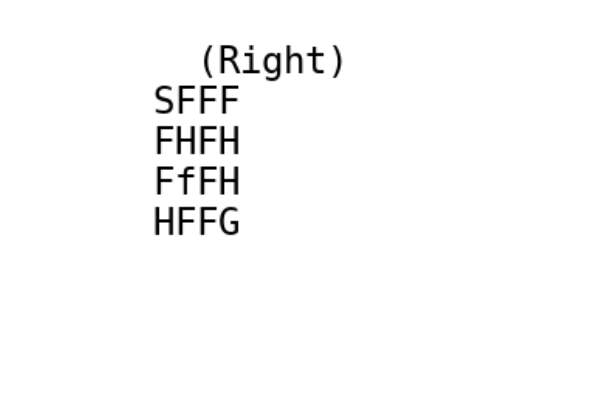
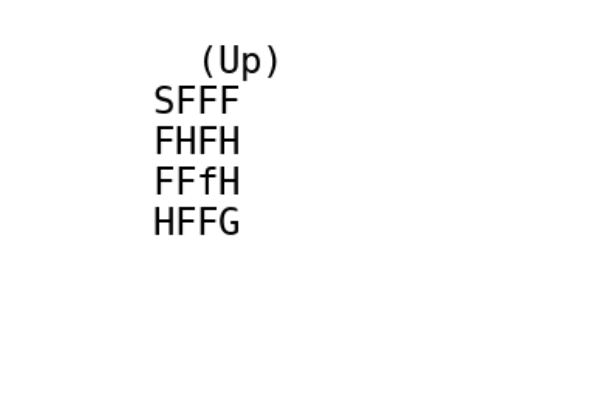
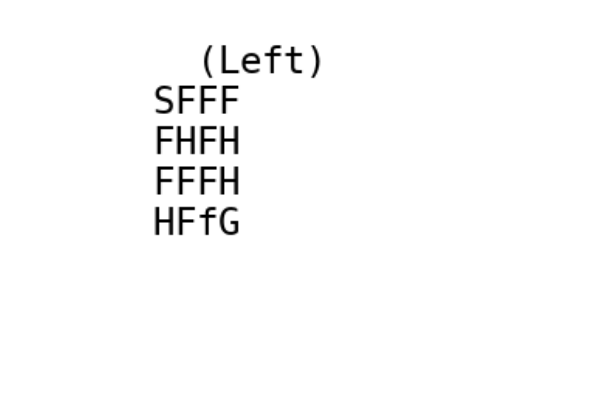
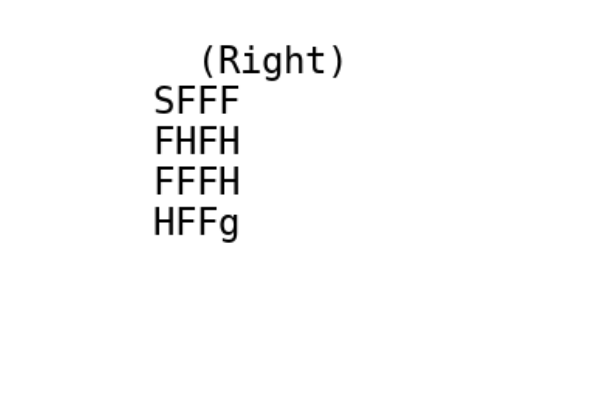
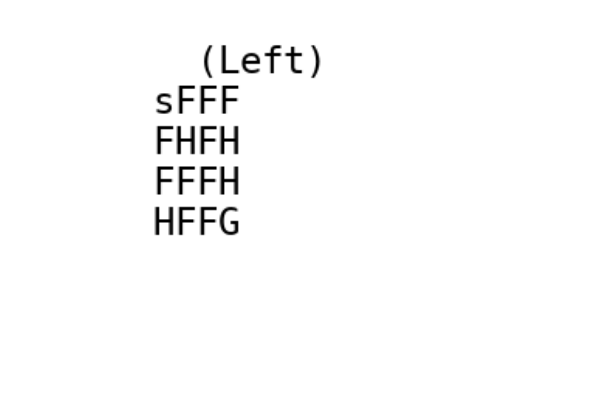
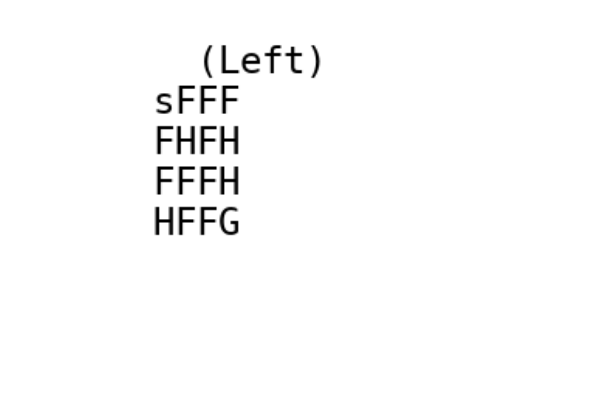
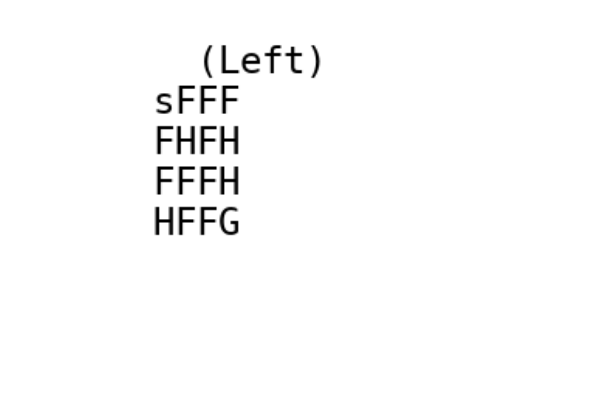

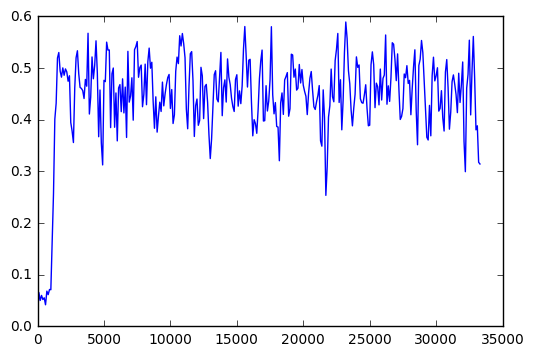

In [106]:
from tabular_q_agent import TabularQAgent

def train_tabular_q_agent():
  env = gym.make(ENV)
  agent = TabularQAgent(env.observation_space, env.action_space)
  print(agent.config['n_iter'])
  learn_rewards = agent.learn(env)
  return agent, learn_rewards

q_agent, reward_history = train_tabular_q_agent()
plt.plot(reward_history[0], reward_history[1])
plt.figure()
print(q_agent.q)

def test_agent(agent):
  env = gym.make(ENV)
  obs = env.reset()
  frames = []
  for i in range(200):
    action = agent.act(obs)
    obs2, reward, done, _ = env.step(action)
    
    env_text = env.render(mode=RENDER_MODE[ENV]).getvalue()
    frames.append(render.text_to_array(env_text))
    
    if done:
      obs2 = env.reset()
    obs = obs2
  env.render(close=True)
  render.display_frames_as_gif(frames)
  
test_agent(q_agent)

[2017-09-10 21:05:28,912] Making new env: FrozenLake-v0


0 0.0
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  1.]]
[[[ 0.25  0.25  0.25  0.25]
  [ 0.25  0.25  0.25  0.25]
  [ 0.25  0.25  0.25  0.25]
  [ 0.25  0.25  0.25  0.25]]

 [[ 0.25  0.25  0.25  0.25]
  [ 0.25  0.25  0.25  0.25]
  [ 0.25  0.25  0.25  0.25]
  [ 0.25  0.25  0.25  0.25]]

 [[ 0.25  0.25  0.25  0.25]
  [ 0.25  0.25  0.25  0.25]
  [ 0.25  0.25  0.25  0.25]
  [ 0.25  0.25  0.25  0.25]]

 [[ 0.25  0.25  0.25  0.25]
  [ 0.25  0.25  0.25  0.25]
  [ 0.3   0.3   0.3   0.1 ]
  [ 0.25  0.25  0.25  0.25]]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
610 1.0
[[ 0.02023347  0.01851356  0.02982173  0.01750406]
 [ 0.02830065  0.          0.05628086  0.        ]
 [ 0.0562831   0.12387217  0.1786259   0.        ]
 [ 0.          0.22387681  0.48142439  1.01821012]]
[[[ 0.1   0.1   0.1   0.7 ]
  [ 0.1   0.1   0.7   0.1 ]
  [ 0.1   0.1   0.1   0.7 ]
  [ 0.1   0.1   0.7   0.1 ]]

 [[ 0.1   0.1   0.1   0.7 ]
  [ 0.25  0.25  0.25  0.25]
  [ 0.1   0.4   0.1   0.4 ]
  [ 0


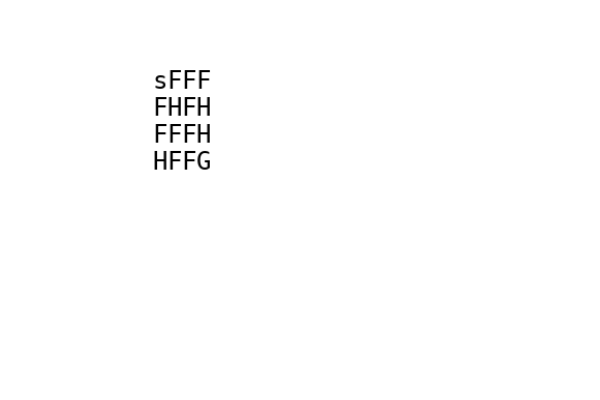
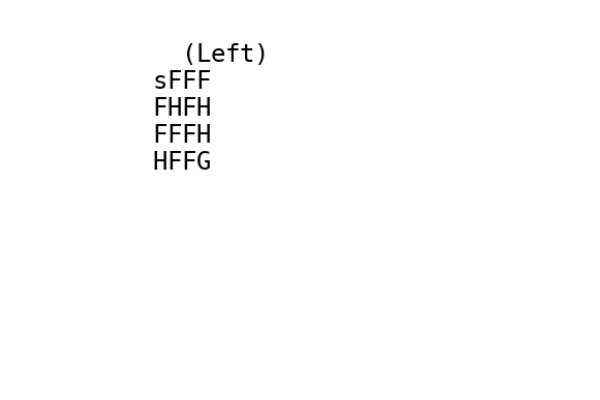
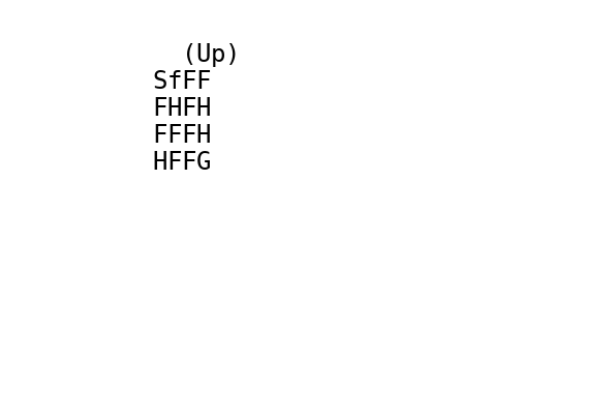
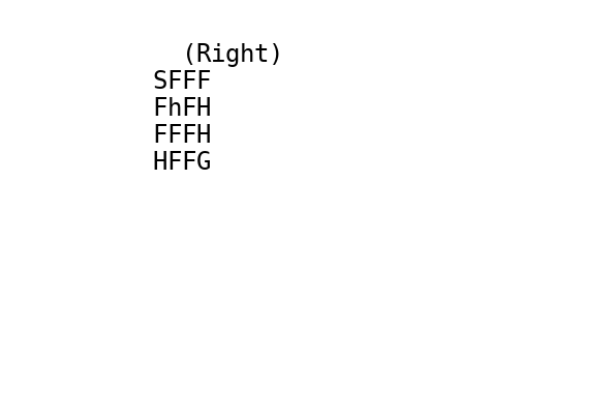
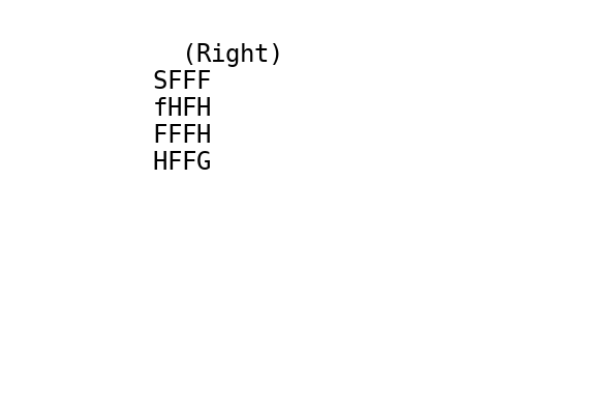
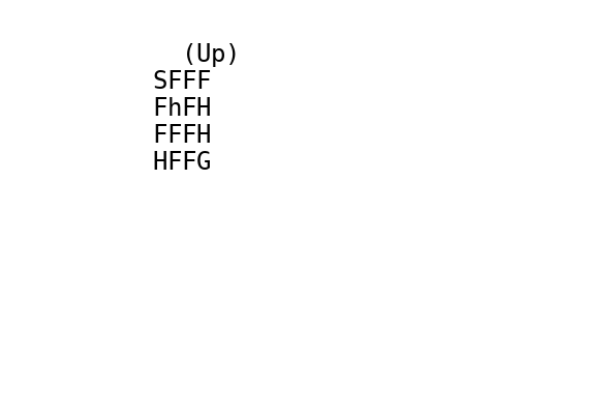
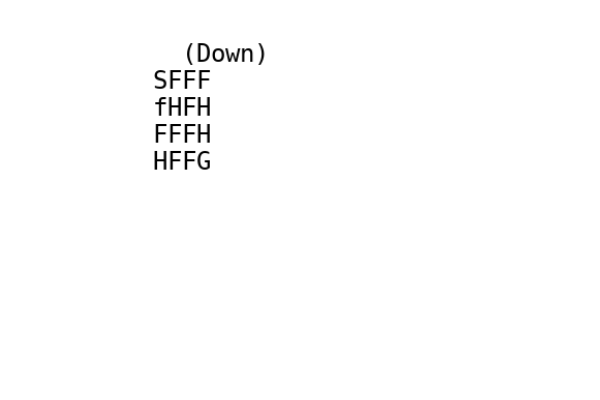
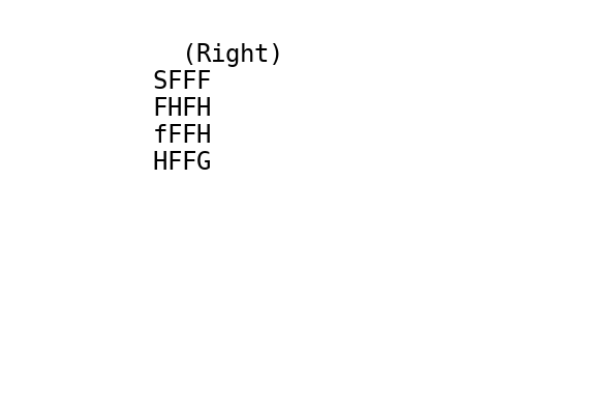
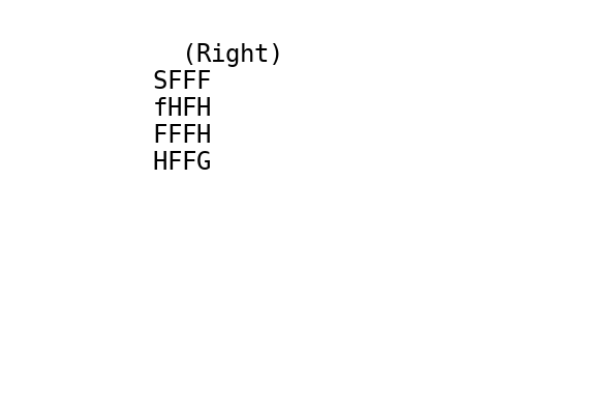
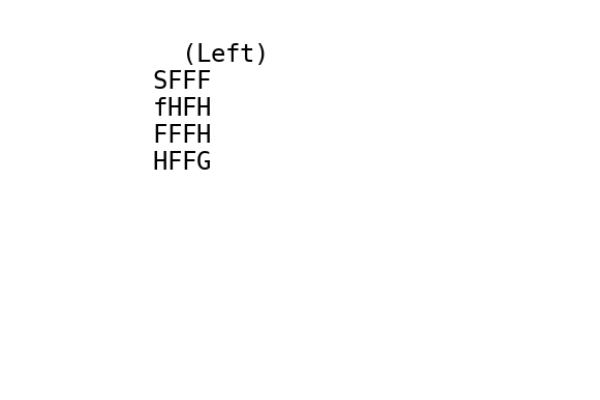
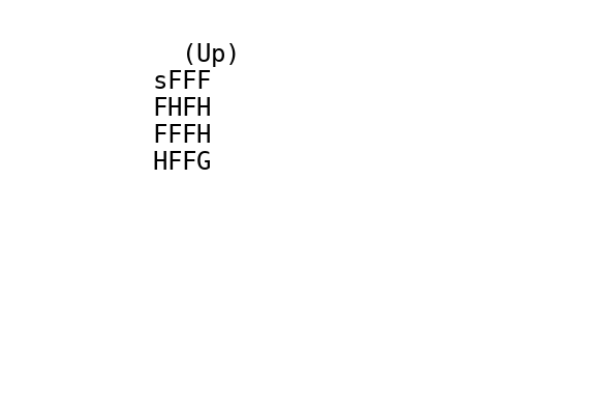
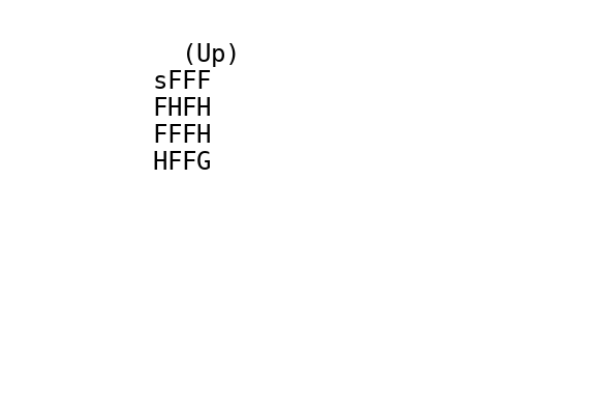
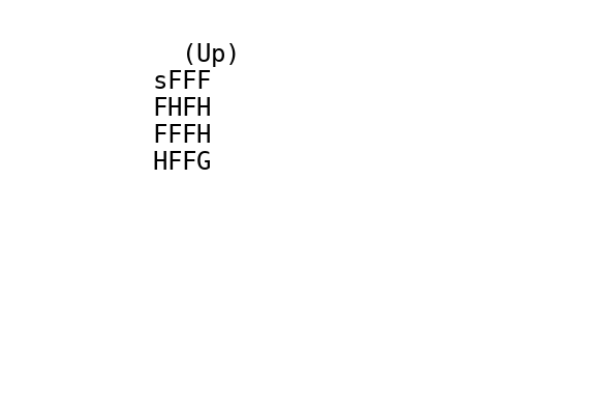
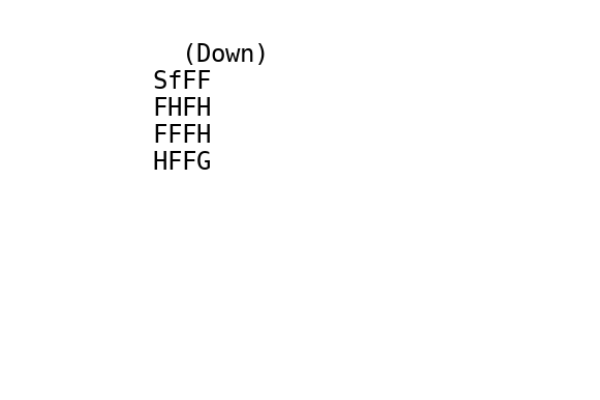
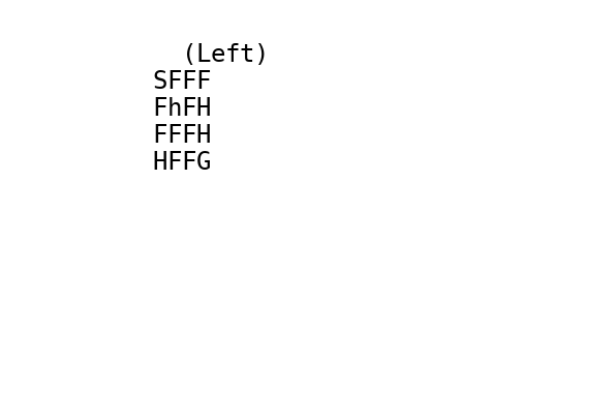
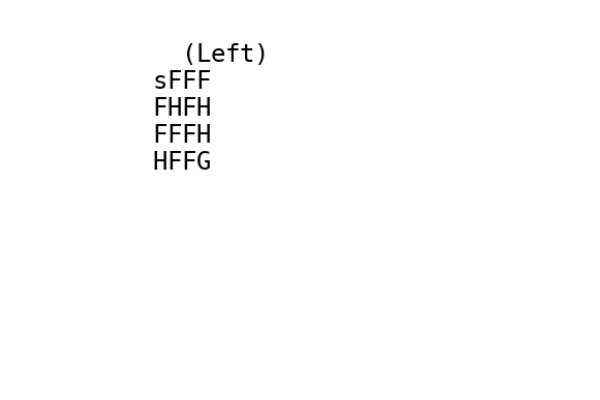
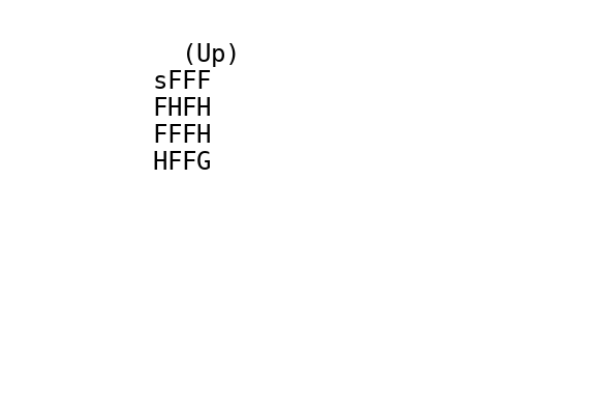
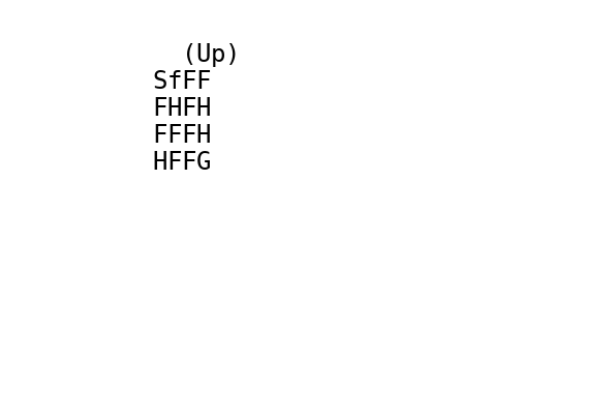
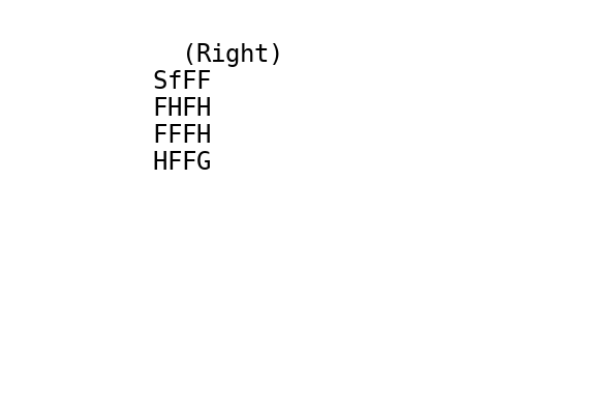
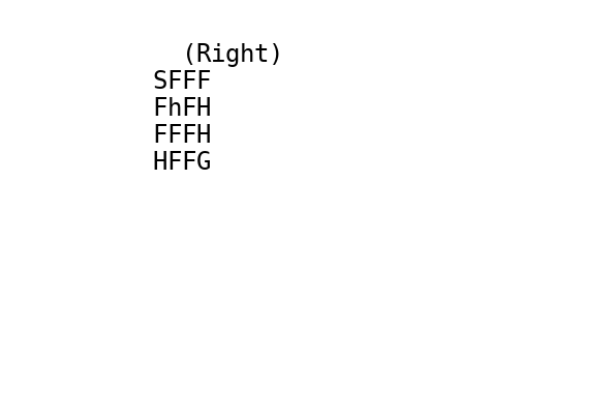
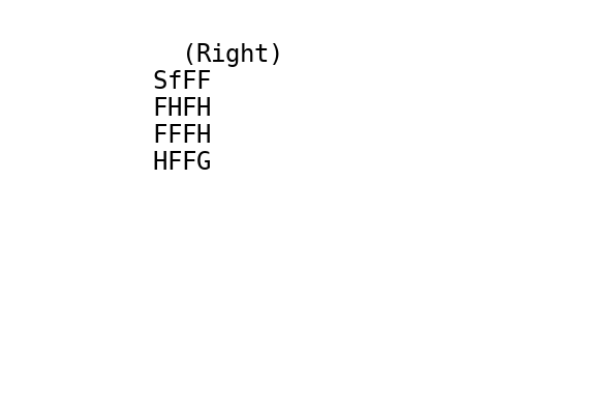
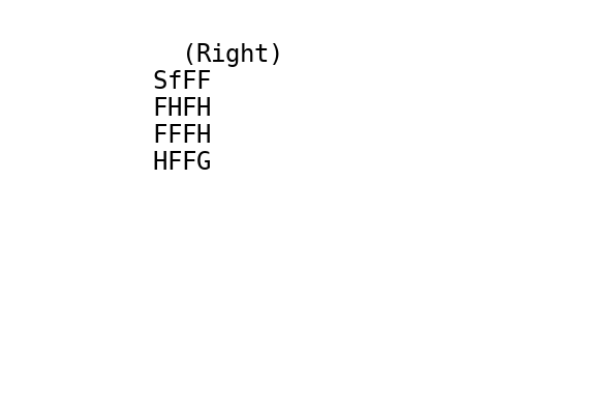
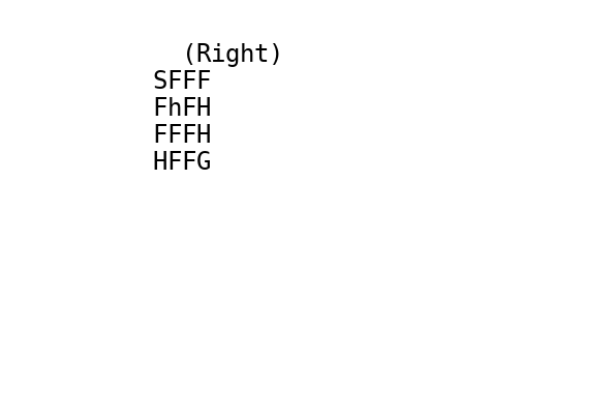
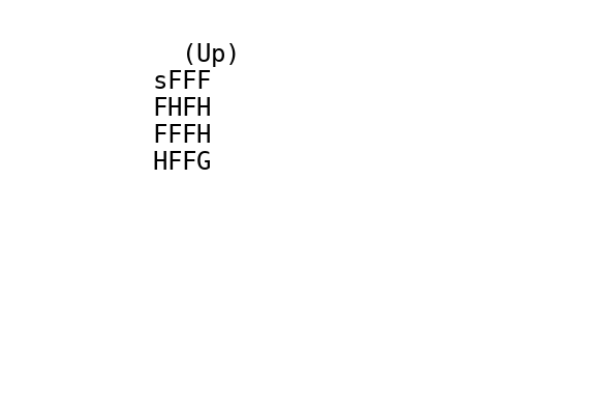
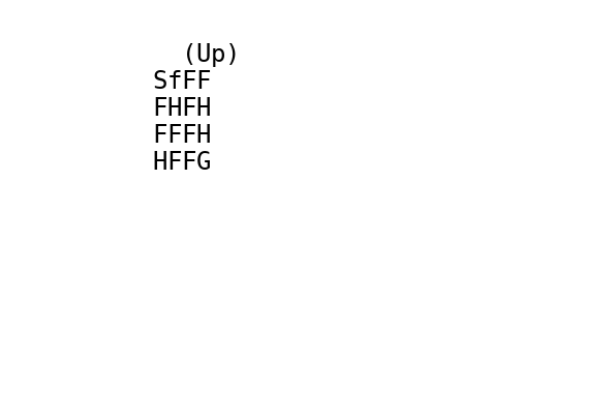
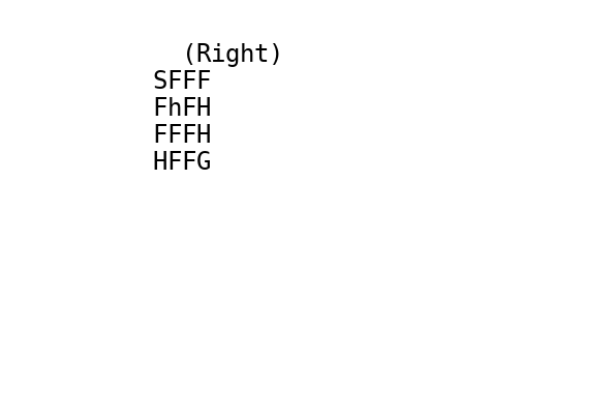
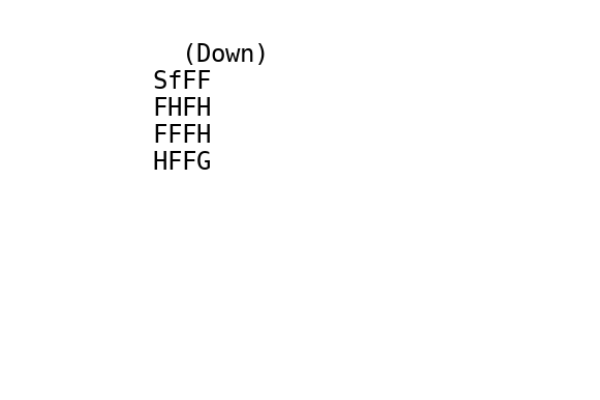
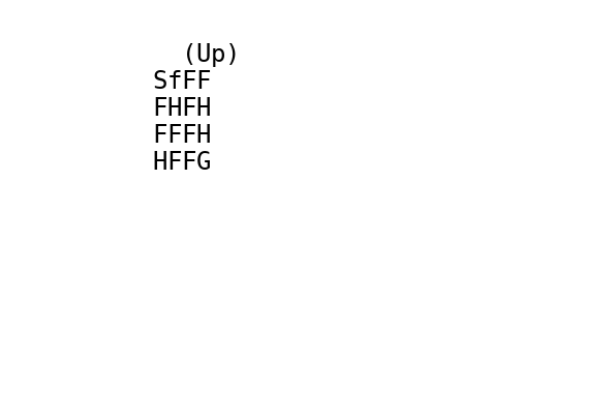
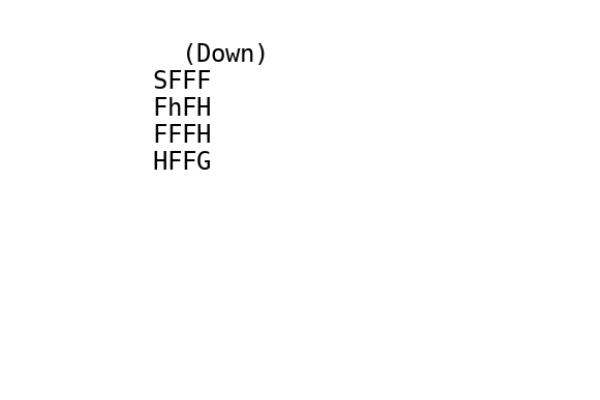
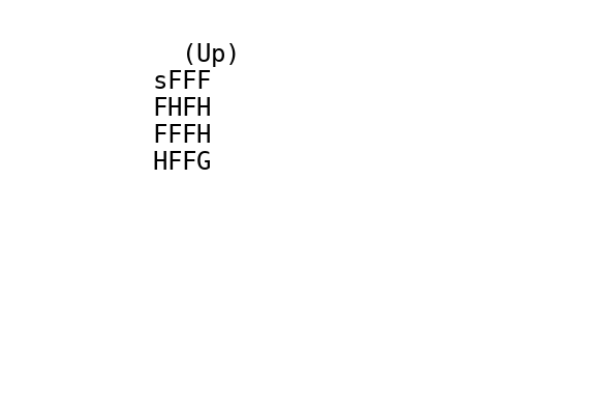
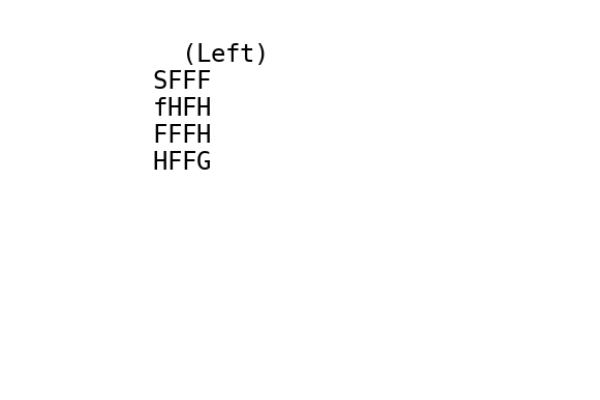
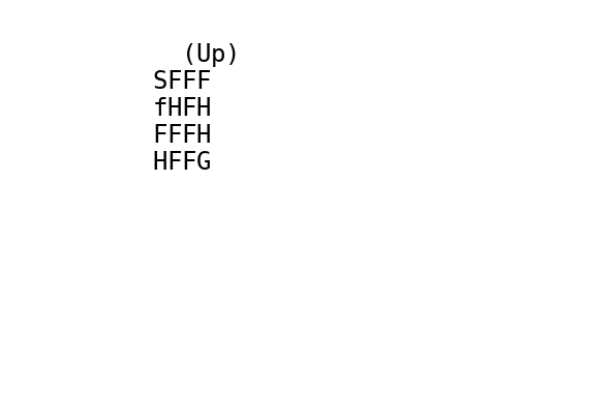
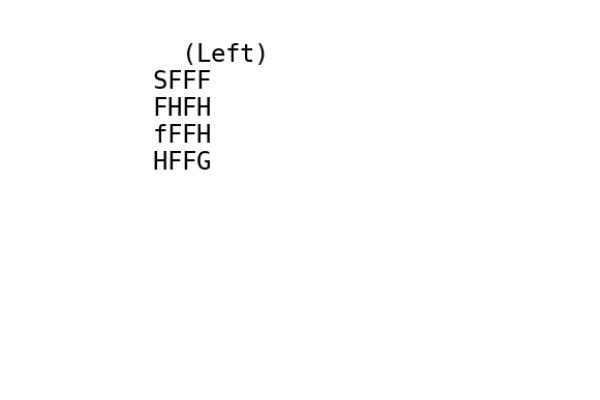
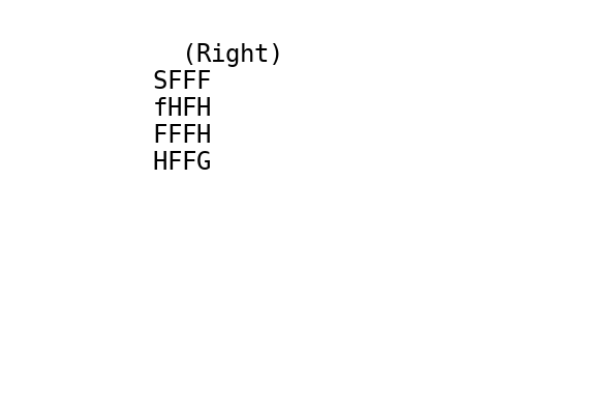
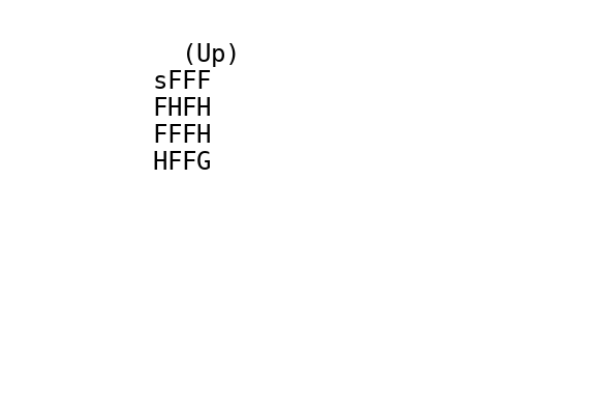
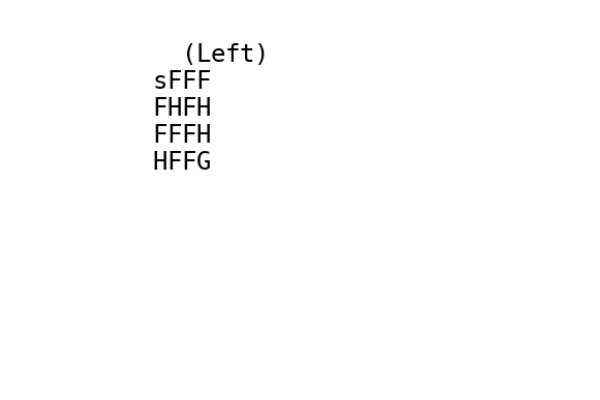
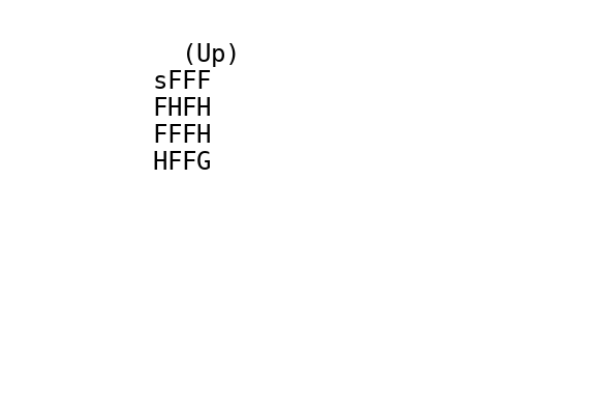
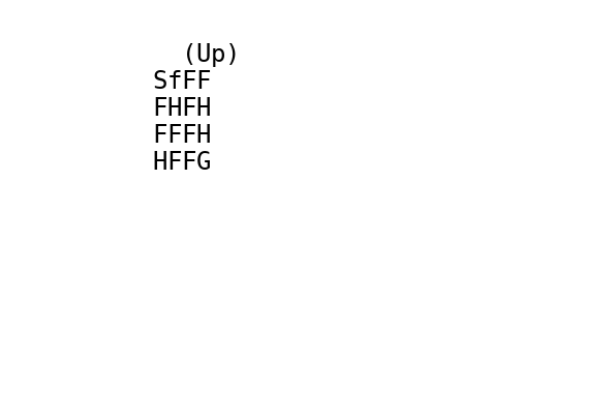
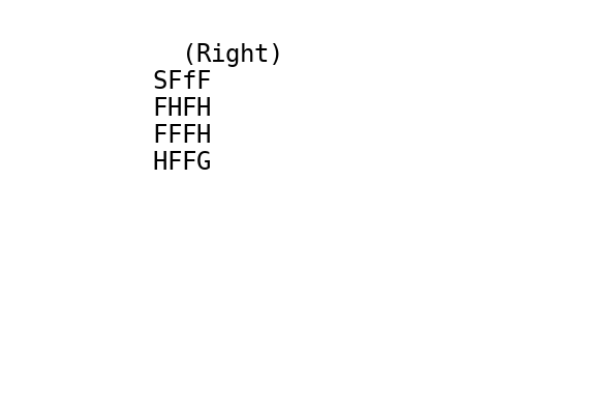
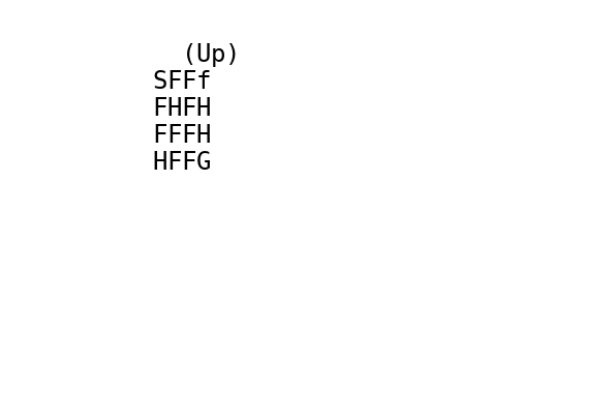
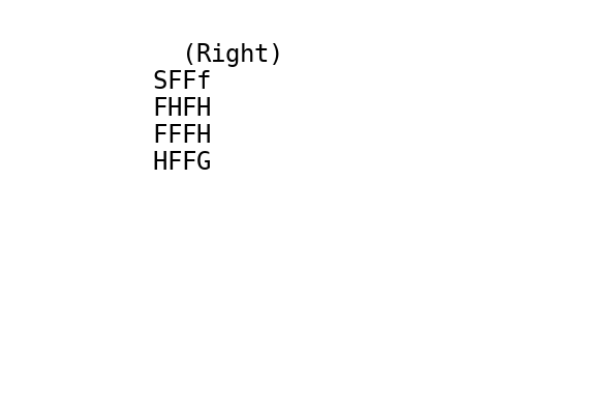
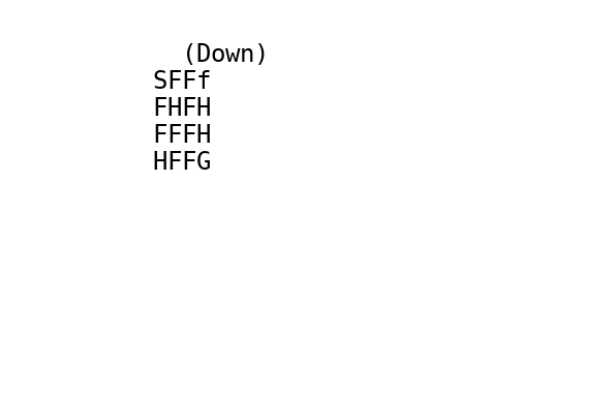
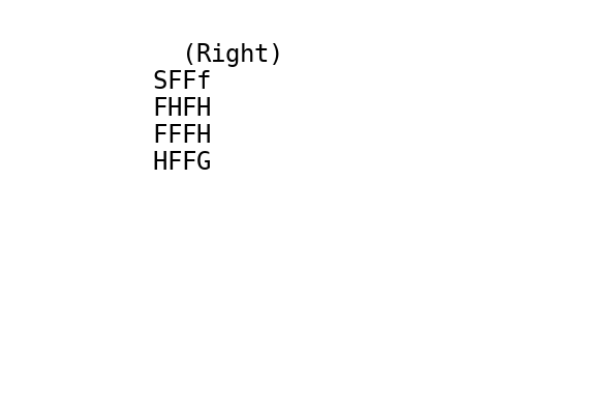
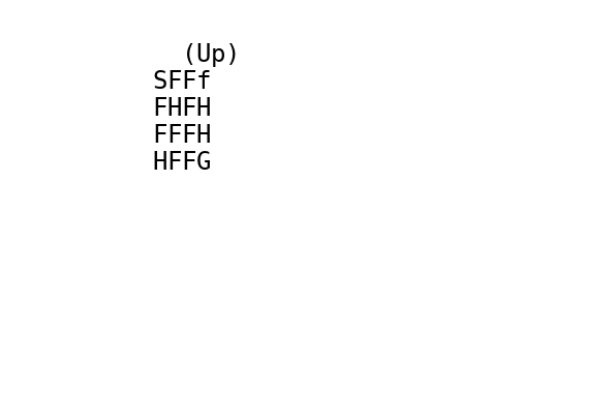
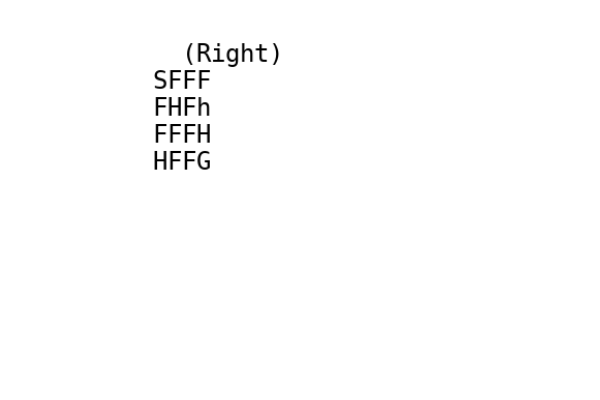
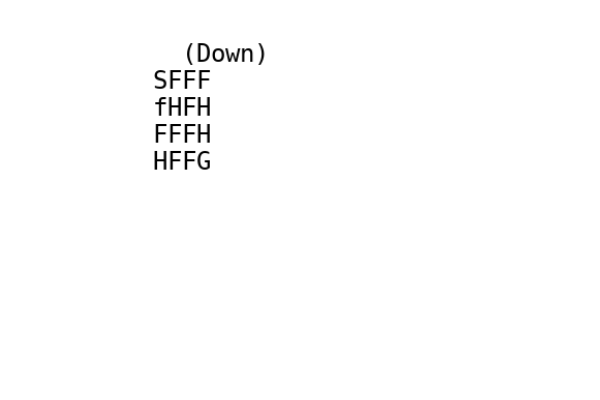
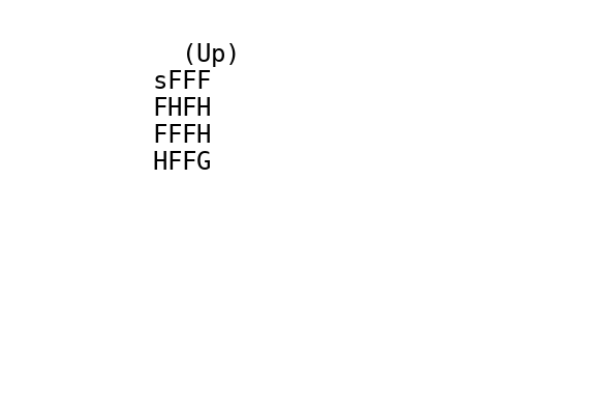
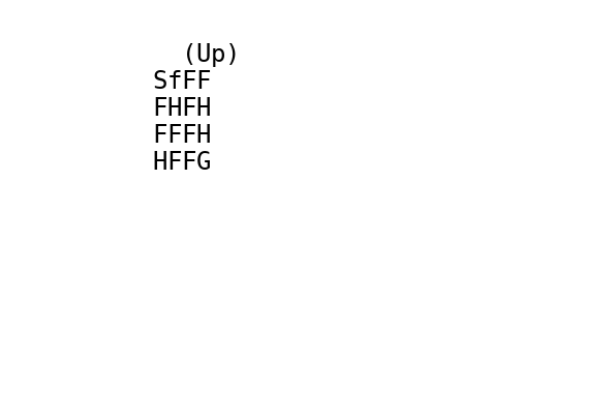
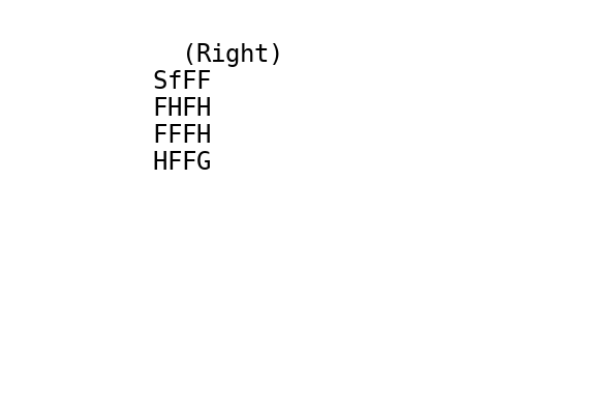
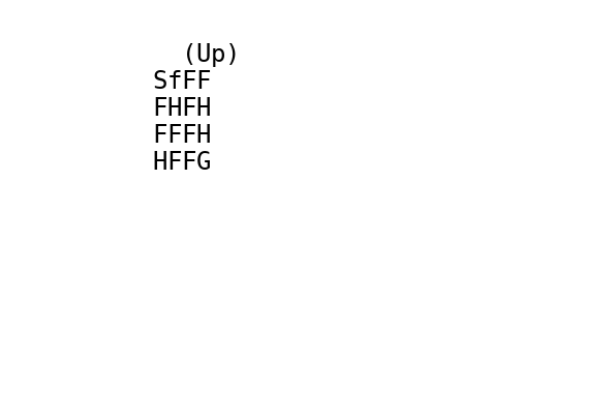
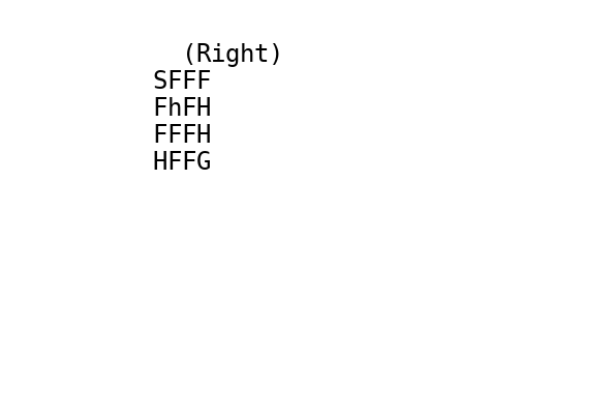
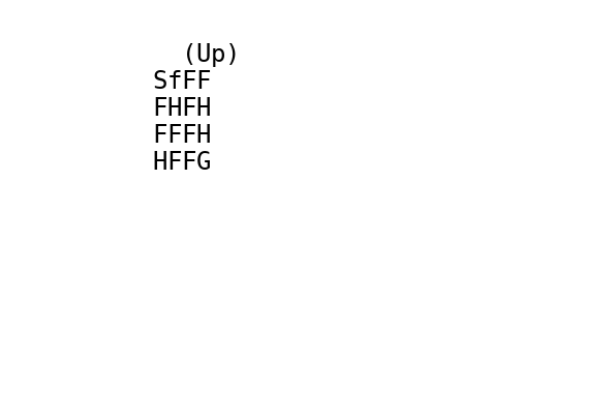
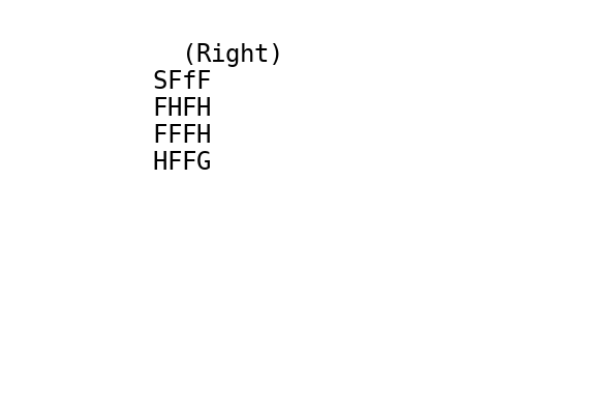
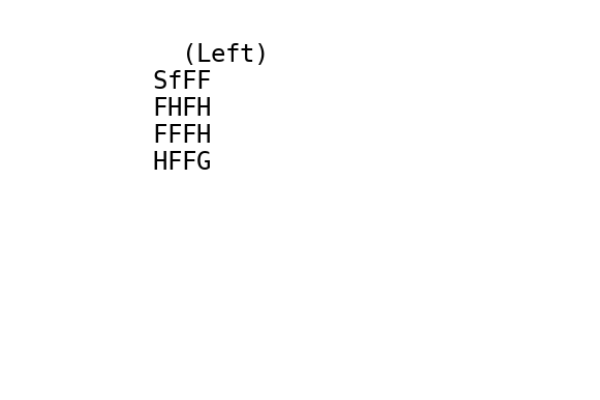
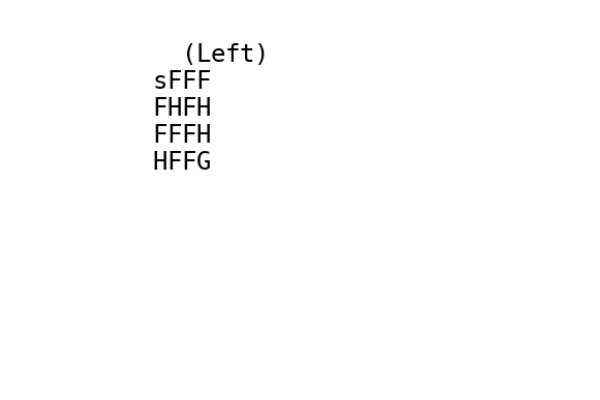
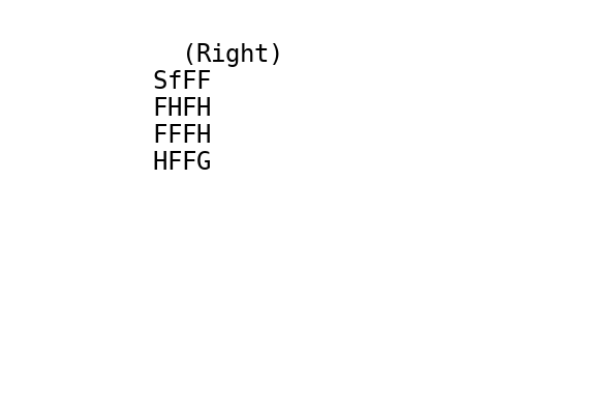
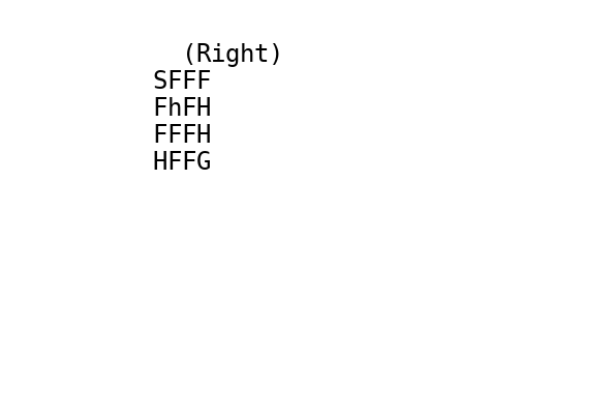
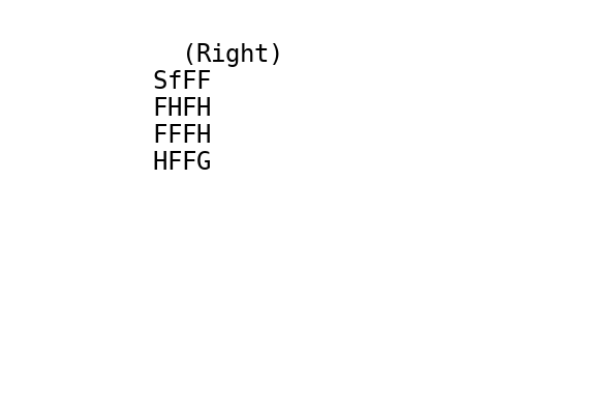
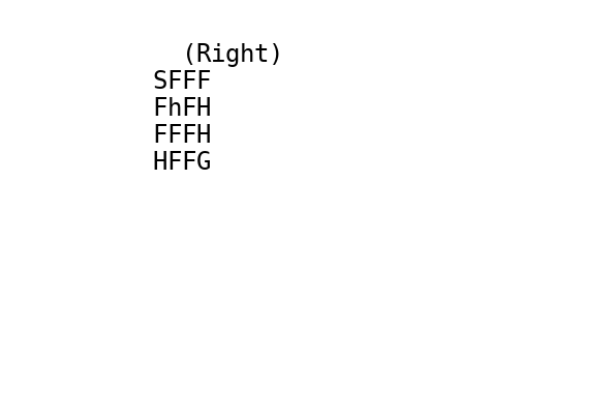
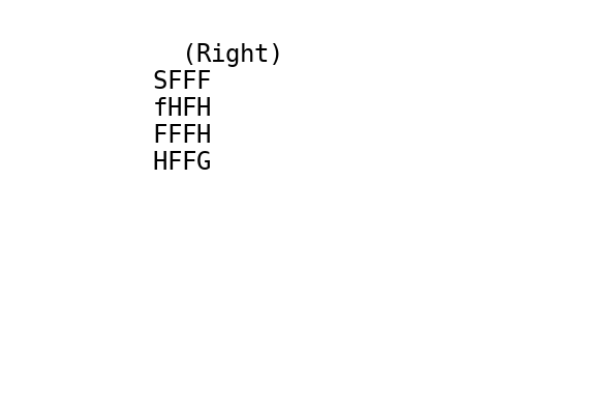
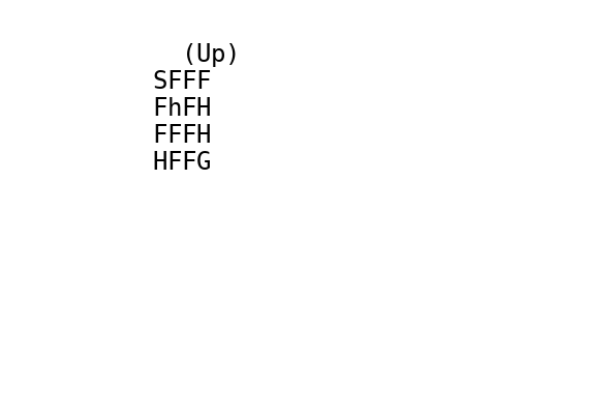
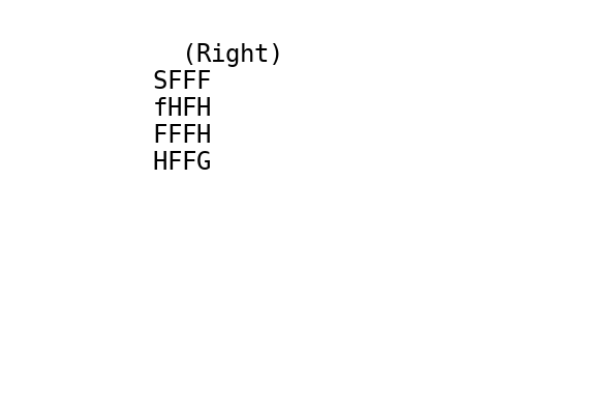
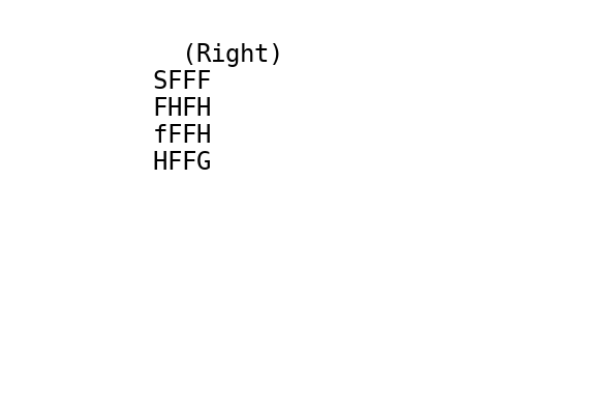
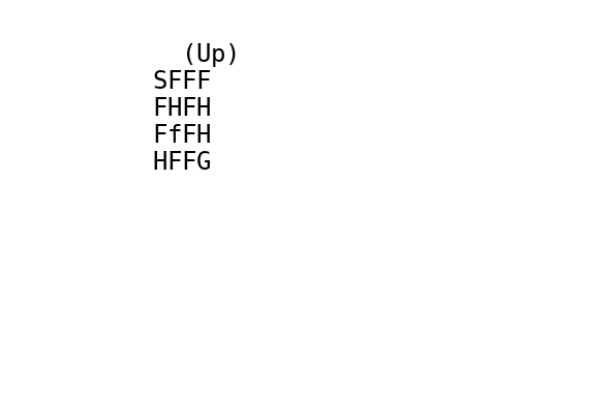
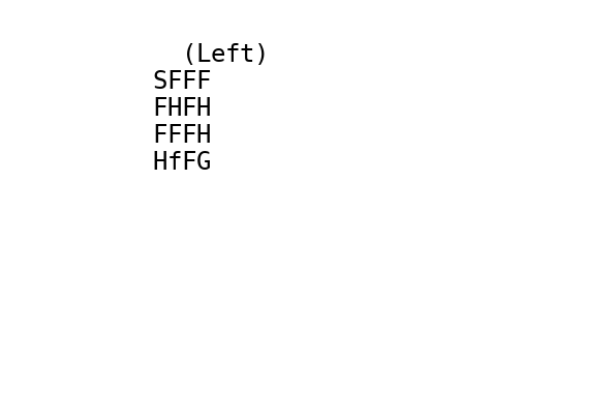
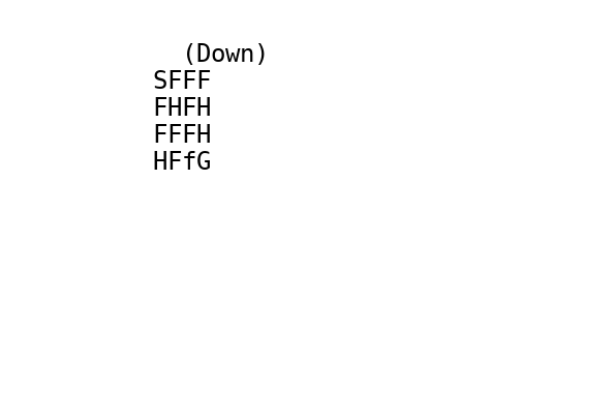
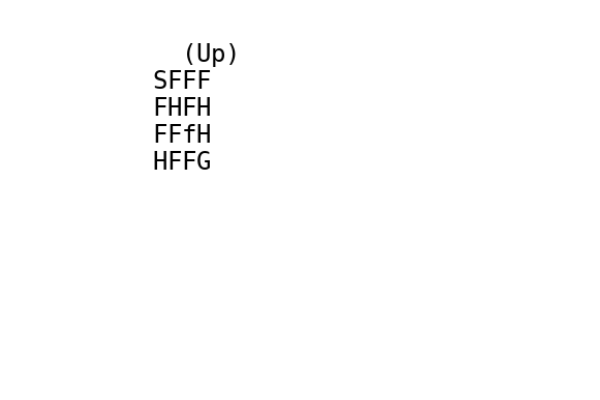
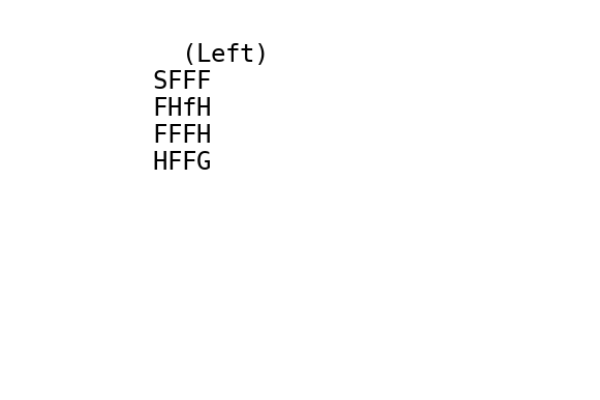
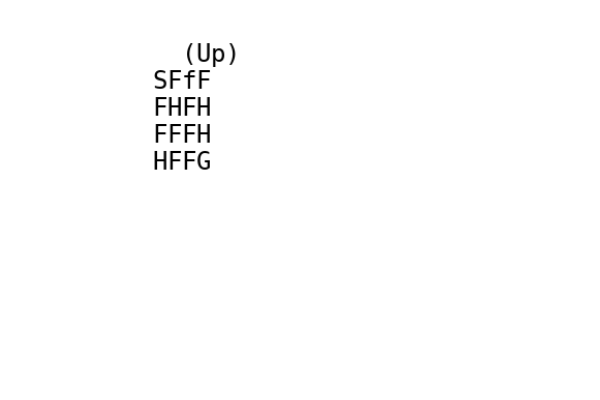
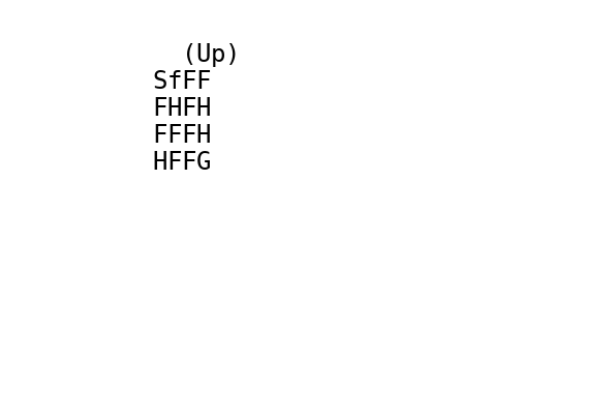
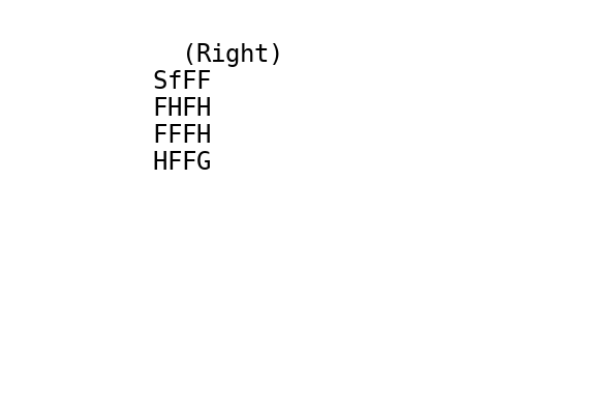
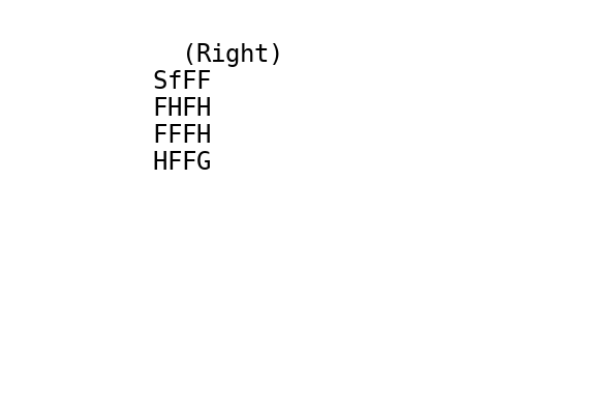
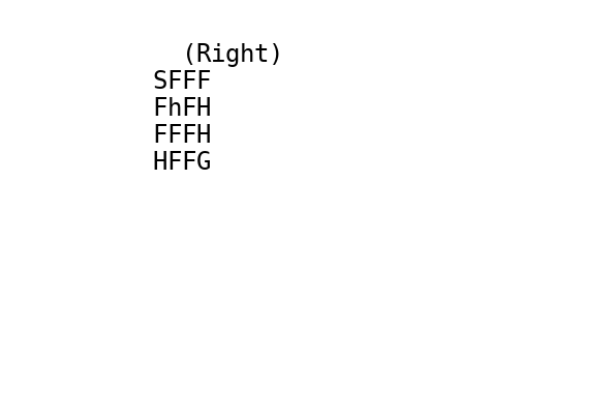
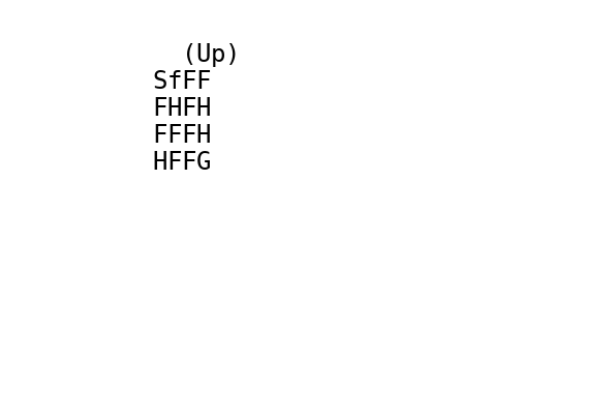
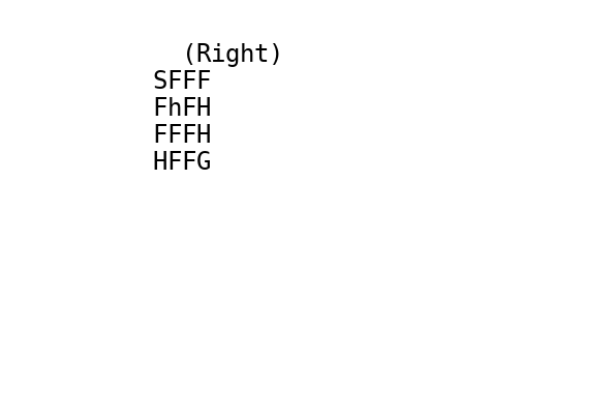
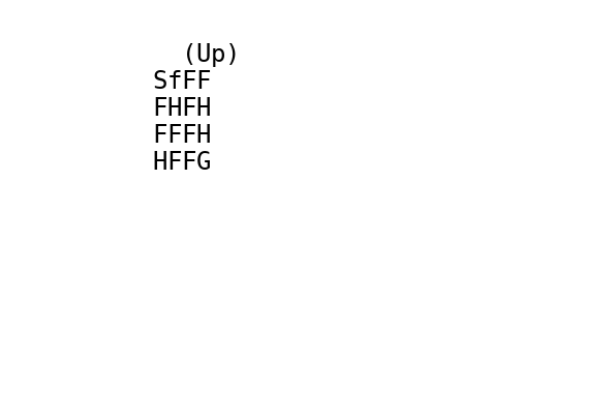
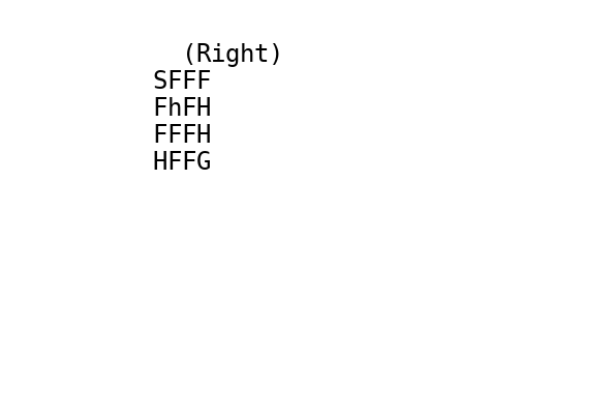
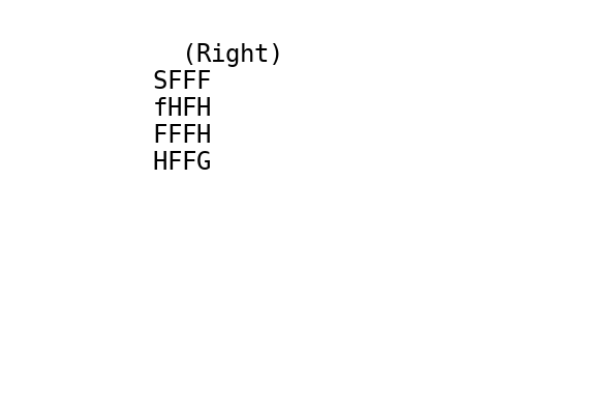
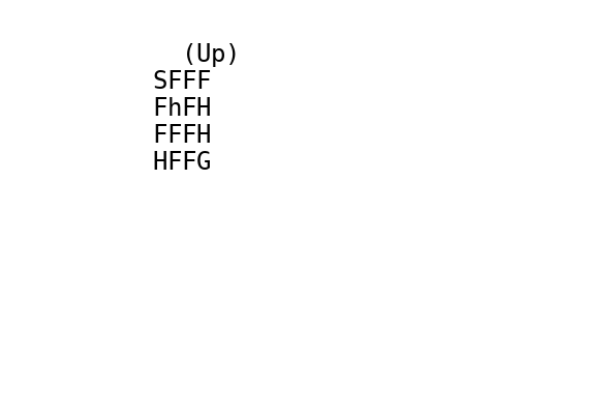
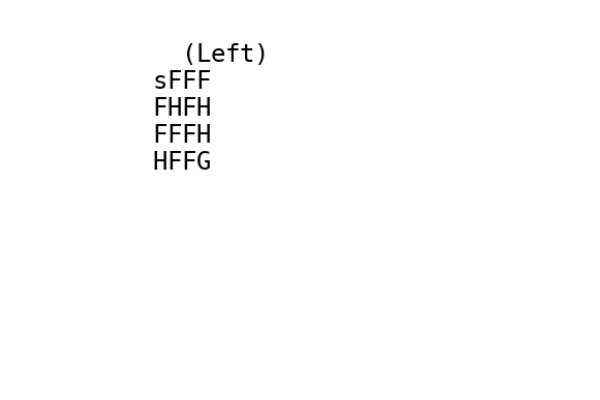
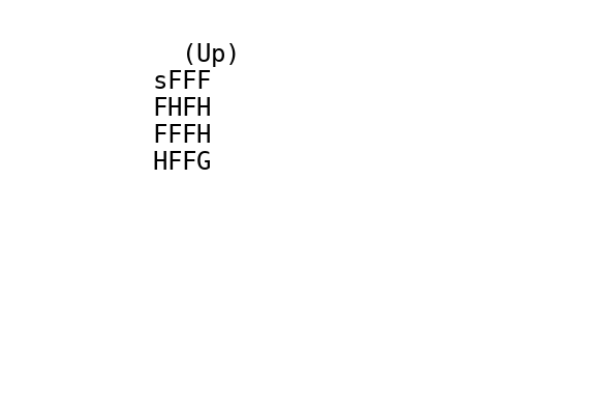
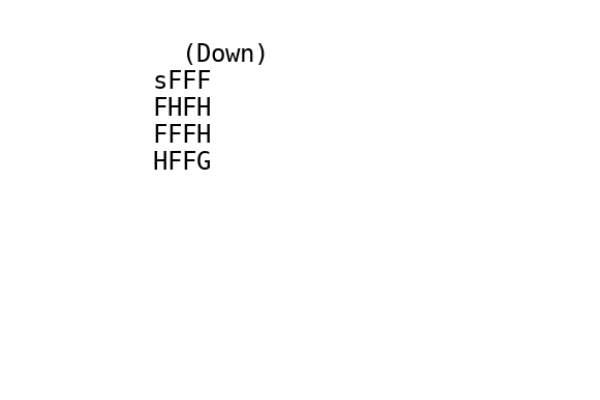
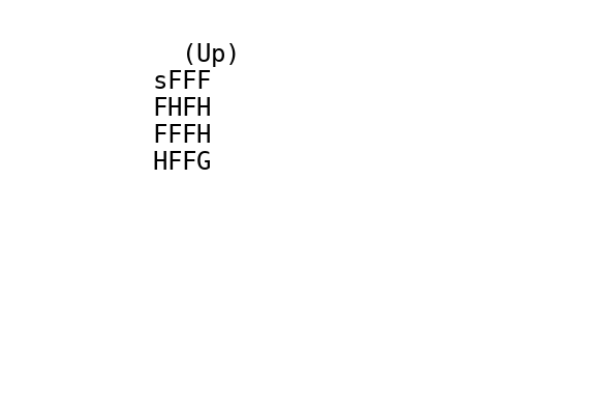
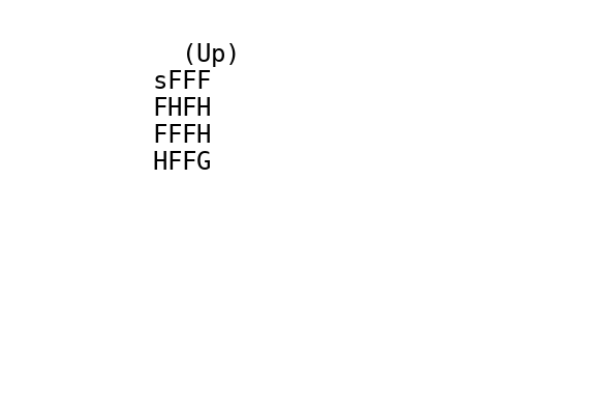
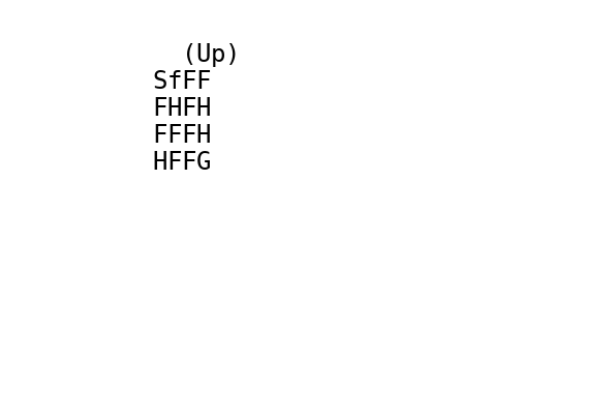
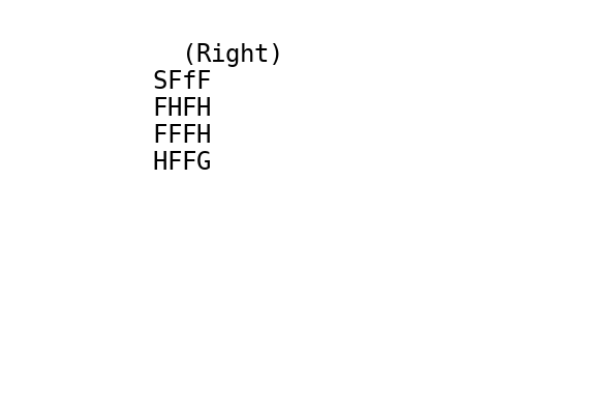
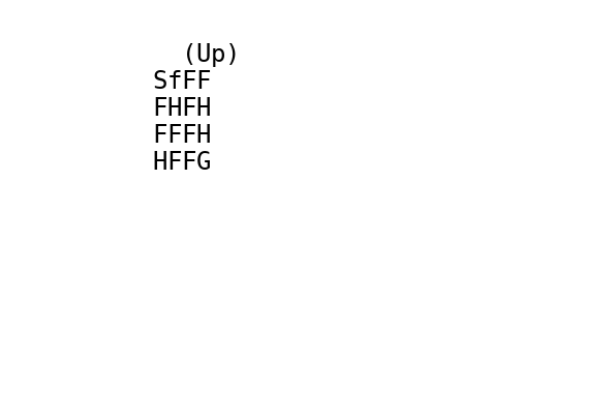
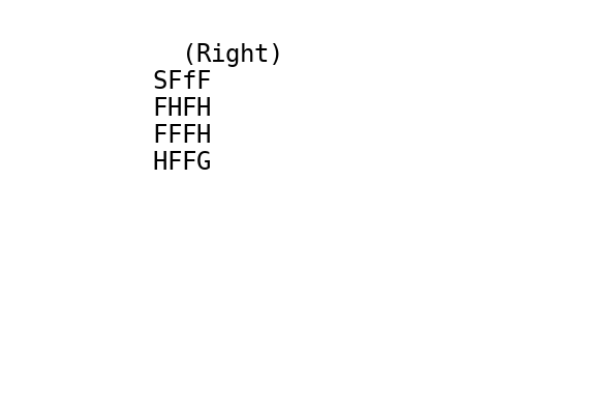
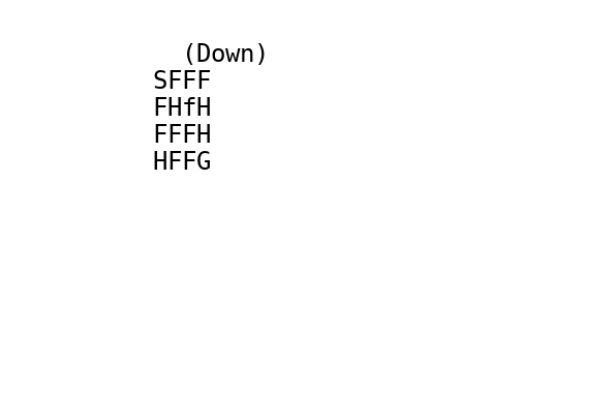
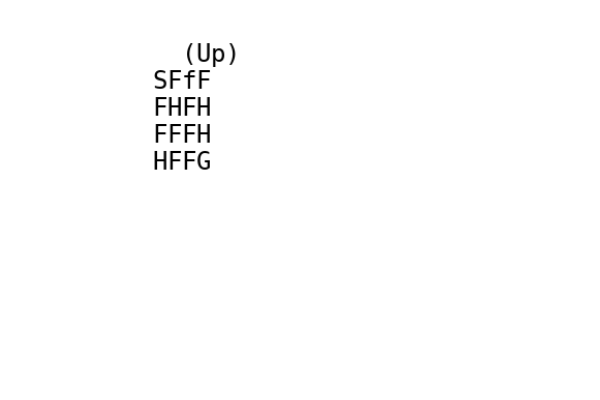
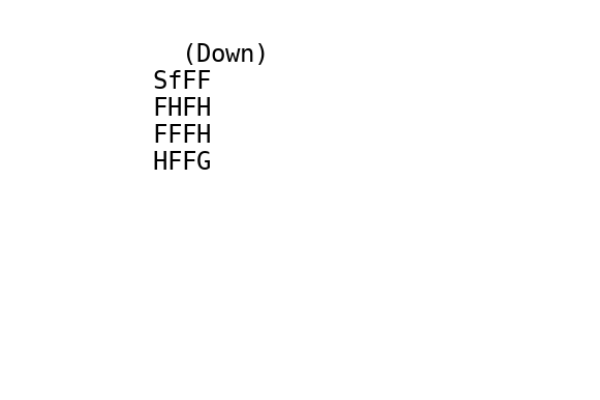
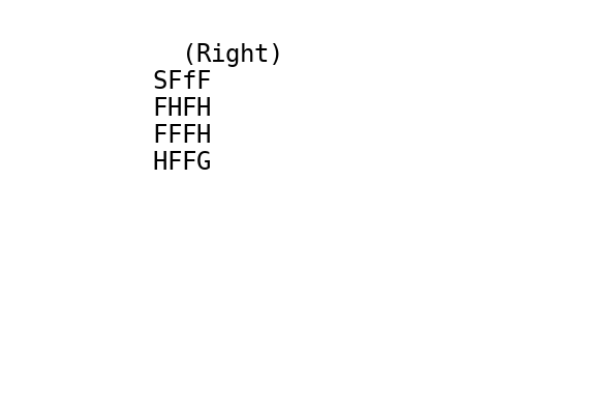
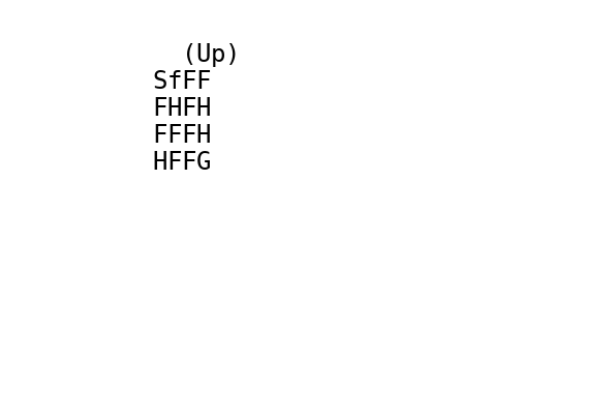
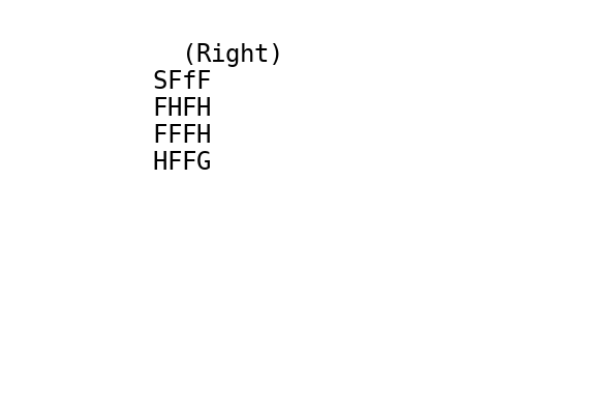
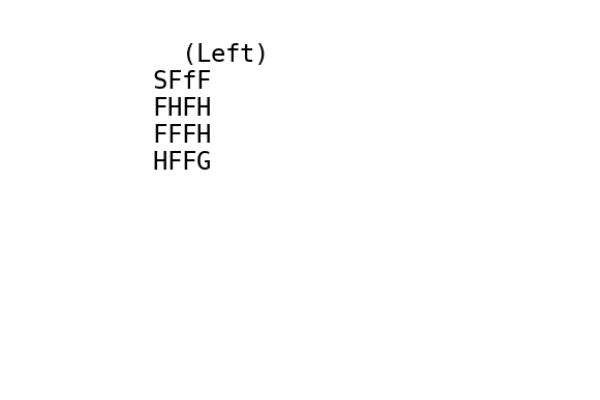
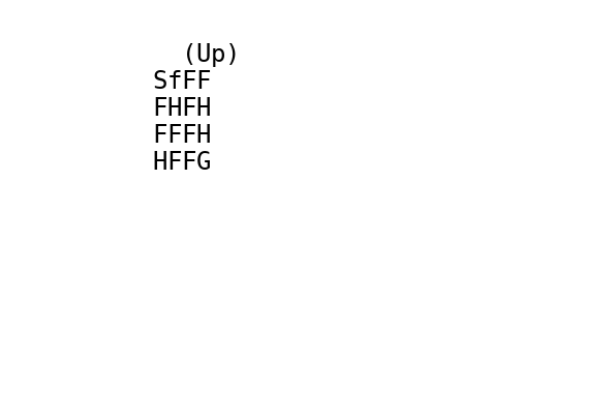
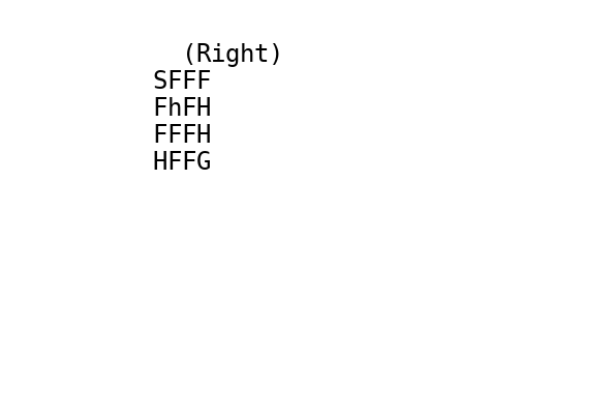
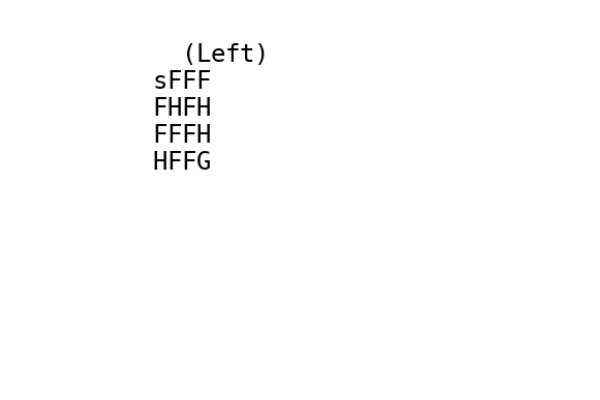
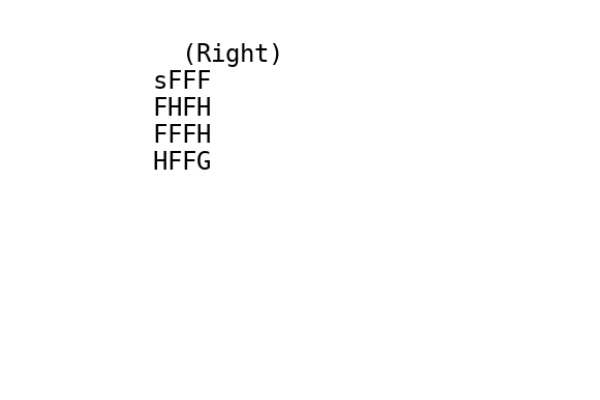
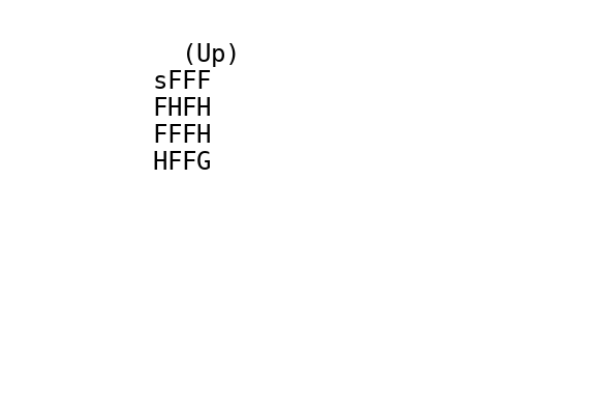
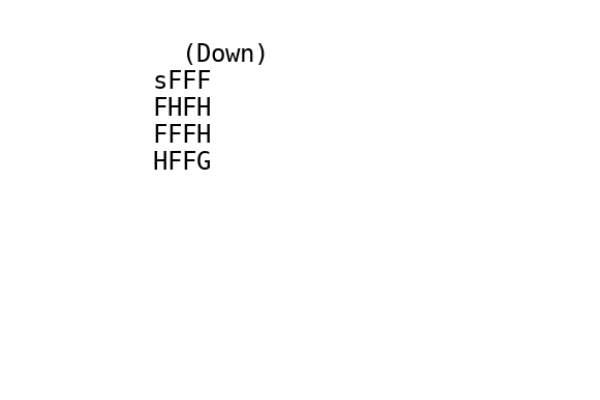
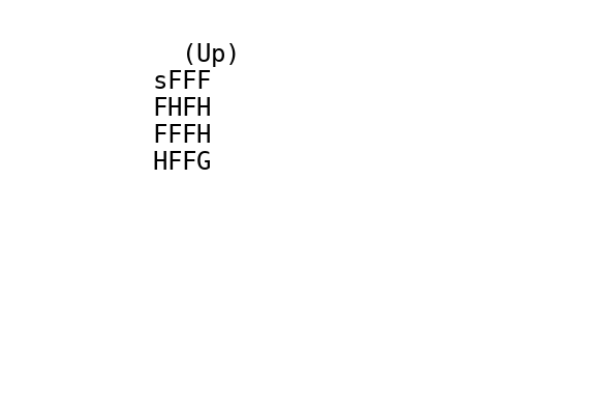
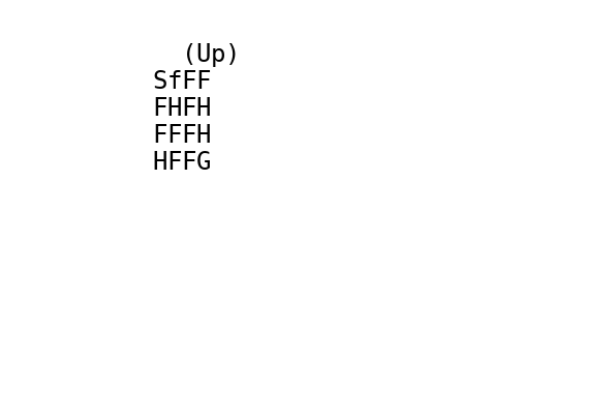
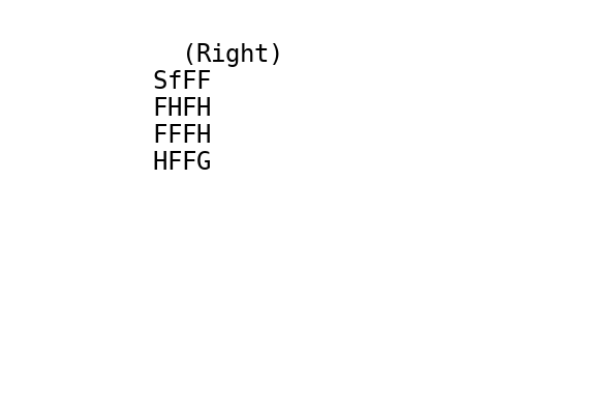
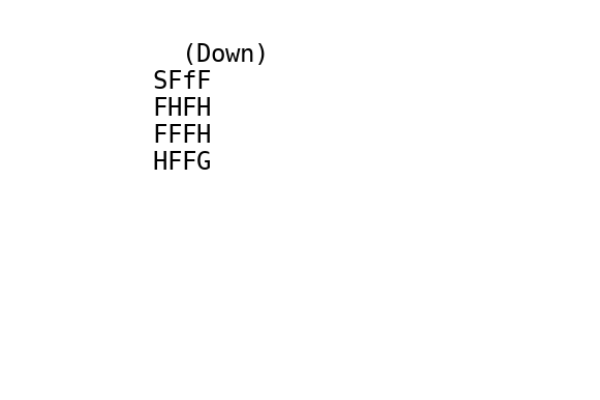
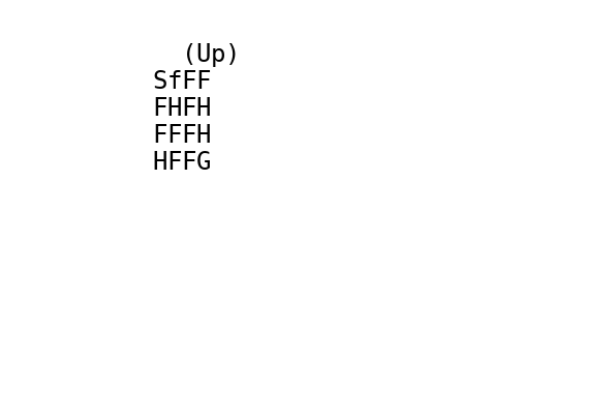
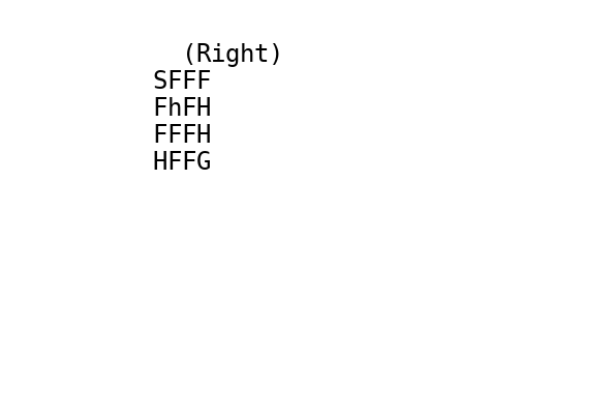
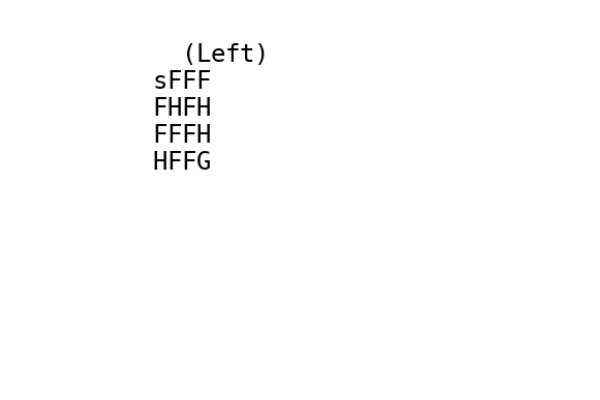
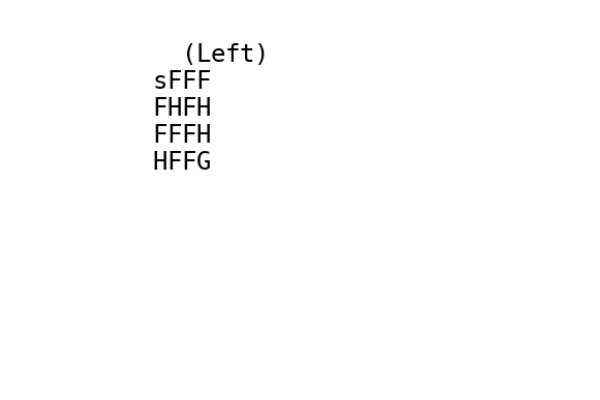
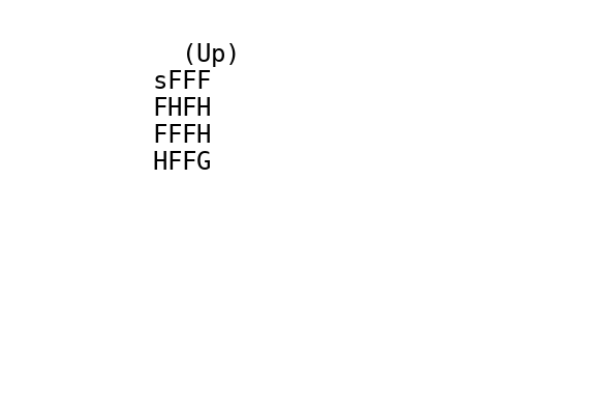
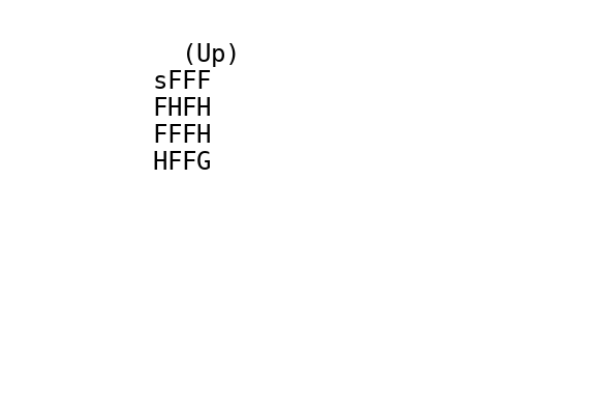
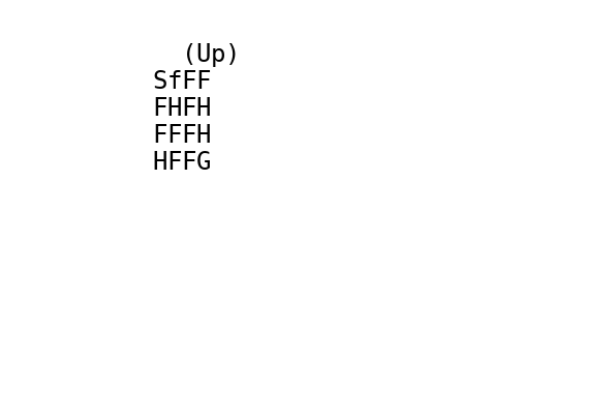
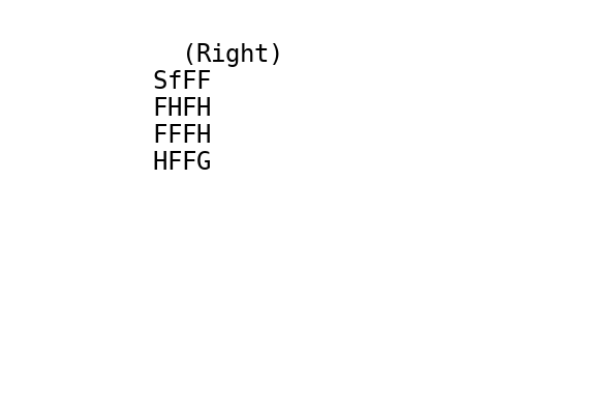
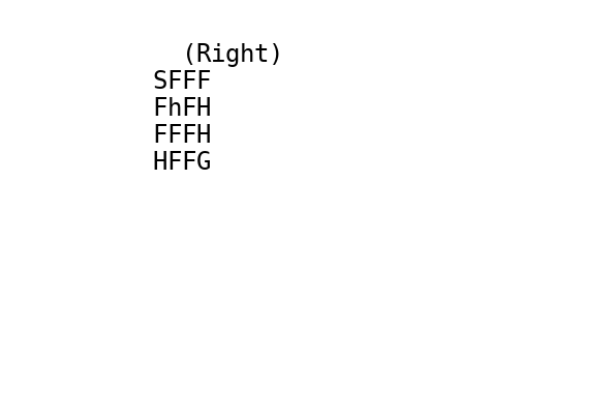
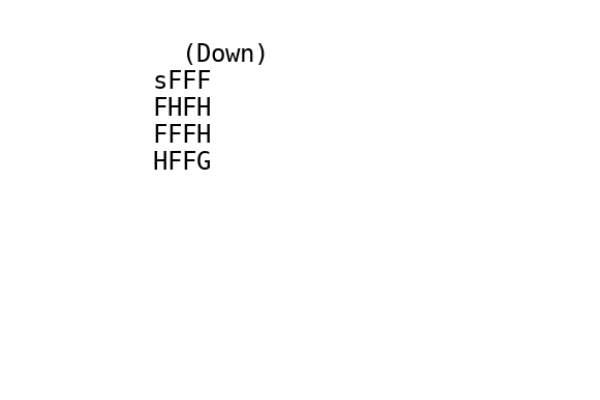
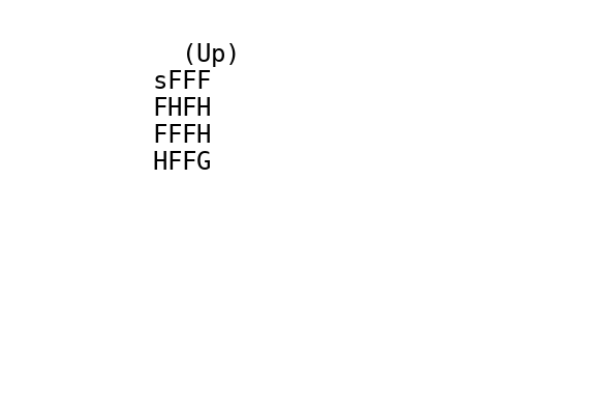
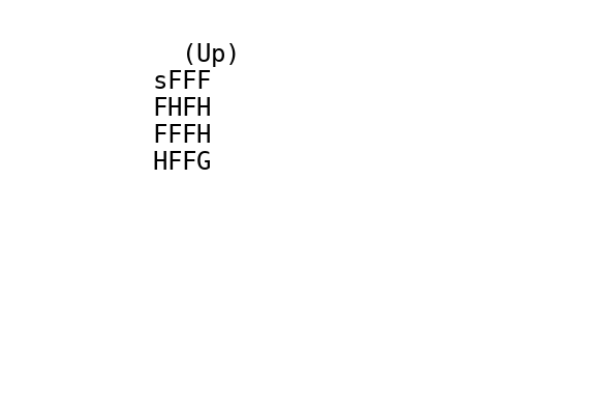
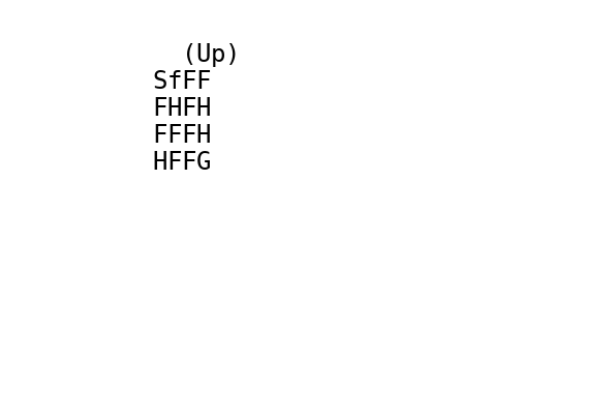
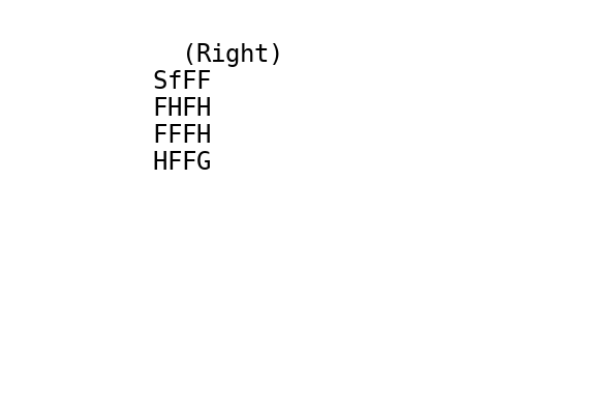
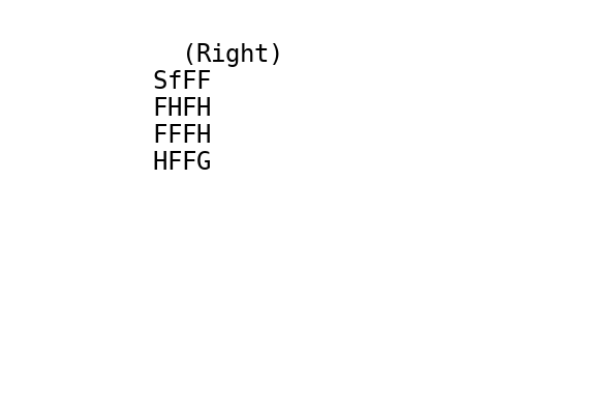
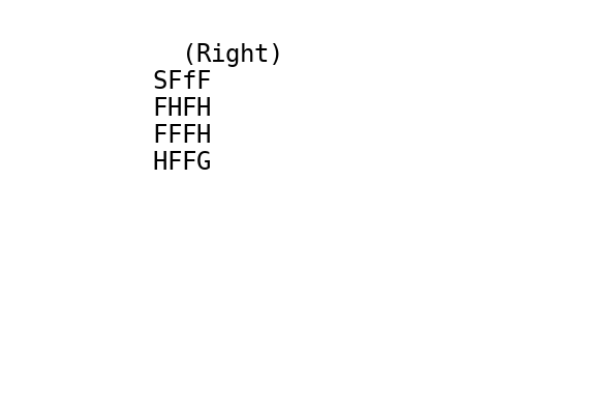
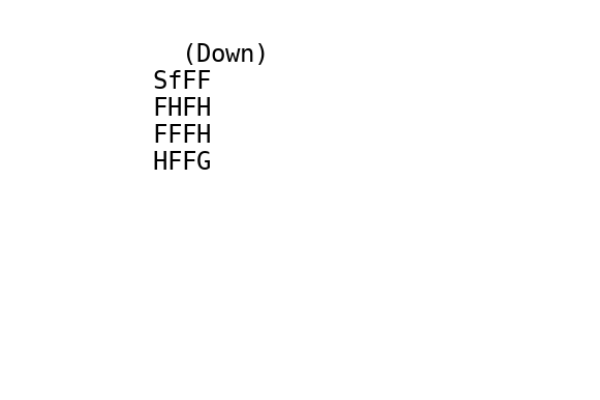
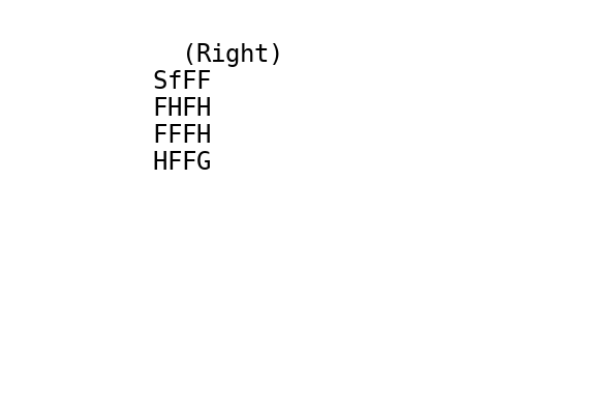
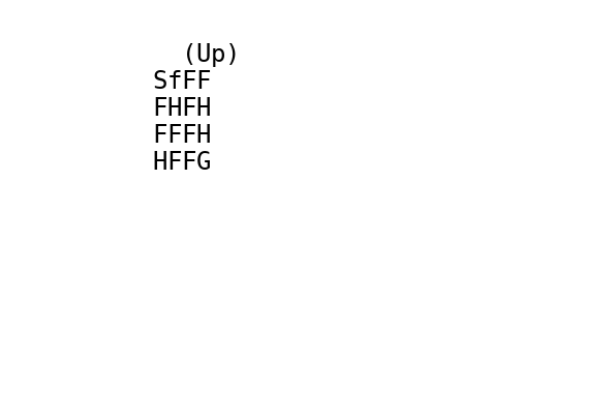
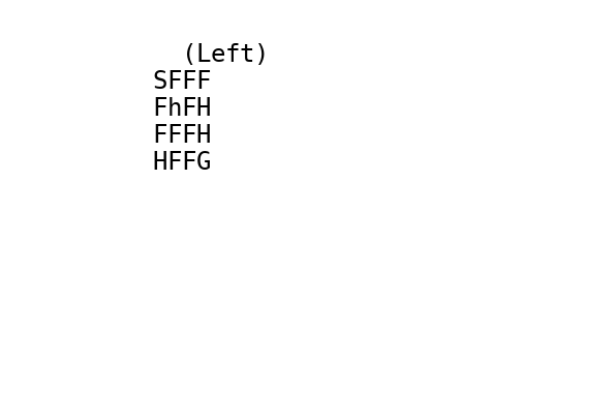
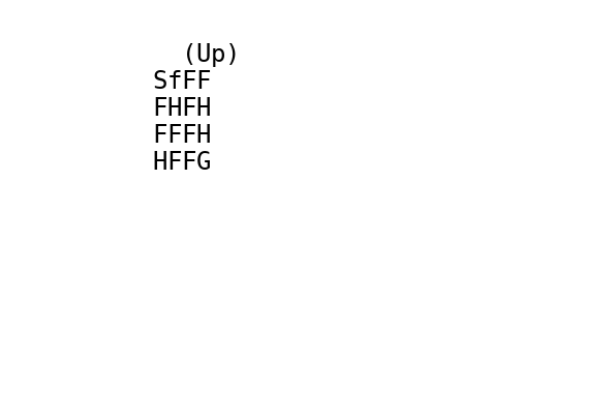
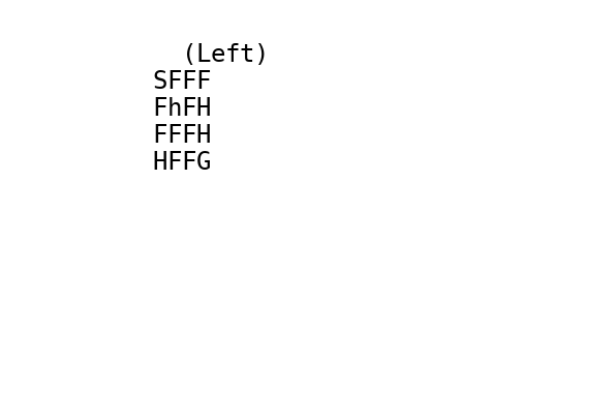
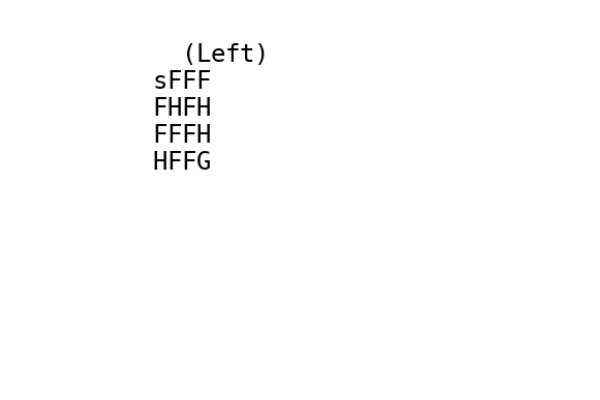
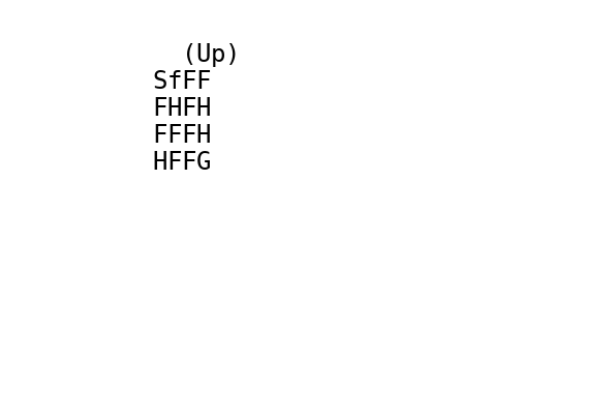
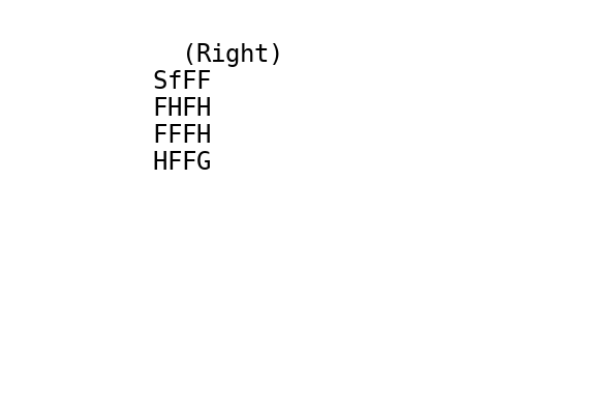
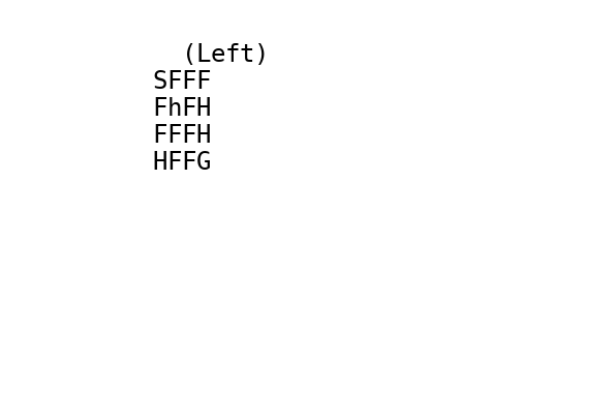
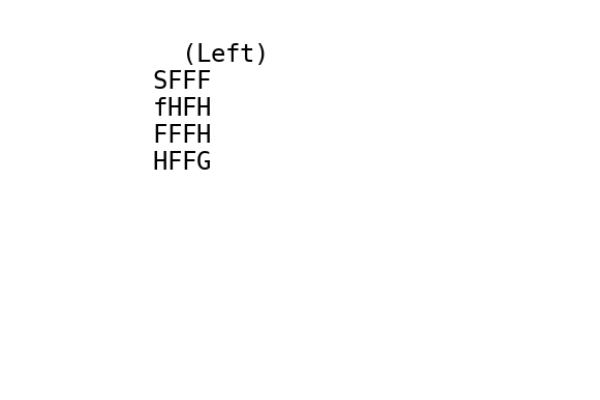
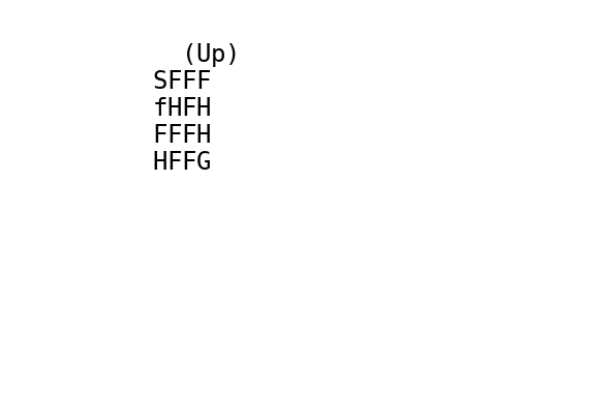
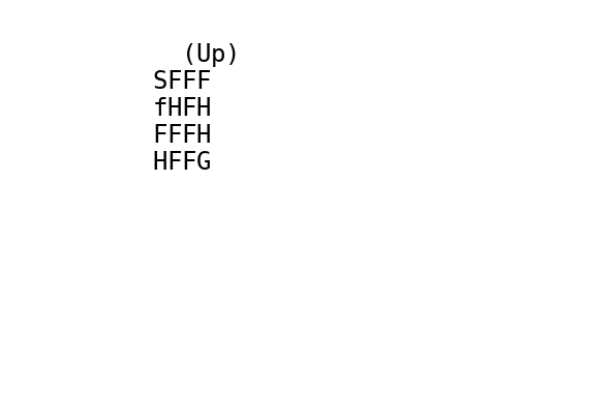
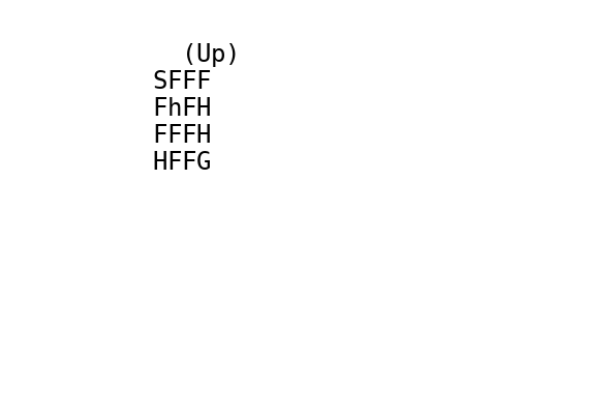
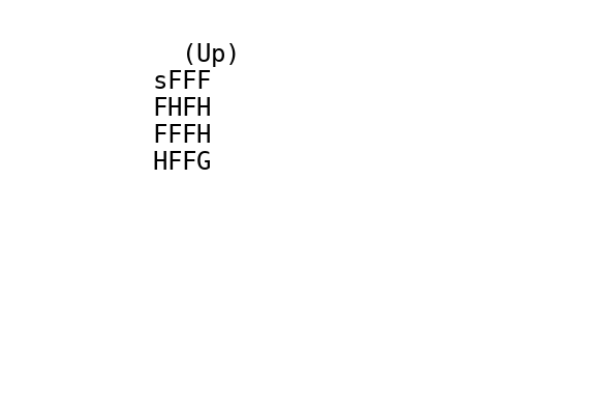
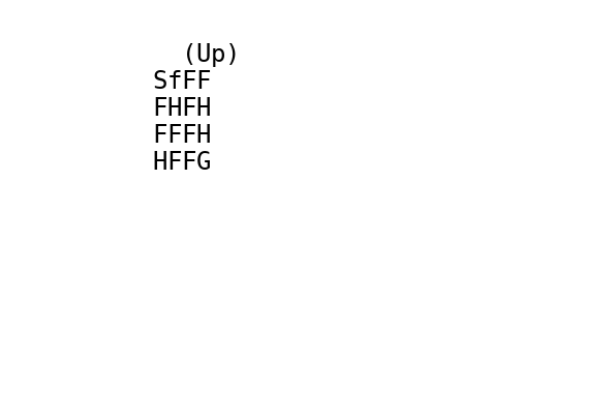
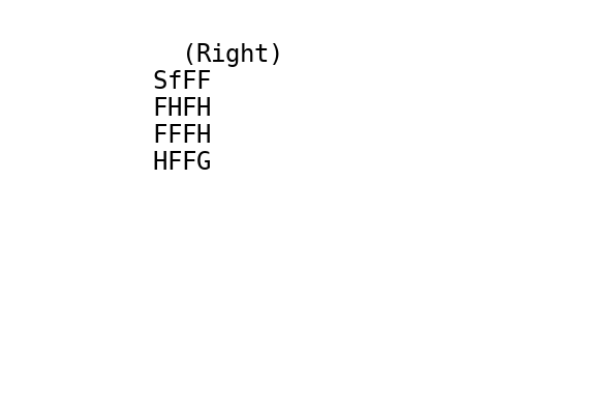
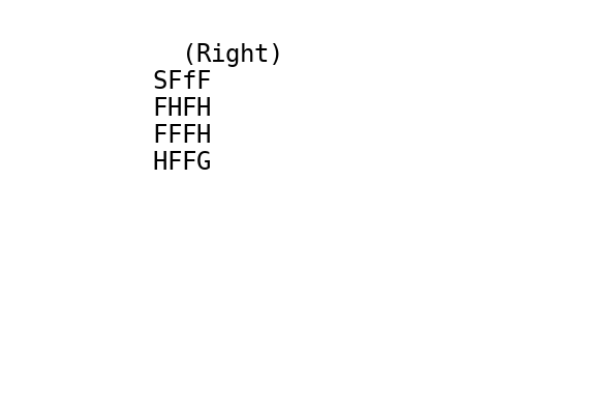
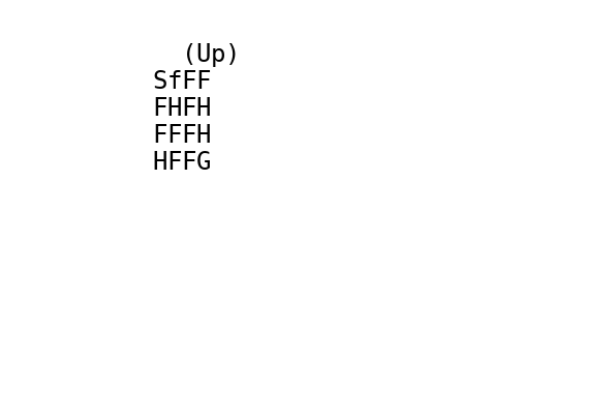
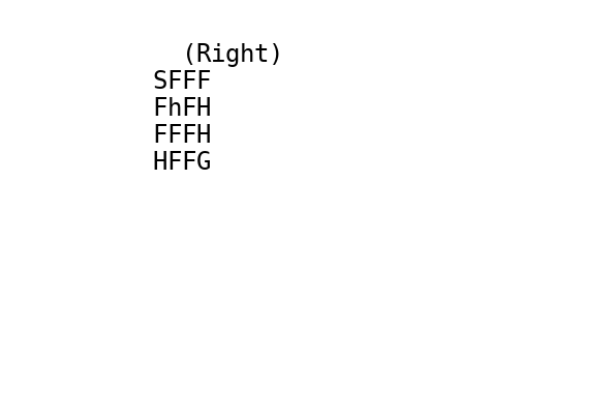
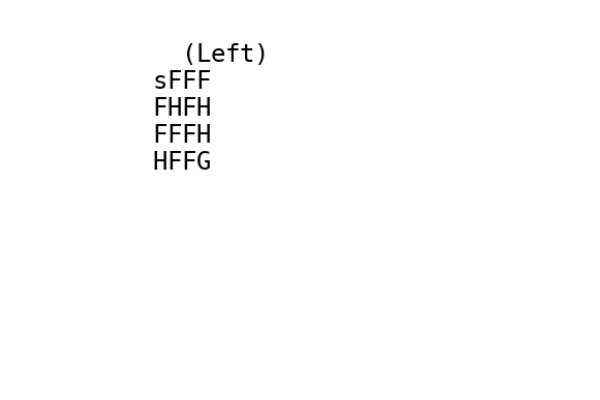
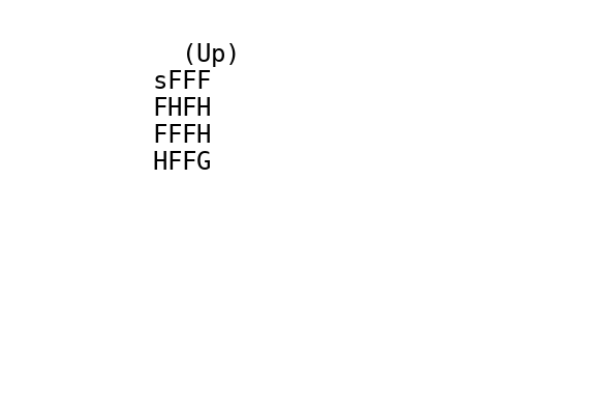
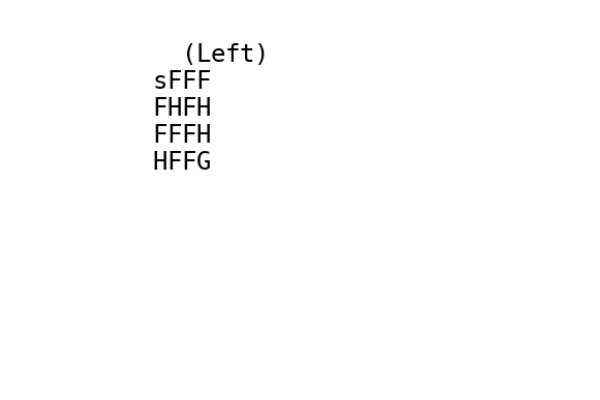
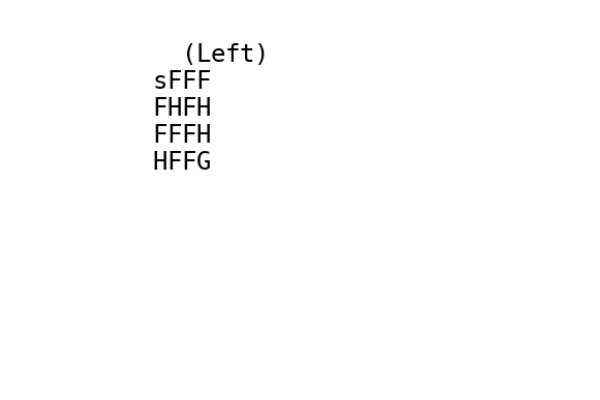
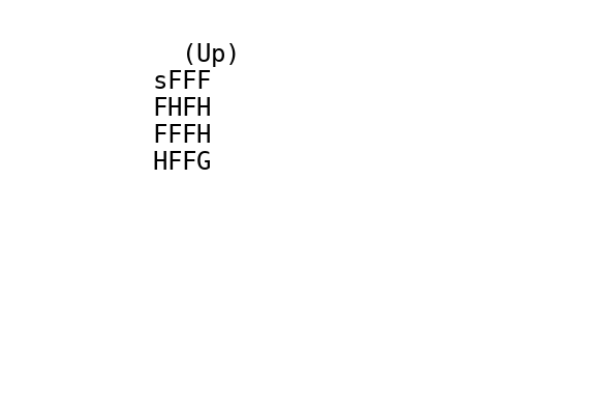
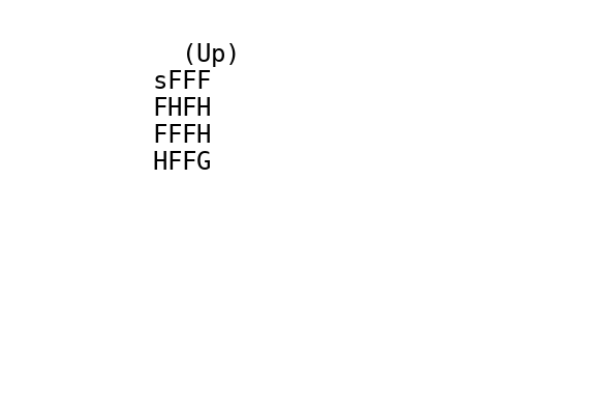
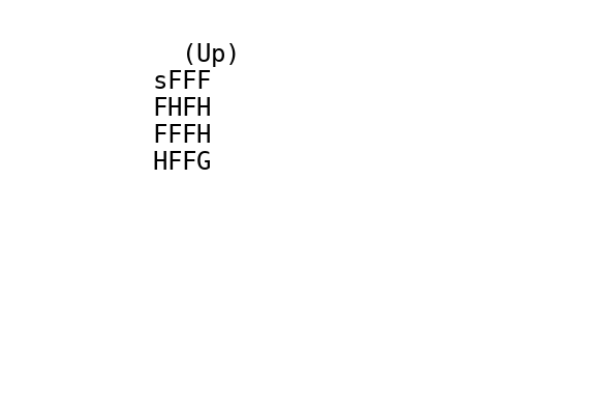
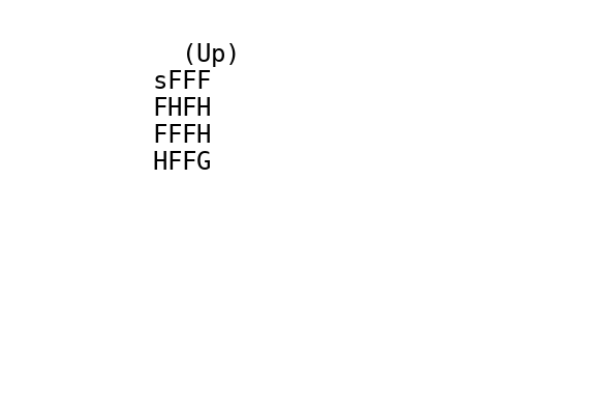
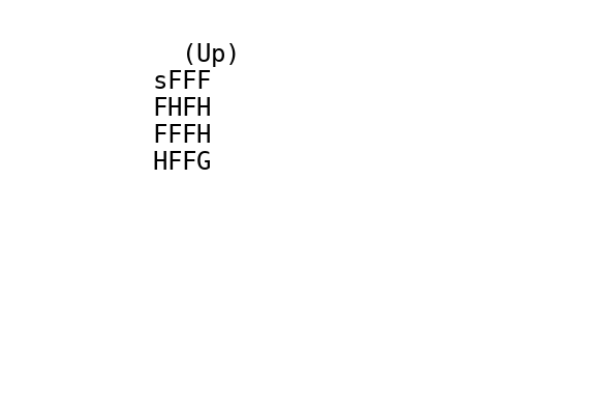
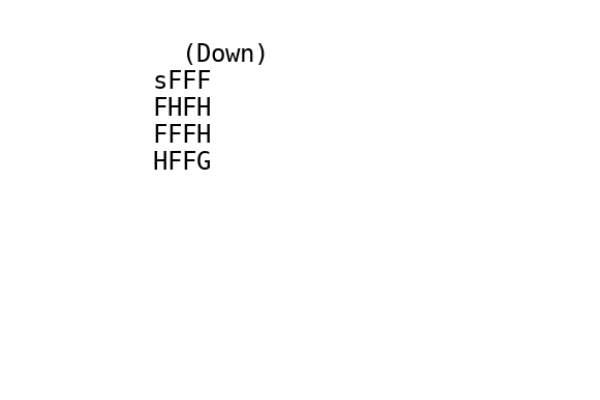
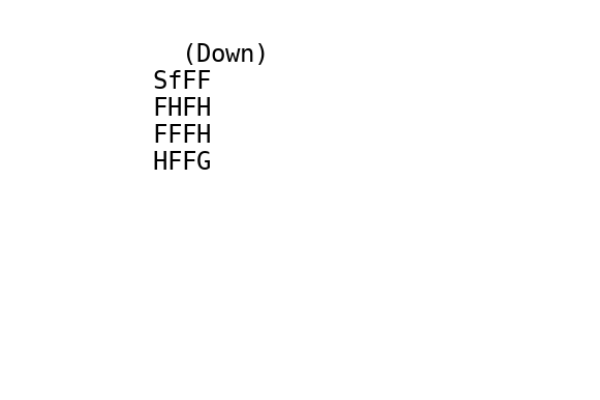
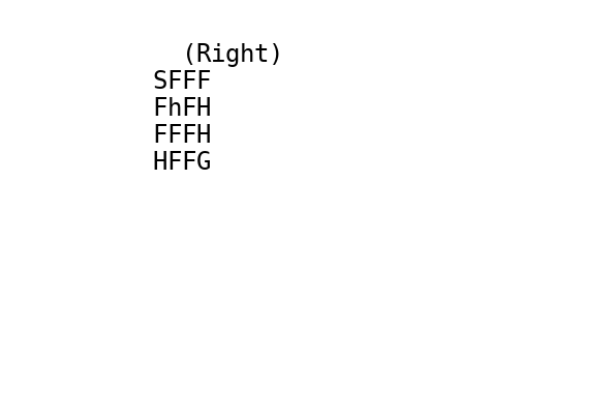
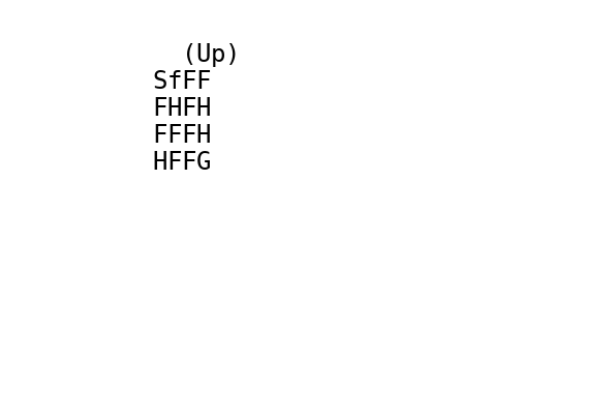
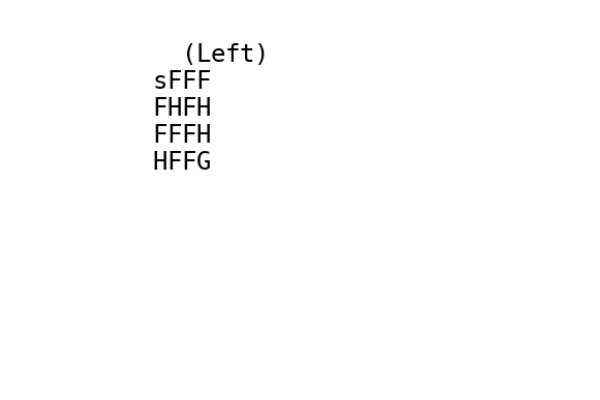
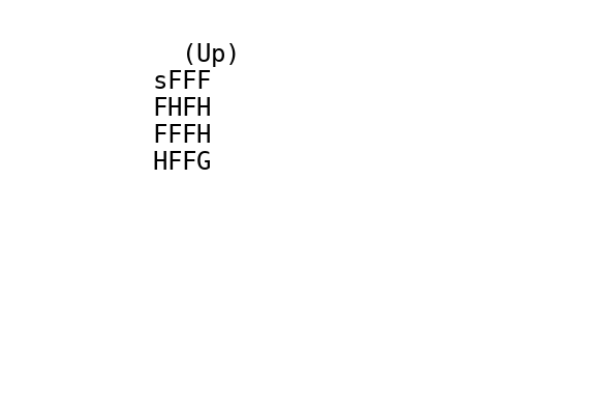
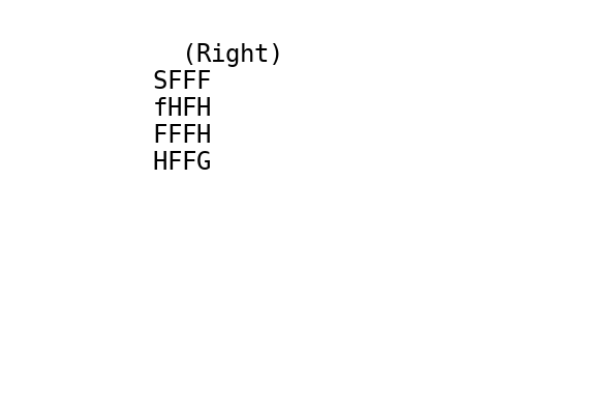
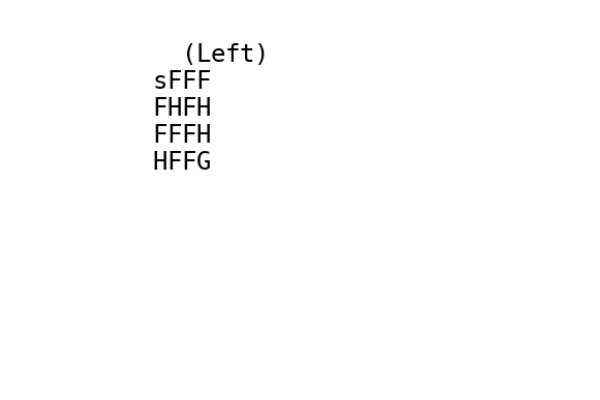
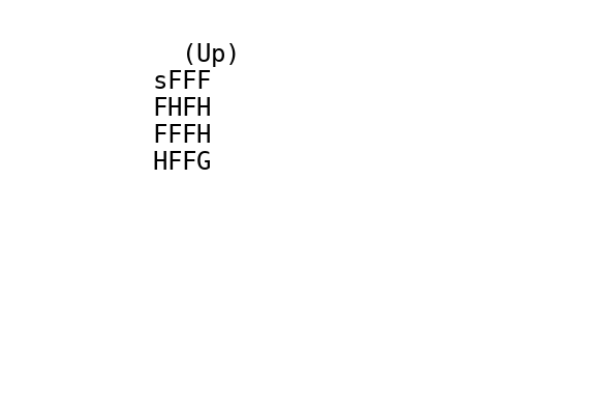
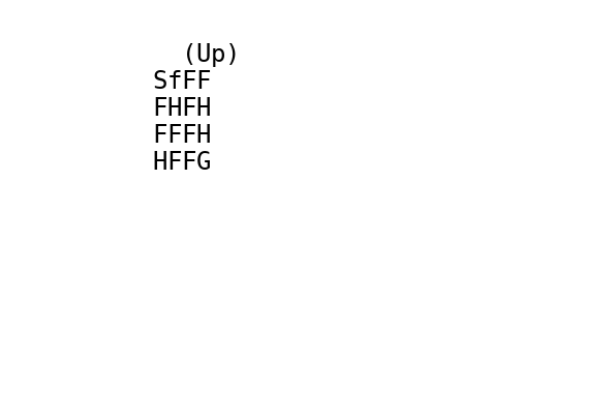
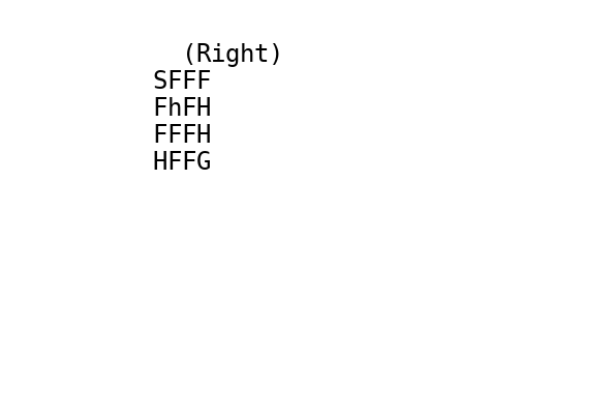
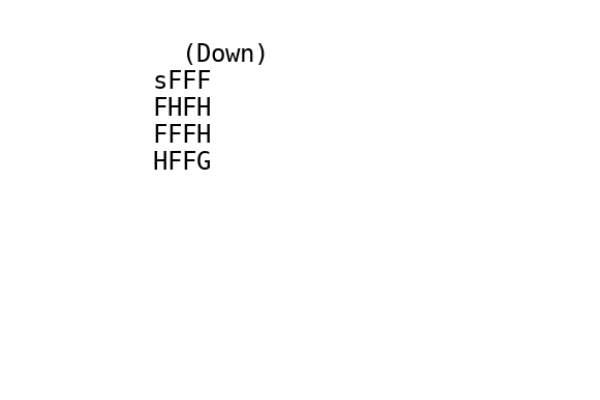
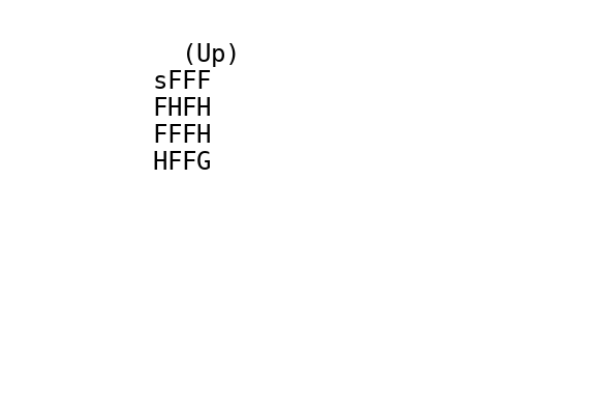
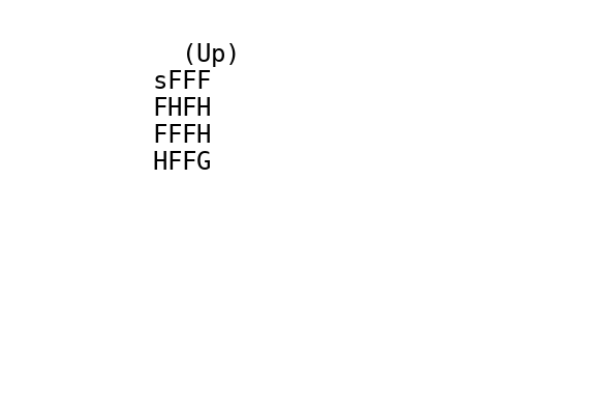
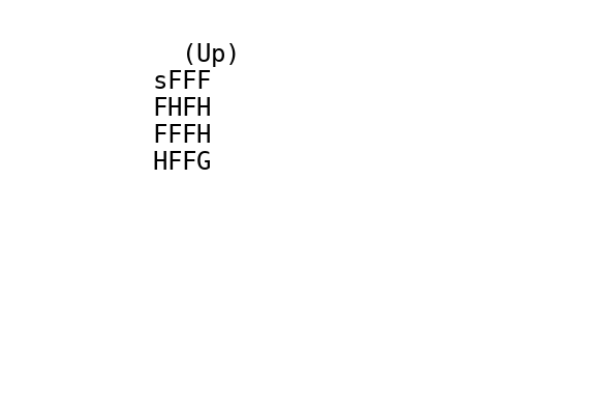
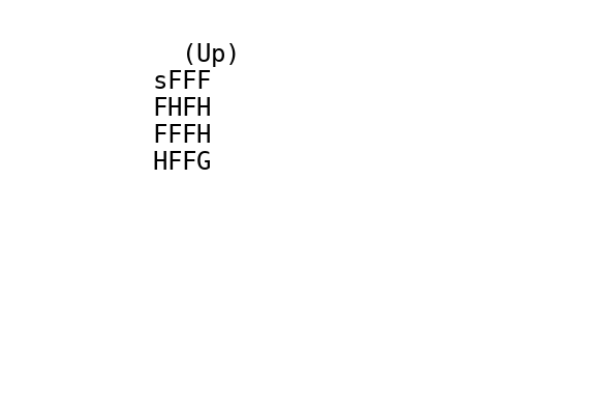
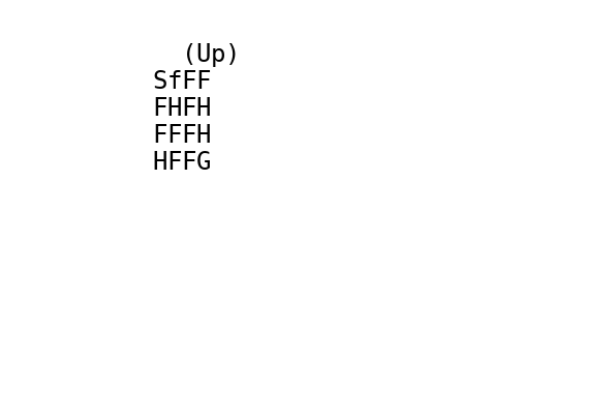
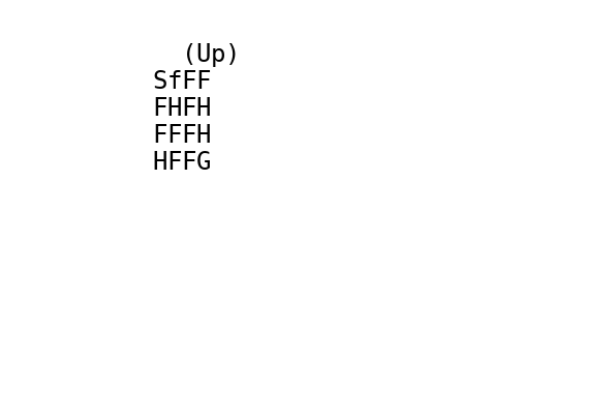
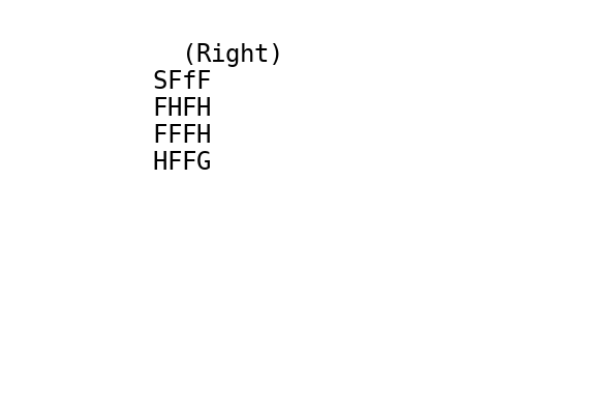
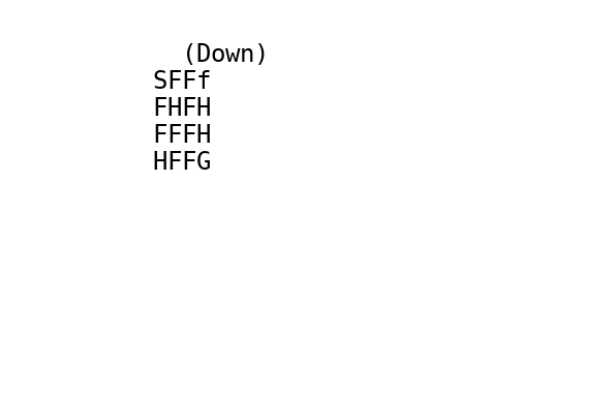
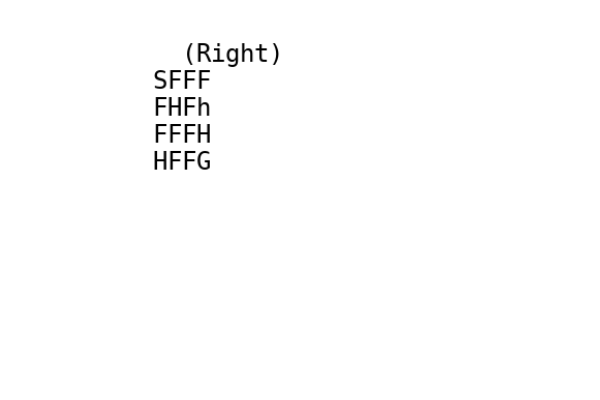
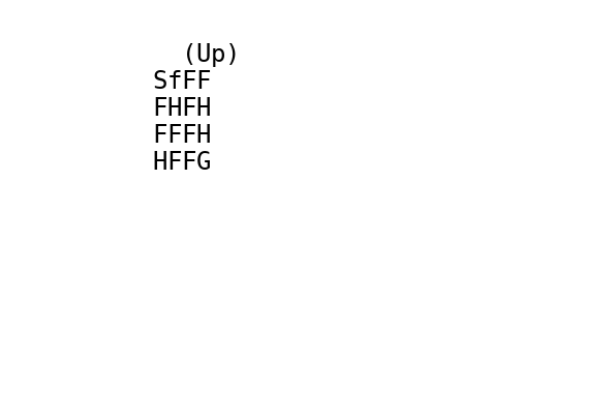
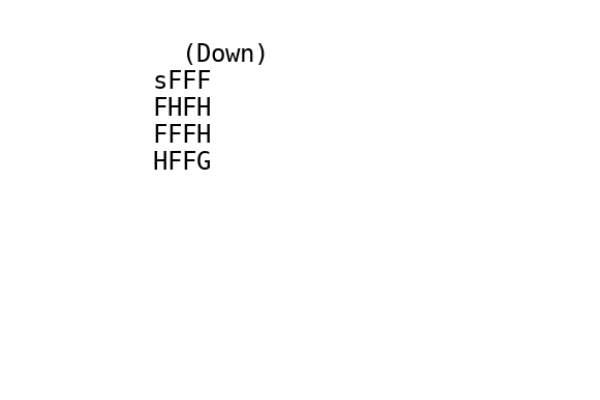
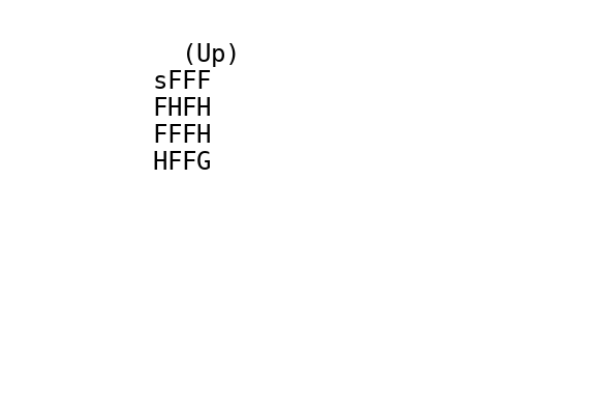
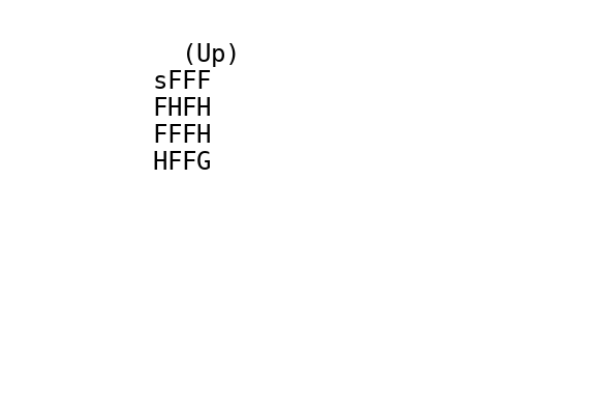
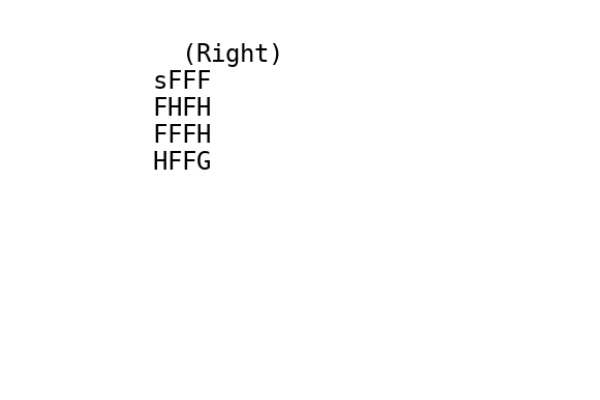
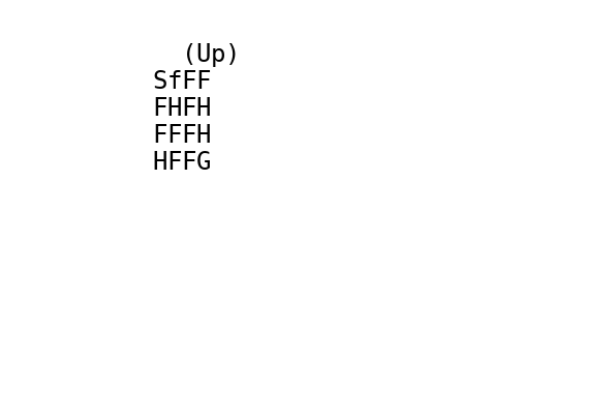
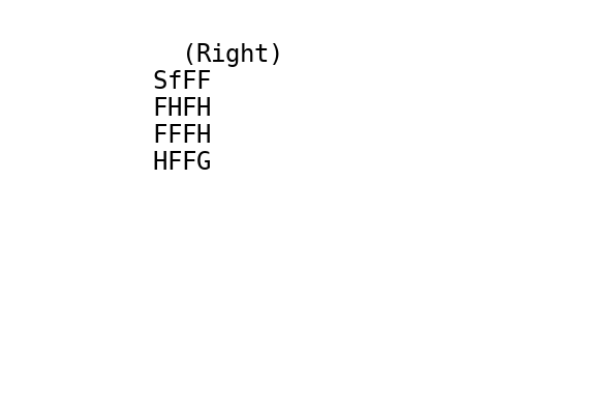
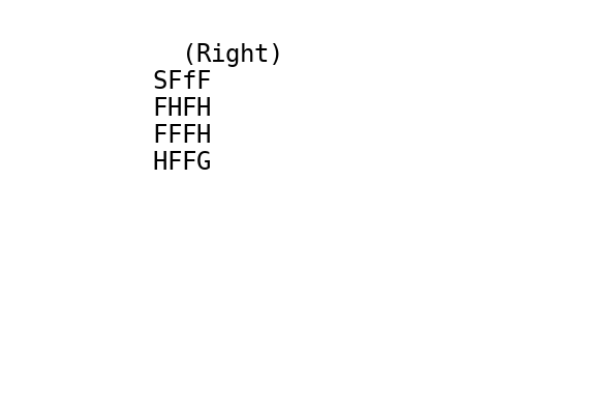
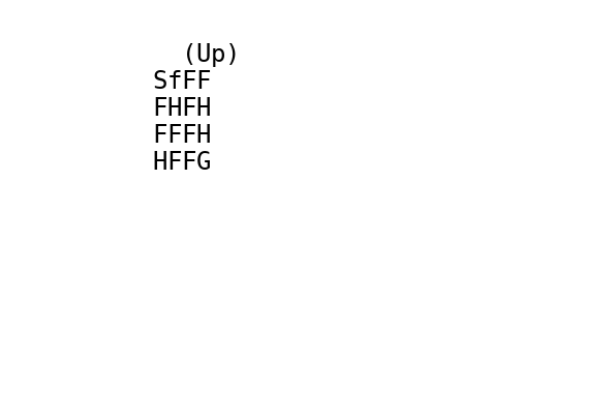
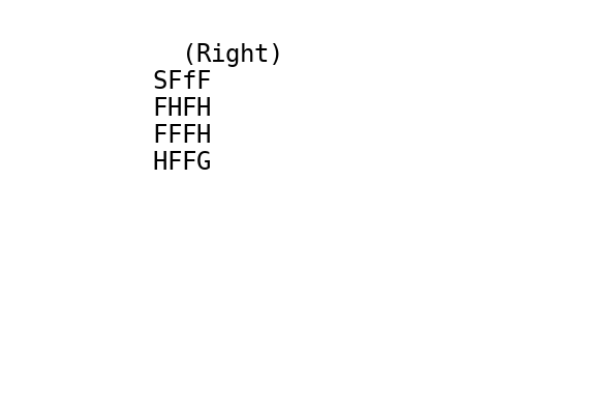
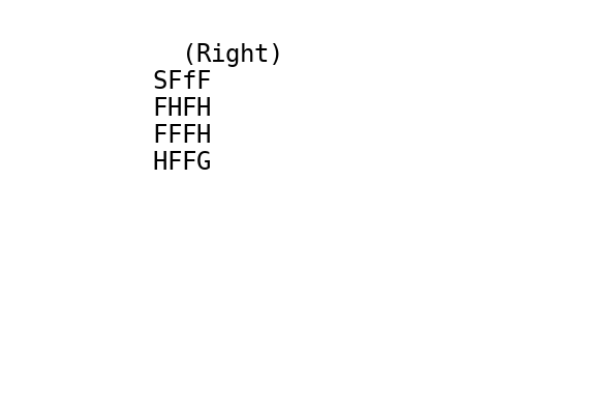
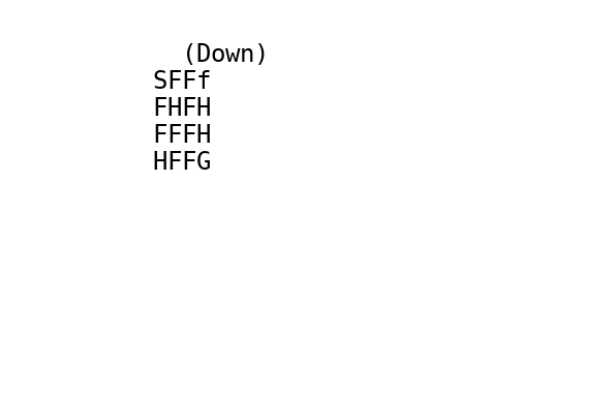
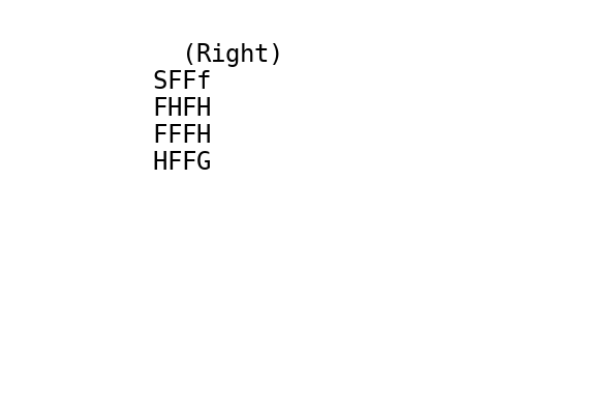
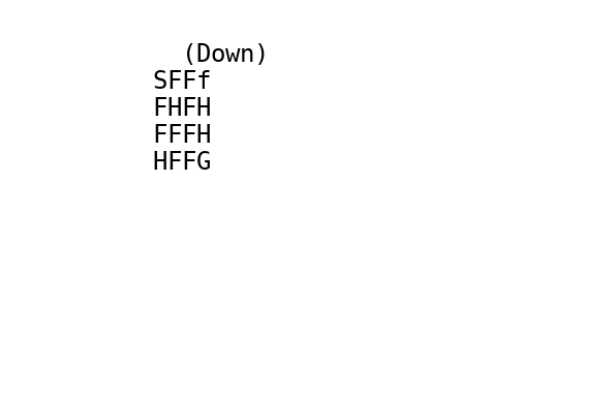
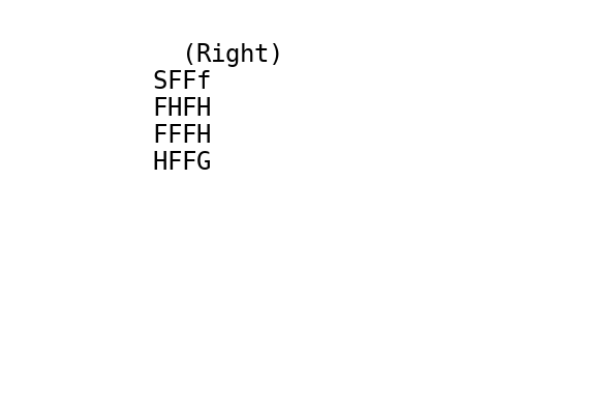
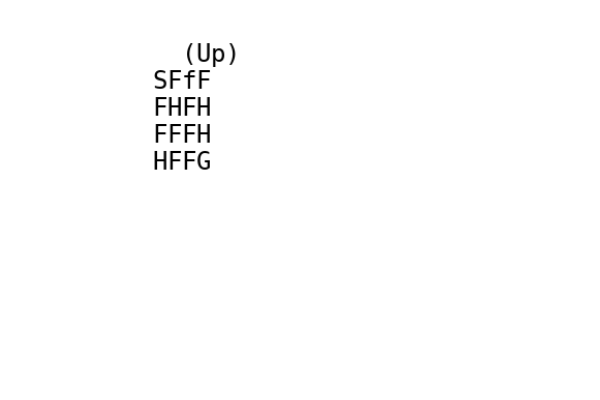
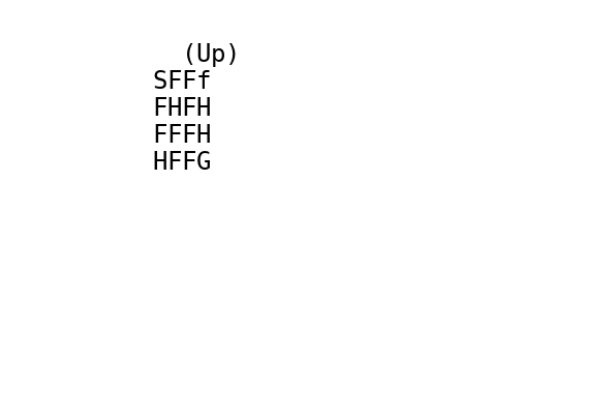
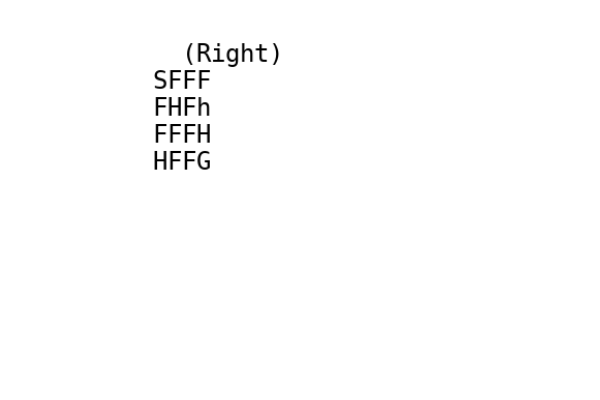
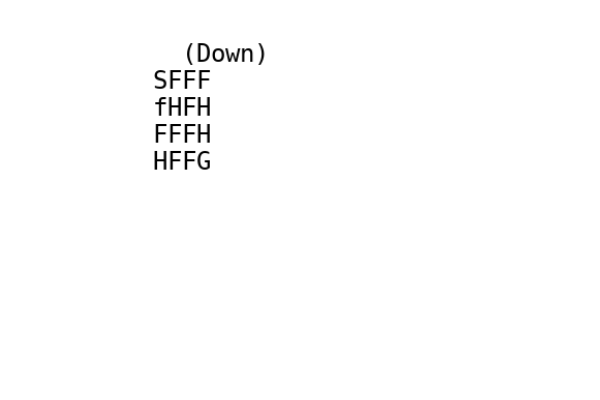
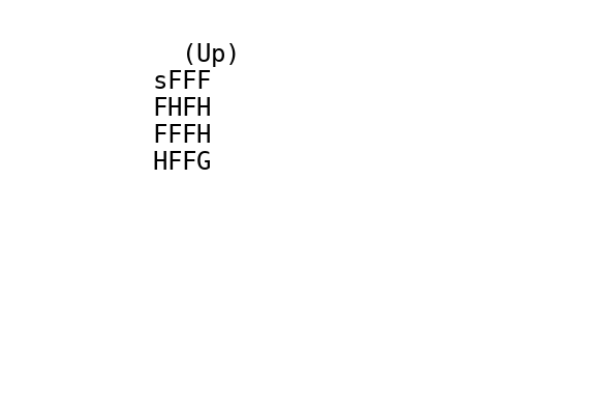
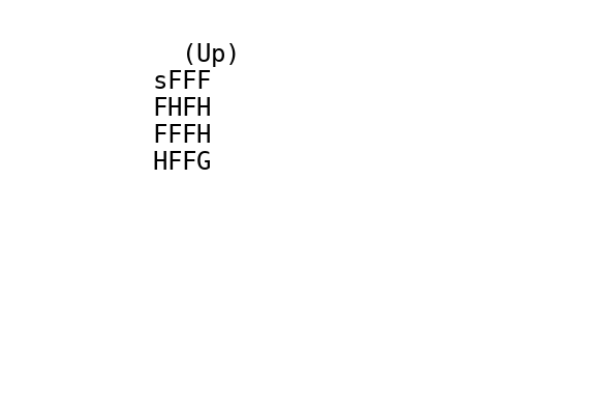
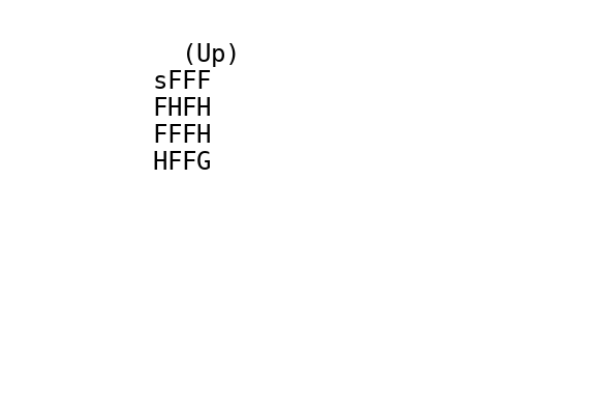
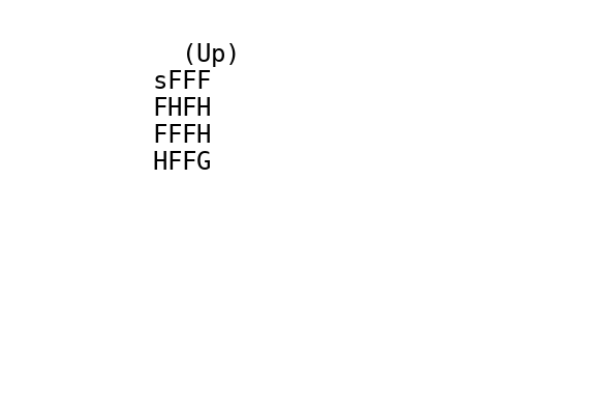
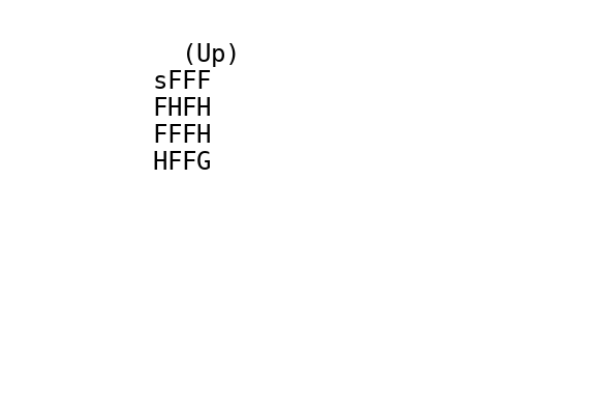
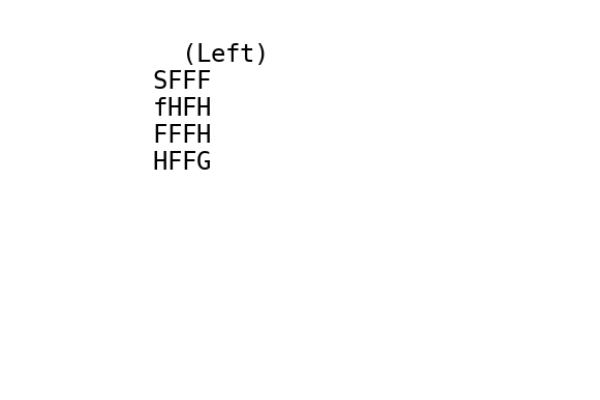
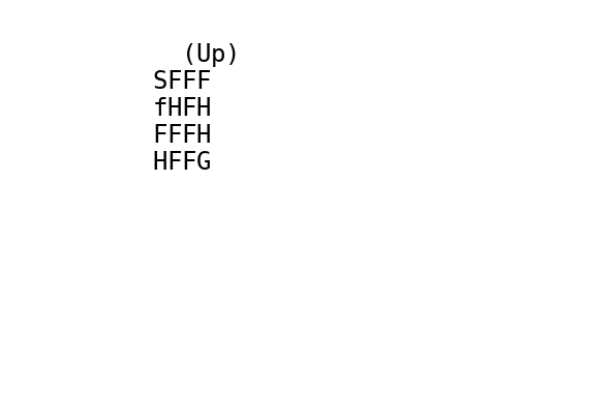
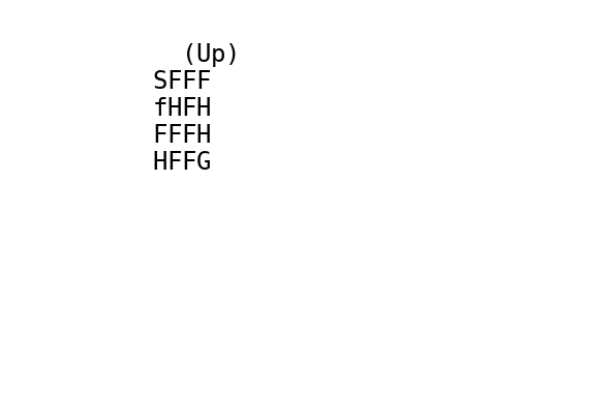
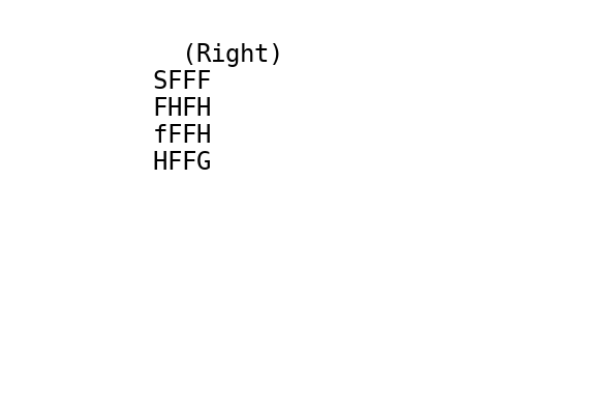
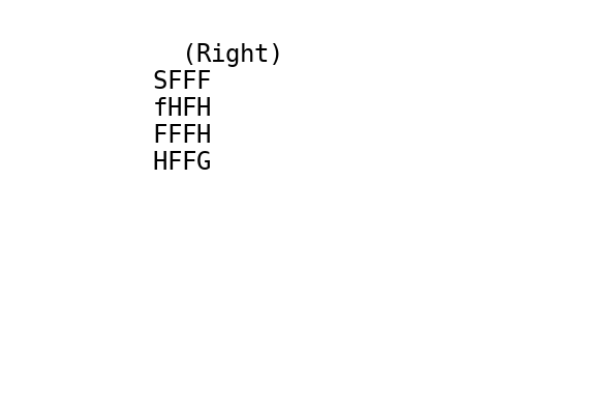


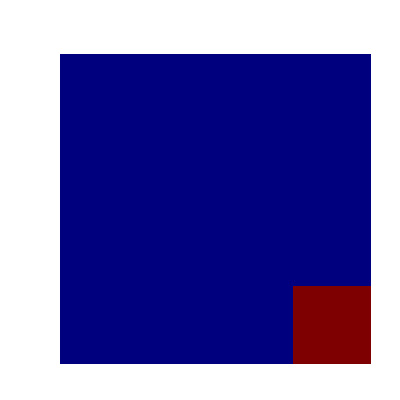
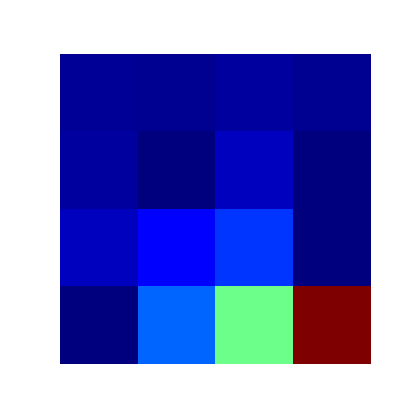
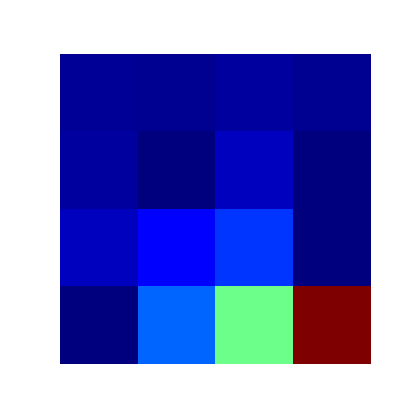
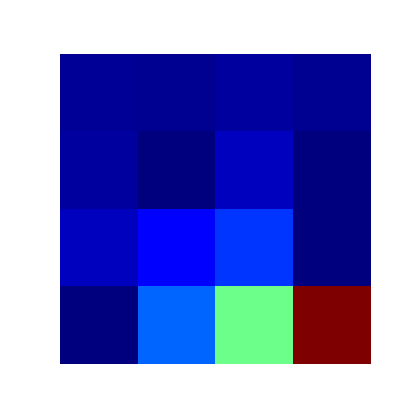
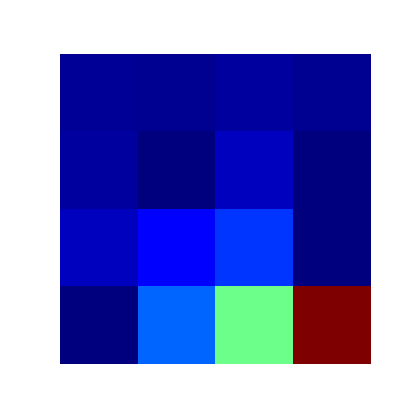
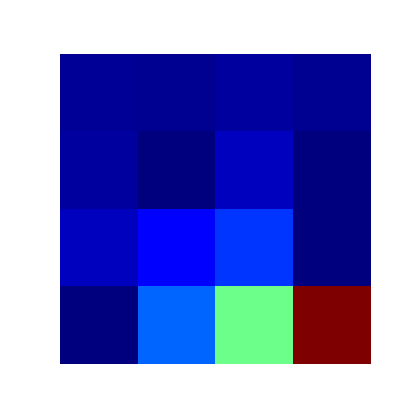
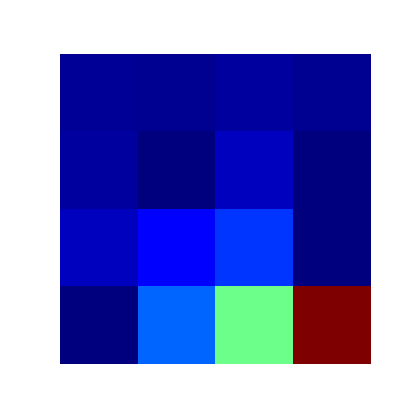
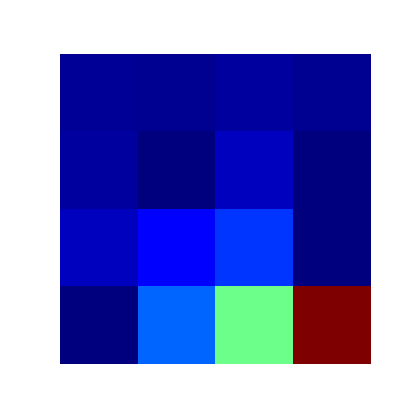
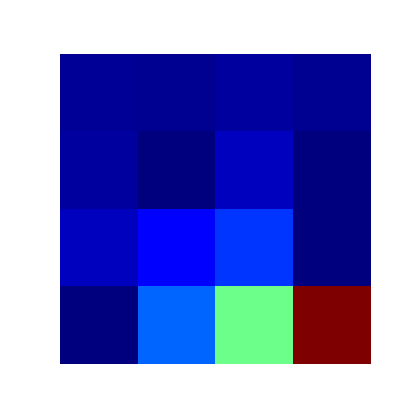
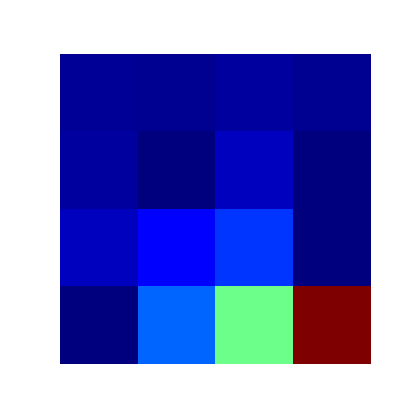
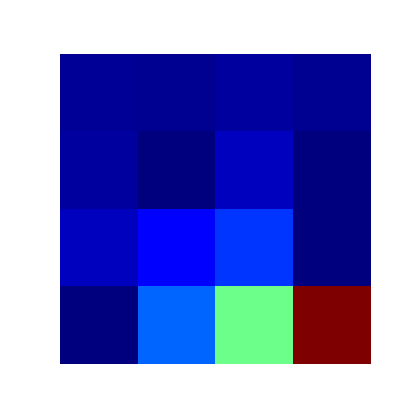
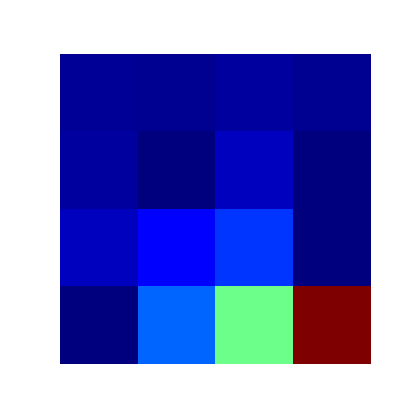


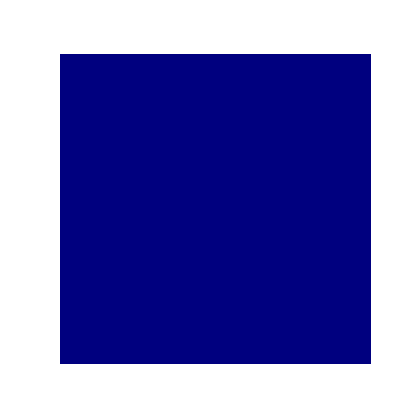
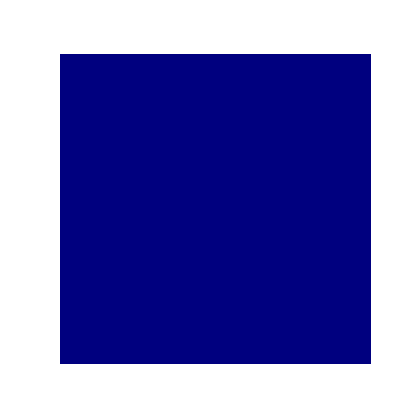
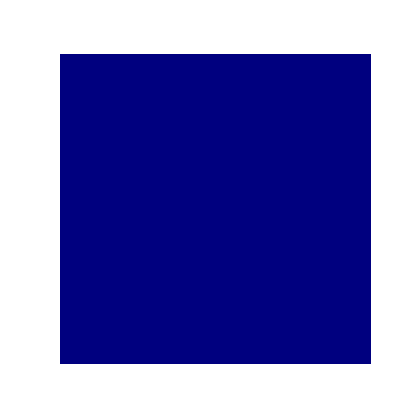
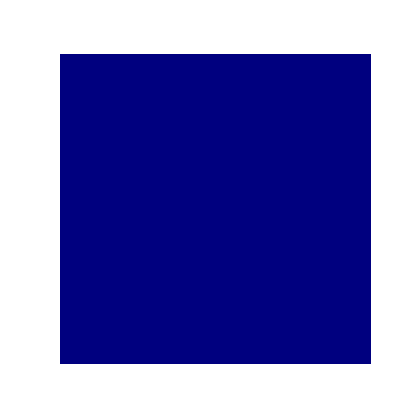
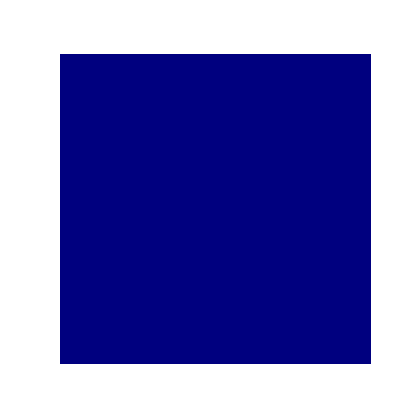
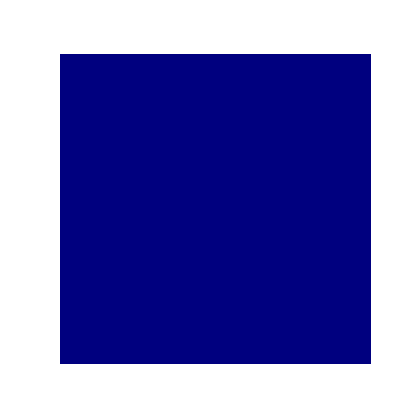
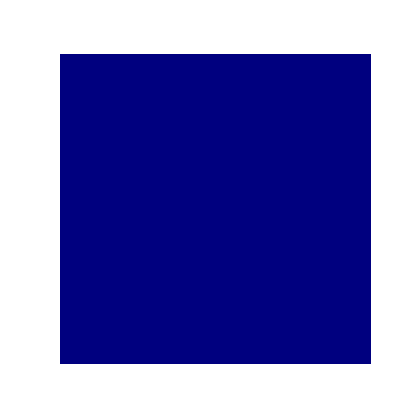
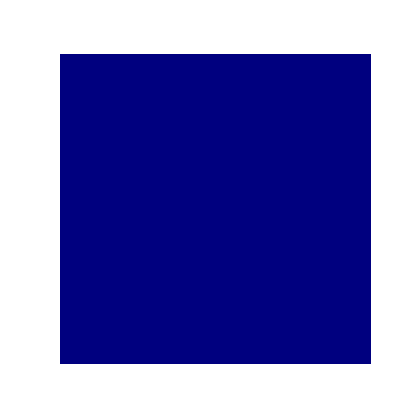
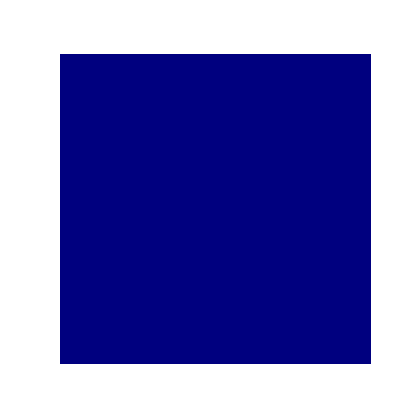
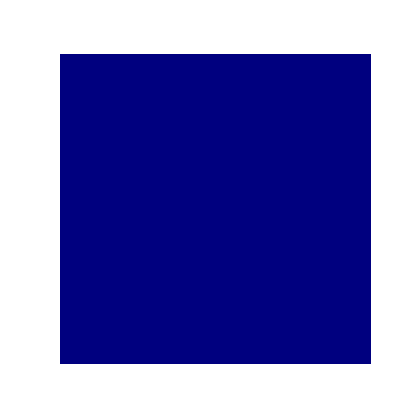
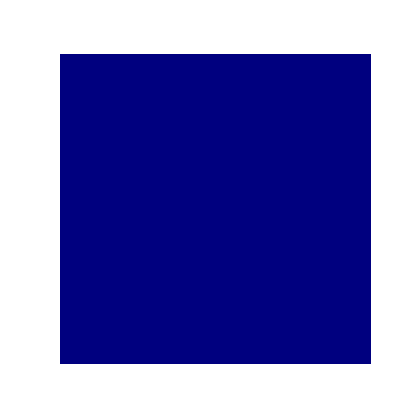
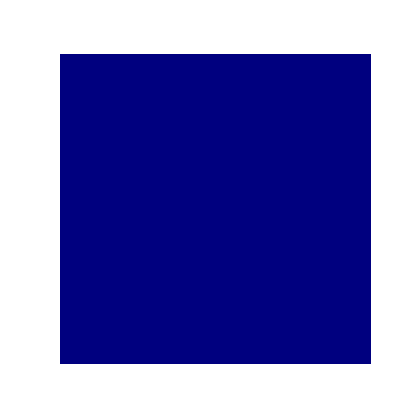

In [49]:
import value_iter_agent as agent
  

def run_episode():
  env = gym.make(ENV)
  observation = env.reset()
  env_text = env.render(mode=RENDER_MODE[ENV]).getvalue()
  frames = [render.text_to_array(env_text)]
  
  ag = agent.ValueIterAgent((4, 4), 4)
  
  action = env.action_space.sample()
  max_actions = []
  values = []
  
  NUM_STEPS = 10000
  for i in range(NUM_STEPS):
    obs, reward, done, info = env.step(action)
    action = ag.act(obs, reward, done)
    if reward or i % 1000 == 0:
      print(i, reward)
      print(ag._value)
      values.append(np.copy(ag._value))
      print(ag._policy)
      max_actions.append(np.copy(np.argmax(ag._policy, axis=-1)))
      print(max_actions[-1])

    env_text = env.render(mode=RENDER_MODE[ENV]).getvalue()
    if i > NUM_STEPS - 200:
      frames.append(render.text_to_array(env_text))
    #print(obs, reward, info)
    if done:
      env.reset()
  env.render(close=True)
  
  print(ag._env_tx[0, 2, 0])
  #if RENDER_MODE[ENV] == RENDER_RGB:
  render.display_frames_as_gif(frames)
  if max_actions:
    render.display_mat_as_gif(values)
    render.display_mat_as_gif(max_actions)
run_episode()

In [50]:
import value_iter_agent as agent

ag = agent.ValueIterAgent((4, 4), 4)
for i in range(10):
  ag.act(3, 10)
  print(ag._value)

(3, 0, 0)
(3, 1, 1)
(2, 0, 2)
(3, 0, 3)
[[  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [ 10.   0.   0.   0.]]
(3, 0, 0)
(3, 1, 1)
(2, 0, 2)
(3, 0, 3)
[[  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [ 14.5   0.    0.    0. ]]
(3, 0, 0)
(3, 1, 1)
(2, 0, 2)
(3, 0, 3)
[[  0.      0.      0.      0.   ]
 [  0.      0.      0.      0.   ]
 [  0.      0.      0.      0.   ]
 [ 16.525   0.      0.      0.   ]]
(3, 0, 0)
(3, 1, 1)
(2, 0, 2)
(3, 0, 3)
[[  0.        0.        0.        0.     ]
 [  0.        0.        0.        0.     ]
 [  0.        0.        0.        0.     ]
 [ 17.43625   0.        0.        0.     ]]
(3, 0, 0)
(3, 1, 1)
(2, 0, 2)
(3, 0, 3)
[[  0.          0.          0.          0.       ]
 [  0.          0.          0.          0.       ]
 [  0.          0.          0.          0.       ]
 [ 17.8463125   0.          0.          0.       ]]
(3, 0, 0)
(3, 1, 1)
(2, 0, 2)
(3, 0, 3)
[[  0.           0.           0.       